# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
os.chdir('C:\\Users\\nandu\\Desktop\\Nandu\\workarea')

In [4]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [7]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [8]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

      clean_categories                 clean_subcategories  \
55660     Math_Science  AppliedSciences Health_LifeScience   
76127     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [12]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [13]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

My classroom consists of twenty-two amazing sixth graders from different cultures and backgrounds. They are a social bunch who enjoy working in partners and working with groups. They are hard-working and eager to head to middle school next year. My job is to get them ready to make this transition and make it as smooth as possible. In order to do this, my students need to come to school every day and feel safe and ready to learn. Because they are getting ready to head to middle school, I give them lots of choice- choice on where to sit and work, the order to complete assignments, choice of projects, etc. Part of the students feeling safe is the ability for them to come into a welcoming, encouraging environment. My room is colorful and the atmosphere is casual. I want them to take ownership of the classroom because we ALL share it together. Because my time with them is limited, I want to ensure they get the most of this time and enjoy it to the best of their abilities.Currently, we have 

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:30<00:00, 1205.77it/s]


In [20]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

In [21]:
print(type(preprocessed_essays))

<class 'list'>


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

In [23]:
# similarly you can preprocess the titles also


from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:04<00:00, 23106.11it/s]


In [24]:
preprocessed_project_title[500]

'special needs students need additional access technology'

## 1.5 Preparing data for  creating models

In [25]:
resource_data.shape

(1541272, 4)

In [26]:
project_data.shape

(109248, 18)

In [27]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [28]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [29]:
project_data.shape

(109248, 20)

In [30]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   
3           GA 2016-04-27 00:53:00          Grades PreK-2   
4           WA 2016-04-27 01:05:25             Grades 3-5   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   
2  I have a class of twenty-four kindergarten stu...   
3  I teach at a low-income (Title 1) school. Ever...   
4  We are an urban, public k-5 elementary school....   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   
2  By having a mobile listening and storage cente...   
3  We need a classroom rug that we can use as a c...   
4  With the new common core standards that have b...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   
2  A mobile listening center will help keep equip...   
3  Benjamin Franklin once said, \"Tell me and I f...   
4  These remarkable gifts will provide students w...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   
3  My students need flexible seating in the class...   
4  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

    clean_categories                 clean_subcategories  \
0       Math_Science  AppliedSciences Health_LifeScience   
1       SpecialNeeds                        SpecialNeeds   
2  Literacy_Language                            Literacy   
3    AppliedLearning                    EarlyDevelopment   
4  Literacy_Language                            Literacy   

                                               essay   price  quantity  
0  I have been fortunate enough to use the Fairy ...  725.05         4  
1  Imagine being 8-9 years old. You're in your th...  213.03         8  
2  Having a class of 24 students comes with diver...  329.00         1  
3  I recently read an article about giving studen...  481.04         9  
4  My students crave c

In [31]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [32]:
# similarly you can preprocess the titles also
df1= project_data[["clean_categories", "clean_subcategories", "school_state","project_grade_category",
                       "teacher_prefix","teacher_number_of_previously_posted_projects",
                  "quantity","project_is_approved","price"]]

In [33]:
df1.shape

(109248, 9)

In [34]:
df1['Preprocessed_Essay'] = preprocessed_essays

In [35]:
df1['Preprocessed_Project_Title'] = preprocessed_project_title

In [36]:
df1.head()

clean_categories                 clean_subcategories school_state  \
0       Math_Science  AppliedSciences Health_LifeScience           CA   
1       SpecialNeeds                        SpecialNeeds           UT   
2  Literacy_Language                            Literacy           CA   
3    AppliedLearning                    EarlyDevelopment           GA   
4  Literacy_Language                            Literacy           WA   

  project_grade_category teacher_prefix  \
0          Grades PreK-2           Mrs.   
1             Grades 3-5            Ms.   
2          Grades PreK-2           Mrs.   
3          Grades PreK-2           Mrs.   
4             Grades 3-5           Mrs.   

   teacher_number_of_previously_posted_projects  quantity  \
0                                            53         4   
1                                             4         8   
2                                            10         1   
3                                             2         9   
4                                             2        14   

   project_is_approved   price  \
0                    1  725.05   
1                    1  213.03   
2                    1  329.00   
3                    1  481.04   
4                    1   17.74   

                                  Preprocessed_Essay  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   
2  class 24 students comes diverse learners stude...   
3  recently read article giving students choice l...   
4  students crave challenge eat obstacles breakfa...   

                Preprocessed_Project_Title  
0      engineering steam primary classroom  
1                      sensory tools focus  
2  mobile learning mobile listening center  
3       flexible seating flexible learning  
4        going deep the art inner thinking

In [37]:
df1.columns

Index(['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix',
       'teacher_number_of_previously_posted_projects', 'quantity',
       'project_is_approved', 'price', 'Preprocessed_Essay',
       'Preprocessed_Project_Title'],
      dtype='object')

In [38]:
df1.shape

(109248, 11)

In [39]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [ ]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

In [ ]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

In [ ]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [ ]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

In [ ]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

In [ ]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [ ]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

In [ ]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [ ]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [ ]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [ ]:
price_standardized

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [ ]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [202]:
# Preparing for Creating Data set which will have 50K records
df2 =df1.iloc[0:50000]
df3 = df2.drop(['project_is_approved'],axis =1)
df3.head()

clean_categories                 clean_subcategories school_state  \
0       Math_Science  AppliedSciences Health_LifeScience           CA   
1       SpecialNeeds                        SpecialNeeds           UT   
2  Literacy_Language                            Literacy           CA   
3    AppliedLearning                    EarlyDevelopment           GA   
4  Literacy_Language                            Literacy           WA   

  project_grade_category teacher_prefix  \
0          Grades PreK-2           Mrs.   
1             Grades 3-5            Ms.   
2          Grades PreK-2           Mrs.   
3          Grades PreK-2           Mrs.   
4             Grades 3-5           Mrs.   

   teacher_number_of_previously_posted_projects  quantity   price  \
0                                            53         4  725.05   
1                                             4         8  213.03   
2                                            10         1  329.00   
3                                             2         9  481.04   
4                                             2        14   17.74   

                                  Preprocessed_Essay  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   
2  class 24 students comes diverse learners stude...   
3  recently read article giving students choice l...   
4  students crave challenge eat obstacles breakfa...   

                Preprocessed_Project_Title  
0      engineering steam primary classroom  
1                      sensory tools focus  
2  mobile learning mobile listening center  
3       flexible seating flexible learning  
4        going deep the art inner thinking

In [203]:
X = df3.values

In [204]:
df3.shape

(50000, 10)

In [205]:
Y = df2['project_is_approved'].values

In [206]:
df2['project_is_approved'].value_counts()

1    41993
0     8007
Name: project_is_approved, dtype: int64

In [207]:
# Performing Stratified sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size =0.3, stratify=Y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3,stratify=y_train)

In [208]:
len(y_train)

24500

In [209]:
df_ytrain = pd.DataFrame(y_train)
df_ycv = pd.DataFrame(y_cv)

In [210]:
#Stratified Sampling
#when the data set is split the original ratio of 0s and 1s in class Say(here 80%,20%),after doing stratified sampling,the train set 
#as well the test set will have the same ratio
print(df_ytrain[0].value_counts())
print('='*50)
print(df_ycv[0].value_counts())

1    20577
0     3923
Name: 0, dtype: int64
1    8818
0    1682
Name: 0, dtype: int64


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [211]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [212]:
#Creating Dataframe to make data manipulations easier
X_train_df = pd.DataFrame(X_train, columns= ['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix',
       'teacher_number_of_previously_posted_projects', 'quantity','price', 
       'Preprocessed_Essay','Preprocessed_Project_Title'])       

In [213]:
X_train_df.head()

clean_categories                      clean_subcategories  \
0        History_Civics Math_Science            FinancialLiteracy Mathematics   
1         Math_Science Health_Sports  EnvironmentalScience NutritionEducation   
2  AppliedLearning Literacy_Language                EarlyDevelopment Literacy   
3          Math_Science SpecialNeeds                 Mathematics SpecialNeeds   
4     Math_Science Literacy_Language       AppliedSciences Literature_Writing   

  school_state project_grade_category teacher_prefix  \
0           AZ          Grades PreK-2            Ms.   
1           WA            Grades 9-12           Mrs.   
2           CO          Grades PreK-2           Mrs.   
3           NE             Grades 3-5            Ms.   
4           CA             Grades 3-5           Mrs.   

  teacher_number_of_previously_posted_projects quantity   price  \
0                                            4       34   58.97   
1                                            5        3  432.08   
2                                            0        1  399.46   
3                                            2       15  397.36   
4                                            0        4     229   

                                  Preprocessed_Essay  \
0  students work face many challenges lives stude...   
1  students completely amazing little people come...   
2  diverse population last year kindergarteners s...   
3  students love coming school everyday many clas...   
4  whenever pull four ipad minis classroom studen...   

            Preprocessed_Project_Title  
0         financial literacy 2nd grade  
1              let grow something good  
2  if child feels safe they take risks  
3                       mad about math  
4              terrific technology d 5

In [214]:
## ONE HOT ENCODING Clean Categories

In [215]:
my_counter = Counter()
for word in X_train_df['clean_categories'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [216]:
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train_df['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(X_train_df['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (24500, 9)


In [217]:
## ONE HOT Encoding Clean Subcategories

In [218]:
my_counter2 = Counter()
for word in X_train_df['clean_subcategories'].values:
    my_counter2.update(word.split())
sub_cat_dict = dict(my_counter2)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [219]:
vectorizer2 = CountVectorizer(vocabulary=list(sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer2.fit(X_train_df['clean_subcategories'].values)
print(vectorizer2.get_feature_names())


subcategories_one_hot = vectorizer2.transform(X_train_df['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",subcategories_one_hot.shape)

['FinancialLiteracy', 'Mathematics', 'EnvironmentalScience', 'NutritionEducation', 'EarlyDevelopment', 'Literacy', 'SpecialNeeds', 'AppliedSciences', 'Literature_Writing', 'Health_LifeScience', 'Other', 'VisualArts', 'Health_Wellness', 'ForeignLanguages', 'PerformingArts', 'CharacterEducation', 'History_Geography', 'Gym_Fitness', 'TeamSports', 'College_CareerPrep', 'Extracurricular', 'Civics_Government', 'SocialSciences', 'ESL', 'Music', 'CommunityService', 'ParentInvolvement', 'Economics', 'Warmth', 'Care_Hunger']
Shape of matrix after one hot encodig  (24500, 30)


In [220]:
## ONE hot Encoding School state

In [221]:
#One hot encoding categorical features
from collections import Counter
my_counter1 = Counter()
for word in X_train_df['school_state'].values:
    my_counter1.update(word.split())

state_dict = dict(my_counter1)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

In [222]:
vectorizer1 = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(X_train_df['school_state'].values)
print(vectorizer1.get_feature_names())


state_one_hot = vectorizer1.transform(X_train_df['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['WY', 'VT', 'ND', 'MT', 'RI', 'SD', 'NH', 'NE', 'AK', 'ME', 'DE', 'HI', 'WV', 'DC', 'NM', 'KS', 'IA', 'ID', 'MN', 'CO', 'AR', 'NV', 'KY', 'MS', 'OR', 'CT', 'AL', 'MD', 'NJ', 'TN', 'WI', 'VA', 'AZ', 'UT', 'MA', 'WA', 'OK', 'OH', 'LA', 'IN', 'MO', 'MI', 'PA', 'SC', 'IL', 'GA', 'NC', 'NY', 'FL', 'TX', 'CA']
Shape of matrix after one hot encodig  (24500, 51)


In [223]:
## One Hot Encoding-Project Grade Category

In [224]:
my_counter3 = Counter()
for word in X_train_df['project_grade_category'].values:
    word = word.replace(" ","")
    word = word.replace('-','to')
    my_counter3.update(word.split(" ",0))

grade_dict = dict(my_counter3)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

In [225]:
vectorizer3 = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer3.fit(X_train_df['project_grade_category'].values)
print(vectorizer3.get_feature_names())


grade_one_hot = vectorizer3.transform(X_train_df['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_one_hot.shape)

['Grades9to12', 'Grades6to8', 'Grades3to5', 'GradesPreKto2']
Shape of matrix after one hot encodig  (24500, 4)


In [226]:
## One Hot Encoding-Teacher Prefix

In [227]:
X_train_df.teacher_prefix.unique()

array(['Ms.', 'Mrs.', 'Teacher', 'Mr.', 'Dr.', nan], dtype=object)

In [228]:
X_train_df['teacher_prefix'] = X_train_df['teacher_prefix'].fillna("No_Value")

In [229]:
my_counter4 = Counter()
for word in X_train_df['teacher_prefix'].values:
    word = word.replace('.','')
    my_counter4.update(word.split())

teacher_dict = dict(my_counter4)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))

In [230]:
vectorizer4 = CountVectorizer(vocabulary=list(sorted_teacher_dict.keys()), lowercase=False, binary=True)
vectorizer4.fit(X_train_df['teacher_prefix'].values)
print(vectorizer4.get_feature_names())


teacher_one_hot = vectorizer4.transform(X_train_df['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_one_hot.shape)

['No_Value', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encodig  (24500, 6)


In [231]:
#Checking for NAN values
#https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/36710126
X_train_df.isnull().sum()

clean_categories                                0
clean_subcategories                             0
school_state                                    0
project_grade_category                          0
teacher_prefix                                  0
teacher_number_of_previously_posted_projects    0
quantity                                        0
price                                           0
Preprocessed_Essay                              0
Preprocessed_Project_Title                      0
dtype: int64

In [232]:
X_train_df['price'].head()

0     58.97
1    432.08
2    399.46
3    397.36
4       229
Name: price, dtype: object

In [233]:
#Normalizing numerical features
from sklearn import preprocessing
normalized_qty_Xtrain = preprocessing.normalize(X_train_df['quantity'].values.reshape(-1, 1))
normalized_price_Xtrain = preprocessing.normalize(X_train_df['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
normalized_teacherspost_Xtrain = preprocessing.normalize(X_train_df['price'].values.reshape(-1, 1))

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [234]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [235]:
#BOW vectorizing Preprocessed Essay
vectorizer_bow = CountVectorizer(min_df=10)
vectorizer_bow.fit(X_train_df['Preprocessed_Essay'].values)
text_bow = vectorizer_bow.transform(X_train_df['Preprocessed_Essay'].values)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (24500, 9052)


In [236]:
#BOW vectorizing Preprocessed Project Title
vectorizer_bowtit = CountVectorizer(min_df=10)
text_bow1 = vectorizer_bowtit.fit_transform(X_train_df['Preprocessed_Project_Title'].values)
print("Shape of matrix after one hot encodig ",text_bow1.shape)

Shape of matrix after one hot encodig  (24500, 1281)


### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [237]:
# Please write all the code with proper documentation

In [238]:
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
Set1 = hstack((categories_one_hot,subcategories_one_hot,state_one_hot,grade_one_hot,teacher_one_hot,normalized_price_Xtrain,normalized_teacherspost_Xtrain,normalized_qty_Xtrain,text_bow,text_bow1))


In [239]:
# making Cross validation set ready
X_cv_df = pd.DataFrame(X_cv, columns= ['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix',
       'teacher_number_of_previously_posted_projects', 'quantity','price', 
       'Preprocessed_Essay','Preprocessed_Project_Title']) 


In [240]:
categories_one_hot_Xcv = vectorizer.transform(X_cv_df['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_Xcv.shape)

Shape of matrix after one hot encodig  (10500, 9)


In [241]:
subcategories_one_hot_Xcv = vectorizer2.transform(X_cv_df['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",subcategories_one_hot_Xcv.shape)

Shape of matrix after one hot encodig  (10500, 30)


In [242]:
state_one_hot_Xcv = vectorizer1.transform(X_cv_df['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_Xcv.shape)

Shape of matrix after one hot encodig  (10500, 51)


In [243]:
grade_one_hot_Xcv = vectorizer3.transform(X_cv_df['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_one_hot_Xcv.shape)

Shape of matrix after one hot encodig  (10500, 4)


In [244]:
X_cv_df['teacher_prefix'] = X_cv_df['teacher_prefix'].fillna("No_Value")

In [245]:
teacher_one_hot_Xcv = vectorizer4.transform(X_cv_df['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_one_hot_Xcv.shape)

Shape of matrix after one hot encodig  (10500, 6)


In [246]:

normalized_qty_Xcv = preprocessing.normalize(X_cv_df['quantity'].values.reshape(-1, 1))
normalized_price_Xcv = preprocessing.normalize(X_cv_df['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
normalized_teacherspost_Xcv = preprocessing.normalize(X_cv_df['price'].values.reshape(-1, 1))

In [247]:
text_bow_Xcv = vectorizer_bow.transform(X_cv_df['Preprocessed_Essay'].values)
print("Shape of matrix after one hot encodig ",text_bow_Xcv.shape)

Shape of matrix after one hot encodig  (10500, 9052)


In [248]:
text_bow1_Xcv = vectorizer_bowtit.transform(X_cv_df['Preprocessed_Project_Title'].values)
print("Shape of matrix after one hot encodig ",text_bow1_Xcv.shape)

Shape of matrix after one hot encodig  (10500, 1281)


In [249]:
Set1_Xcv = hstack((categories_one_hot_Xcv,subcategories_one_hot_Xcv,state_one_hot_Xcv,grade_one_hot_Xcv,teacher_one_hot_Xcv,normalized_price_Xcv,normalized_teacherspost_Xcv,normalized_qty_Xcv,text_bow_Xcv,text_bow1_Xcv))
Set1_Xtrain = Set1 

In [250]:
#Test dataset ready
X_test_df = pd.DataFrame(X_test, columns= ['clean_categories', 'clean_subcategories', 'school_state',
       'project_grade_category', 'teacher_prefix',
       'teacher_number_of_previously_posted_projects', 'quantity','price', 
       'Preprocessed_Essay','Preprocessed_Project_Title']) 

In [251]:
categories_one_hot_Xtest = vectorizer.transform(X_test_df['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot_Xtest.shape)


subcategories_one_hot_Xtest = vectorizer2.transform(X_test_df['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",subcategories_one_hot_Xtest.shape)


state_one_hot_Xtest = vectorizer1.transform(X_test_df['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot_Xtest.shape)


grade_one_hot_Xtest = vectorizer3.transform(X_test_df['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_one_hot_Xtest.shape)




Shape of matrix after one hot encodig  (15000, 9)
Shape of matrix after one hot encodig  (15000, 30)
Shape of matrix after one hot encodig  (15000, 51)
Shape of matrix after one hot encodig  (15000, 4)


In [252]:
X_test_df['teacher_prefix'] = X_test_df['teacher_prefix'].fillna("No_Value")

In [253]:
teacher_one_hot_Xtest = vectorizer4.transform(X_test_df['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_one_hot_Xtest.shape)

Shape of matrix after one hot encodig  (15000, 6)


In [254]:

normalized_qty_Xtest = preprocessing.normalize(X_test_df['quantity'].values.reshape(-1, 1))
normalized_price_Xtest = preprocessing.normalize(X_test_df['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
normalized_teacherspost_Xtest = preprocessing.normalize(X_test_df['price'].values.reshape(-1, 1))

In [255]:
text_bow_Xtest = vectorizer_bow.transform(X_test_df['Preprocessed_Essay'].values)
print("Shape of matrix after one hot encodig ",text_bow_Xtest.shape)


text_bow1_Xtest = vectorizer_bowtit.transform(X_test_df['Preprocessed_Project_Title'].values)
print("Shape of matrix after one hot encodig ",text_bow1_Xtest.shape)

Shape of matrix after one hot encodig  (15000, 9052)
Shape of matrix after one hot encodig  (15000, 1281)


In [256]:
Set1_Xtest = hstack((categories_one_hot_Xtest,subcategories_one_hot_Xtest,state_one_hot_Xtest,grade_one_hot_Xtest,teacher_one_hot_Xtest,normalized_price_Xtest,normalized_teacherspost_Xtest,normalized_qty_Xtest,text_bow_Xtest,text_bow1_Xtest))

In [257]:
#Checking for NAn
X_test_df.isnull().sum()

clean_categories                                0
clean_subcategories                             0
school_state                                    0
project_grade_category                          0
teacher_prefix                                  0
teacher_number_of_previously_posted_projects    0
quantity                                        0
price                                           0
Preprocessed_Essay                              0
Preprocessed_Project_Title                      0
dtype: int64

In [258]:
#Sampled data after preprocess
X_train_new = Set1_Xtrain.toarray()
X_cv_new = Set1_Xcv.toarray()
X_test_new = Set1_Xtest.toarray()


In [259]:
print(X_train_new.shape)
print(X_cv_new.shape)
print(X_test_new.shape)

(24500, 10436)
(10500, 10436)
(15000, 10436)


In [152]:
##Training to get value of K

In [260]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred




  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


 20%|████████████████                                                                | 1/5 [32:18<2:09:14, 1938.63s/it]


 40%|███████████████████████████████▏                                              | 2/5 [1:01:27<1:34:04, 1881.54s/it]


 60%|████████████████████████████████████████████████                                | 3/5 [1:25:02<58:03, 1741.79s/it]


 80%|████████████████████████████████████████████████████████████████                | 4/5 [1:47:12<26:58, 1618.17s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [2:10:23<00:00, 1550.04s/it]




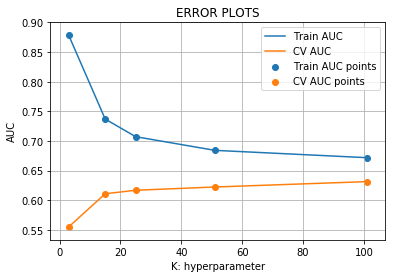

In [261]:
#Training to find best value of K for Model using BOW
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i,algorithm='brute', n_jobs=-1)
    neigh.fit(X_train_new, y_train)

    y_train_pred = batch_predict(neigh, X_train_new)    
    y_cv_pred = batch_predict(neigh, X_cv_new)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

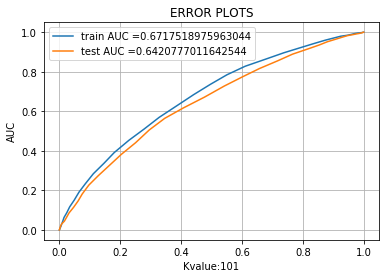

In [262]:
# Selecting the Value of Hyperparamter K as 101 since it provides the min differece in Train Auc And Cross Val AUC.
#Also during majority voting picking odd value of K gives clear winner in selcting class label
from sklearn.metrics import roc_curve, auc


neigh1 = KNeighborsClassifier(n_neighbors=101,algorithm='brute', n_jobs=-1)
neigh1.fit(X_train_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred1 = batch_predict(neigh1, X_train_new)    
y_test_pred1 = batch_predict(neigh1, X_test_new)

train_fpr1, train_tpr1, tr_thresholds1 = roc_curve(y_train, y_train_pred1)
test_fpr1, test_tpr1, te_thresholds1 = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr1, train_tpr1, label="train AUC ="+str(auc(train_fpr1, train_tpr1)))
plt.plot(test_fpr1, test_tpr1, label="test AUC ="+str(auc(test_fpr1, test_tpr1)))
plt.legend()
plt.xlabel("Kvalue:101")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [264]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [271]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds1, train_fpr1, train_tpr1)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t)))

the maximum value of tpr*(1-fpr) 0.3855981544721306 for threshold 0.772
Train confusion matrix
[[ 2412  1511]
 [ 7672 12905]]
Test confusion matrix
[[1423  979]
 [4824 7774]]


In [284]:
cm_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t))
cm_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t))

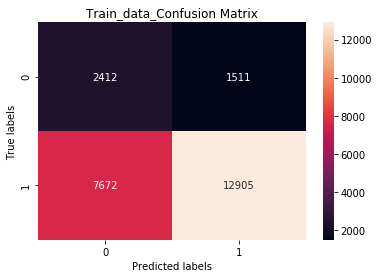

In [344]:
##Plotting using seaborn heatmap for train and Test dat confusion matrix
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm_train, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train_data_Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Project Rejected', 'Project Approved']); ax.yaxis.set_ticklabels(['Project Rejected', 'Project Approved']);


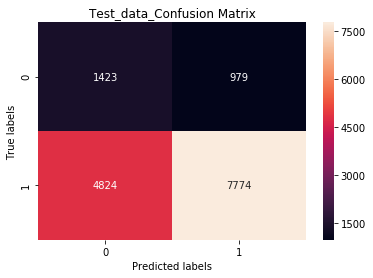

In [343]:
#Seaborn heatmap for test data confusion matrix
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Test_data_Confusion Matrix');

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [ ]:
# Please write all the code with proper documentation

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=10)
vectorizer_tfidf.fit(X_train_df['Preprocessed_Essay'].values)
text_tfidf = vectorizer_tfidf.transform(X_train_df['Preprocessed_Essay'].values)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (24500, 9052)


In [276]:
vectorizer_tfidf1 = TfidfVectorizer(min_df=10)
vectorizer_tfidf1.fit(X_train_df['Preprocessed_Project_Title'].values)
text_tfidf1 = vectorizer_tfidf1.transform(X_train_df['Preprocessed_Project_Title'].values)
print("Shape of matrix after one hot encodig ",text_tfidf1.shape)

Shape of matrix after one hot encodig  (24500, 1281)


In [277]:
#Xcv
text_tfidf_Xcv = vectorizer_tfidf.transform(X_cv_df['Preprocessed_Essay'].values)
print("Shape of matrix after one hot encodig ",text_tfidf_Xcv.shape)

text_tfidf1_Xcv = vectorizer_tfidf1.transform(X_cv_df['Preprocessed_Project_Title'].values)
print("Shape of matrix after one hot encodig ",text_tfidf1_Xcv .shape)

Shape of matrix after one hot encodig  (10500, 9052)
Shape of matrix after one hot encodig  (10500, 1281)


In [278]:
#XTest
text_tfidf_Xtest = vectorizer_tfidf.transform(X_test_df['Preprocessed_Essay'].values)
print("Shape of matrix after one hot encodig ",text_tfidf_Xtest.shape)

text_tfidf1_Xtest = vectorizer_tfidf1.transform(X_test_df['Preprocessed_Project_Title'].values)
print("Shape of matrix after one hot encodig ",text_tfidf1_Xtest.shape)

Shape of matrix after one hot encodig  (15000, 9052)
Shape of matrix after one hot encodig  (15000, 1281)


In [279]:
Set1_tfidf_Xtrain = hstack((categories_one_hot,subcategories_one_hot,state_one_hot,grade_one_hot,teacher_one_hot,normalized_price_Xtrain,normalized_teacherspost_Xtrain,normalized_qty_Xtrain,text_tfidf,text_tfidf1))
Set1_tfidf_Xcv = hstack((categories_one_hot_Xcv,subcategories_one_hot_Xcv,state_one_hot_Xcv,grade_one_hot_Xcv,teacher_one_hot_Xcv,normalized_price_Xcv,normalized_teacherspost_Xcv,normalized_qty_Xcv,text_tfidf_Xcv,text_tfidf1_Xcv))
Set1_tfidf_Xtest = hstack((categories_one_hot_Xtest,subcategories_one_hot_Xtest,state_one_hot_Xtest,grade_one_hot_Xtest,teacher_one_hot_Xtest,normalized_price_Xtest,normalized_teacherspost_Xtest,normalized_qty_Xtest,text_tfidf_Xtest,text_tfidf1_Xtest))

In [280]:
X_train_tfidf_new = Set1_tfidf_Xtrain.toarray()
X_cv_tfidf_new = Set1_tfidf_Xcv.toarray()
X_test_tfidf_new = Set1_tfidf_Xtest.toarray()

In [185]:
#Training to find best value of K for TFIDF model




  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


 20%|████████████████                                                                | 1/5 [25:08<1:40:34, 1508.70s/it]


 40%|████████████████████████████████                                                | 2/5 [46:37<1:12:08, 1442.76s/it]


 60%|████████████████████████████████████████████████                                | 3/5 [1:08:52<47:00, 1410.38s/it]


 80%|████████████████████████████████████████████████████████████████                | 4/5 [1:30:10<22:50, 1370.76s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [1:51:39<00:00, 1346.12s/it]




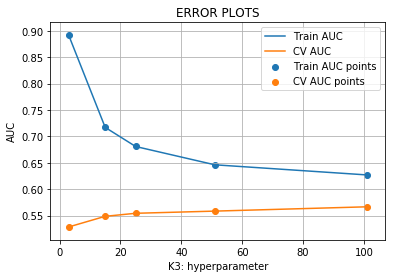

In [281]:
train3_auc = []
cv3_auc = []
K3 = [3, 15, 25, 51, 101]
for i in tqdm(K3):
    neigh3 = KNeighborsClassifier(n_neighbors=i,algorithm='brute', n_jobs=-1)
    neigh3.fit(X_train_tfidf_new, y_train)

    y_train_pred = batch_predict(neigh3, X_train_tfidf_new)    
    y_cv_pred = batch_predict(neigh3, X_cv_tfidf_new)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train3_auc.append(roc_auc_score(y_train,y_train_pred))
    cv3_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K3, train3_auc, label='Train AUC')
plt.plot(K3, cv3_auc, label='CV AUC')

plt.scatter(K3, train3_auc, label='Train AUC points')
plt.scatter(K3, cv3_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K3: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

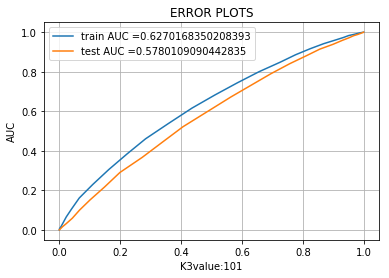

In [282]:
# Selecting the Value of Hyperparamter K3 as 101 since it provides the min differece in Train Auc And Cross Val AUC.
#Also during majority voting picking odd value of K gives clear winner in selcting class label
from sklearn.metrics import roc_curve, auc


neigh4 = KNeighborsClassifier(n_neighbors=101,algorithm='brute', n_jobs=-1)
neigh4.fit(X_train_tfidf_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred4 = batch_predict(neigh4, X_train_tfidf_new)    
y_test_pred4 = batch_predict(neigh4, X_test_tfidf_new)

train_fpr4, train_tpr4, tr_thresholds4 = roc_curve(y_train, y_train_pred4)
test_fpr4, test_tpr4, te_thresholds4 = roc_curve(y_test, y_test_pred4)

plt.plot(train_fpr4, train_tpr4, label="train AUC ="+str(auc(train_fpr4, train_tpr4)))
plt.plot(test_fpr4, test_tpr4, label="test AUC ="+str(auc(test_fpr4, test_tpr4)))
plt.legend()
plt.xlabel("K3value:101")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [283]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t1 = find_best_threshold(tr_thresholds4, train_fpr4, train_tpr4)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred4, best_t1)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred4, best_t1)))

the maximum value of tpr*(1-fpr) 0.34758902080781334 for threshold 0.842
Train confusion matrix
[[ 2213  1710]
 [ 7898 12679]]
Test confusion matrix
[[1224 1178]
 [5010 7588]]


In [287]:
cm_tfidf_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred4, best_t1))
cm_tfidf_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred4, best_t1))

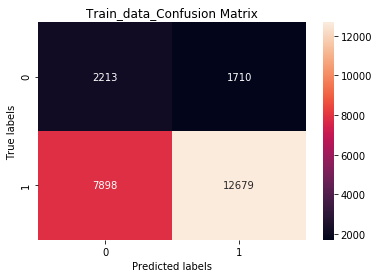

In [288]:
#Sea born heat map train confusion matrix
ax= plt.subplot()
sns.heatmap(cm_tfidf_train, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train_data_Confusion Matrix'); 
#

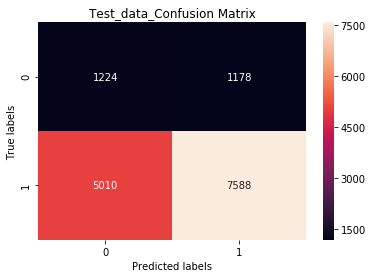

In [342]:
#Sea born heat map test confusion matrix
ax= plt.subplot()
sns.heatmap(cm_tfidf_test, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Test_data_Confusion Matrix'); 
#

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
# Please write all the code with proper documentation

In [290]:
i=0
list_of_sentance_train=[]
for sentance in (X_train_df['Preprocessed_Project_Title'].values):
    list_of_sentance_train.append(sentance.split())

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  2198
sample words  ['financial', 'literacy', '2nd', 'grade', 'let', 'grow', 'something', 'good', 'if', 'child', 'safe', 'they', 'take', 'mad', 'about', 'math', 'terrific', 'technology', 'd', '5', 'flexible', 'seating', 'extra', 'fun', 'learning', 'pre', 'k', 'living', 'science', 'creating', 'wonderful', 'stories', 'classroom', 'environment', 'creativity', 'wiggle', 'wobble', 'now', 'concentrate', 'daily', 'differentiated', 'instruction', 'means', 'thinking', '2016', '2017', 'reading', 'great', 'google', 'active']


In [291]:
from tqdm import tqdm
import numpy as np

sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
sent_vectors_train = np.array(sent_vectors_train)
print(sent_vectors_train.shape)
print(sent_vectors_train[0])




  0%|                                                                                        | 0/24500 [00:00<?, ?it/s]


  0%|                                                                                | 1/24500 [00:00<57:20,  7.12it/s]


  3%|██                                                                            | 666/24500 [00:00<39:03, 10.17it/s]


  4%|███▍                                                                         | 1084/24500 [00:00<26:54, 14.51it/s]


  7%|█████▍                                                                       | 1745/24500 [00:00<18:19, 20.70it/s]


 10%|███████▍                                                                     | 2362/24500 [00:00<12:29, 29.52it/s]


 12%|█████████▏                                                                   | 2919/24500 [00:00<08:32, 42.07it/s]


 14%|██████████▌                                                                  | 3357/24500 [00:00<05:53, 59.74it/s]


 16%|████████████▍   

(24500, 50)
[ 0.07291705  0.38856527 -0.5150852   0.3512383  -0.14275816 -0.14898676
 -0.12409286 -0.58850976 -0.34082318 -0.18492777 -0.03172963  0.2925306
 -0.07250076 -0.01237471 -0.4952029  -0.39667624  0.54612001  0.17331808
 -0.20691124 -0.47874217  0.12461267 -0.01477686  0.25452888  0.46026882
 -0.03232901 -0.45941025  0.70808939  0.10126302  0.14996965 -0.13896013
 -0.50612598  0.2364805  -0.45257414 -0.2555261  -0.09869759  0.59407496
 -0.16603715  0.16259591 -0.18502868 -0.36728679 -0.3579613  -0.31693857
  0.15817988  0.29209913  0.03368362  0.40012747 -0.37606266 -0.44307293
  0.10383068  0.20151646]


In [292]:
#Xcv
i=0
list_of_sentance_cv=[]
for sentance in (X_cv_df['Preprocessed_Project_Title'].values):
    list_of_sentance_cv.append(sentance.split())

sent_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
sent_vectors_cv = np.array(sent_vectors_cv)
print(sent_vectors_cv.shape)
print(sent_vectors_cv[0])




  0%|                                                                                        | 0/10500 [00:00<?, ?it/s]


 10%|███████                                                                   | 1002/10500 [00:00<00:00, 10013.30it/s]


 19%|██████████████▍                                                            | 2023/10500 [00:00<00:00, 9906.24it/s]


 30%|██████████████████████▍                                                   | 3191/10500 [00:00<00:00, 10371.74it/s]


 37%|███████████████████████████▊                                               | 3891/10500 [00:00<00:00, 8608.16it/s]


 43%|████████████████████████████████▌                                          | 4566/10500 [00:00<00:00, 6967.41it/s]


 51%|██████████████████████████████████████                                     | 5335/10500 [00:00<00:00, 7143.85it/s]


 57%|██████████████████████████████████████████▊                                | 5995/10500 [00:00<00:00, 6747.35it/s]


 63%|████████████████

(10500, 50)
[ 0.15159845  0.25281205 -0.42035589  0.29673826 -0.18894661 -0.0835521
 -0.12742288 -0.58303464 -0.17547585 -0.10219762 -0.01277991  0.31108303
 -0.01681243  0.01316655 -0.43682813 -0.31424369  0.44227571  0.11899393
 -0.01151724 -0.41540212  0.02392045  0.00721264  0.20074628  0.44915762
 -0.04000302 -0.47463258  0.53786835  0.13553908  0.22597945  0.00624912
 -0.3241316   0.25460433 -0.2737604  -0.23905299 -0.04891459  0.51476125
 -0.06032137  0.22849066 -0.19808661 -0.39097734 -0.25409559 -0.26065837
  0.11773588  0.24779416 -0.07491383  0.27718218 -0.31327187 -0.33612006
  0.03023235  0.20593448]


In [293]:
i=0
list_of_sentance_test=[]
for sentance in (X_test_df['Preprocessed_Project_Title'].values):
    list_of_sentance_test.append(sentance.split())

sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)
print(sent_vectors_test.shape)
print(sent_vectors_test[0])




  0%|                                                                                        | 0/15000 [00:00<?, ?it/s]


  3%|██▌                                                                         | 511/15000 [00:00<00:02, 5072.89it/s]


  6%|████▉                                                                       | 975/15000 [00:00<00:02, 4923.32it/s]


  9%|██████▋                                                                    | 1336/15000 [00:00<00:03, 4426.90it/s]


 11%|████████▍                                                                  | 1693/15000 [00:00<00:03, 4119.08it/s]


 15%|██████████▉                                                                | 2183/15000 [00:00<00:02, 4317.58it/s]


 18%|█████████████▌                                                             | 2724/15000 [00:00<00:02, 4587.45it/s]


 21%|███████████████▋                                                           | 3136/15000 [00:00<00:02, 4261.63it/s]


 24%|████████████████

(15000, 50)
[ 0.1516623   0.34454206 -0.49996615  0.36996236 -0.2159013  -0.13638763
 -0.1660645  -0.7598694  -0.25084558 -0.14876872 -0.02898127  0.40603175
 -0.00605606  0.00572137 -0.5665761  -0.38906195  0.5518045   0.17433315
 -0.03521212 -0.54652633  0.09049561  0.01983985  0.2536048   0.58853543
 -0.03909689 -0.59334805  0.70471905  0.16281635  0.28772889 -0.02039427
 -0.408048    0.33060217 -0.37863074 -0.28907799 -0.08442414  0.65579001
 -0.07032193  0.27720419 -0.26071827 -0.48821783 -0.33574199 -0.30003042
  0.11554231  0.2982962  -0.07206058  0.36244134 -0.39148928 -0.42033779
  0.07183214  0.26270388]


In [294]:
#Avgw2vec on Preprocessed essays
i=0
list_of_sentance_train_essay=[]
for sentance in (X_train_df['Preprocessed_Essay'].values):
    list_of_sentance_train_essay.append(sentance.split())

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

w2v_model1=Word2Vec(list_of_sentance_train_essay,min_count=5,size=50, workers=4)

w2v_words1 = list(w2v_model1.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words1))
print("sample words ", w2v_words1[0:50])

number of words that occured minimum 5 times  12873
sample words  ['students', 'work', 'face', 'many', 'challenges', 'lives', 'come', 'low', 'socio', 'economic', 'background', 'not', 'speak', 'english', 'native', 'language', 'school', 'hard', 'every', 'day', 'build', 'better', 'future', 'strong', 'desire', 'learn', 'successful', 'lack', 'necessary', 'tools', 'basic', 'needed', 'nothing', 'impossible', '2nd', 'grade', 'required', 'gain', 'greater', 'understanding', 'foundational', 'skill', 'adding', 'money', 'teach', 'good', 'choices', 'using', 'include', 'lessons']


In [295]:
from tqdm import tqdm
import numpy as np

sent_vectors_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train_essay): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words1:
            vec = w2v_model1.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train_essay.append(sent_vec)
sent_vectors_train_essay = np.array(sent_vectors_train_essay)
print(sent_vectors_train_essay.shape)
print(sent_vectors_train_essay[0])




  0%|                                                                                        | 0/24500 [00:00<?, ?it/s]


  0%|                                                                              | 19/24500 [00:00<02:12, 184.96it/s]


  0%|                                                                              | 39/24500 [00:00<02:09, 188.30it/s]


  0%|▏                                                                             | 56/24500 [00:00<02:16, 179.68it/s]


  0%|▏                                                                             | 70/24500 [00:00<02:28, 164.59it/s]


  0%|▎                                                                             | 90/24500 [00:00<02:21, 172.15it/s]


  0%|▎                                                                            | 108/24500 [00:00<02:22, 170.79it/s]


  1%|▍                                                                            | 125/24500 [00:00<02:26, 166.09it/s]


  1%|▍               

  4%|██▉                                                                           | 922/24500 [00:08<04:24, 89.28it/s]


  4%|██▉                                                                           | 935/24500 [00:08<03:59, 98.41it/s]


  4%|██▉                                                                          | 949/24500 [00:08<03:41, 106.43it/s]


  4%|███                                                                           | 961/24500 [00:08<03:58, 98.86it/s]


  4%|███                                                                          | 973/24500 [00:08<03:49, 102.32it/s]


  4%|███                                                                          | 984/24500 [00:08<03:49, 102.55it/s]


  4%|███▏                                                                         | 995/24500 [00:08<03:52, 101.21it/s]


  4%|███▏                                                                         | 1006/24500 [00:09<04:05, 95.75it/s]


  4%|███▏               

  7%|█████▎                                                                       | 1701/24500 [00:16<04:16, 88.74it/s]


  7%|█████▍                                                                       | 1711/24500 [00:16<04:12, 90.29it/s]


  7%|█████▍                                                                       | 1721/24500 [00:16<04:14, 89.34it/s]


  7%|█████▍                                                                       | 1731/24500 [00:16<04:12, 90.12it/s]


  7%|█████▍                                                                       | 1742/24500 [00:16<04:00, 94.61it/s]


  7%|█████▌                                                                       | 1752/24500 [00:16<04:04, 93.00it/s]


  7%|█████▌                                                                       | 1765/24500 [00:16<03:48, 99.34it/s]


  7%|█████▌                                                                       | 1776/24500 [00:16<03:57, 95.75it/s]


  7%|█████▌             

 10%|███████▍                                                                     | 2371/24500 [00:24<03:59, 92.48it/s]


 10%|███████▍                                                                     | 2381/24500 [00:24<04:13, 87.27it/s]


 10%|███████▌                                                                     | 2390/24500 [00:24<04:21, 84.65it/s]


 10%|███████▌                                                                     | 2400/24500 [00:24<04:13, 87.26it/s]


 10%|███████▌                                                                     | 2409/24500 [00:24<04:13, 86.99it/s]


 10%|███████▌                                                                     | 2419/24500 [00:24<04:10, 88.26it/s]


 10%|███████▋                                                                     | 2432/24500 [00:24<03:46, 97.50it/s]


 10%|███████▋                                                                     | 2443/24500 [00:24<03:44, 98.37it/s]


 10%|███████▋           

 13%|█████████▊                                                                   | 3117/24500 [00:32<04:21, 81.72it/s]


 13%|█████████▊                                                                   | 3126/24500 [00:32<04:14, 84.00it/s]


 13%|█████████▊                                                                   | 3135/24500 [00:32<04:32, 78.50it/s]


 13%|█████████▉                                                                   | 3144/24500 [00:32<04:50, 73.39it/s]


 13%|█████████▉                                                                   | 3153/24500 [00:32<04:40, 76.09it/s]


 13%|█████████▉                                                                   | 3166/24500 [00:32<04:08, 85.73it/s]


 13%|█████████▉                                                                   | 3176/24500 [00:32<03:58, 89.55it/s]


 13%|██████████                                                                   | 3186/24500 [00:32<04:02, 87.75it/s]


 13%|██████████         

 16%|████████████▏                                                                | 3882/24500 [00:39<04:06, 83.72it/s]


 16%|████████████▏                                                                | 3891/24500 [00:40<04:02, 85.09it/s]


 16%|████████████▎                                                                | 3902/24500 [00:40<03:46, 91.13it/s]


 16%|████████████▎                                                                | 3912/24500 [00:40<03:50, 89.19it/s]


 16%|████████████▎                                                                | 3924/24500 [00:40<03:38, 94.20it/s]


 16%|████████████▏                                                               | 3936/24500 [00:40<03:24, 100.36it/s]


 16%|████████████▍                                                                | 3947/24500 [00:40<03:36, 95.14it/s]


 16%|████████████▍                                                                | 3957/24500 [00:40<03:47, 90.46it/s]


 16%|████████████▍      

 18%|██████████████▏                                                              | 4522/24500 [00:47<04:06, 80.94it/s]


 19%|██████████████▎                                                              | 4536/24500 [00:47<03:39, 91.09it/s]


 19%|██████████████▎                                                              | 4546/24500 [00:47<03:47, 87.53it/s]


 19%|██████████████▎                                                              | 4558/24500 [00:48<03:31, 94.43it/s]


 19%|██████████████▎                                                              | 4568/24500 [00:48<03:57, 83.82it/s]


 19%|██████████████▍                                                              | 4578/24500 [00:48<03:50, 86.33it/s]


 19%|██████████████▍                                                              | 4592/24500 [00:48<03:27, 95.92it/s]


 19%|██████████████▍                                                              | 4604/24500 [00:48<03:21, 98.73it/s]


 19%|██████████████▎    

 21%|████████████████▍                                                            | 5234/24500 [00:55<03:36, 89.15it/s]


 21%|████████████████▍                                                            | 5244/24500 [00:55<03:43, 85.97it/s]


 21%|████████████████▌                                                            | 5253/24500 [00:55<03:49, 83.90it/s]


 21%|████████████████▌                                                            | 5263/24500 [00:55<03:38, 87.87it/s]


 22%|████████████████▌                                                            | 5272/24500 [00:55<03:43, 85.91it/s]


 22%|████████████████▌                                                            | 5283/24500 [00:56<03:32, 90.43it/s]


 22%|████████████████▋                                                            | 5293/24500 [00:56<03:37, 88.25it/s]


 22%|████████████████▋                                                            | 5303/24500 [00:56<03:31, 90.79it/s]


 22%|████████████████▋  

 24%|██████████████████▍                                                         | 5938/24500 [01:03<03:02, 101.60it/s]


 24%|██████████████████▋                                                          | 5949/24500 [01:03<03:09, 97.96it/s]


 24%|██████████████████▋                                                          | 5960/24500 [01:03<03:07, 98.91it/s]


 24%|██████████████████▊                                                          | 5971/24500 [01:03<03:40, 83.90it/s]


 24%|██████████████████▊                                                          | 5983/24500 [01:03<03:29, 88.28it/s]


 24%|██████████████████▊                                                          | 5993/24500 [01:03<03:35, 85.80it/s]


 24%|██████████████████▊                                                          | 6002/24500 [01:03<04:00, 76.83it/s]


 25%|██████████████████▉                                                          | 6011/24500 [01:04<03:51, 79.83it/s]


 25%|██████████████████▉

 27%|████████████████████▌                                                        | 6543/24500 [01:11<03:29, 85.53it/s]


 27%|████████████████████▌                                                        | 6552/24500 [01:11<03:38, 82.14it/s]


 27%|████████████████████▌                                                        | 6562/24500 [01:11<03:31, 84.65it/s]


 27%|████████████████████▋                                                        | 6572/24500 [01:11<03:23, 88.10it/s]


 27%|████████████████████▋                                                        | 6582/24500 [01:11<03:29, 85.36it/s]


 27%|████████████████████▋                                                        | 6591/24500 [01:12<03:52, 76.99it/s]


 27%|████████████████████▋                                                        | 6599/24500 [01:12<03:54, 76.37it/s]


 27%|████████████████████▊                                                        | 6611/24500 [01:12<03:33, 83.63it/s]


 27%|███████████████████

 30%|██████████████████████▋                                                     | 7295/24500 [01:19<02:47, 102.44it/s]


 30%|██████████████████████▋                                                     | 7307/24500 [01:19<02:45, 104.16it/s]


 30%|██████████████████████▋                                                     | 7318/24500 [01:19<02:45, 103.83it/s]


 30%|██████████████████████▋                                                     | 7329/24500 [01:19<02:49, 101.04it/s]


 30%|███████████████████████                                                      | 7340/24500 [01:19<03:02, 93.86it/s]


 30%|███████████████████████                                                      | 7351/24500 [01:19<02:56, 96.96it/s]


 30%|███████████████████████▏                                                     | 7361/24500 [01:20<03:01, 94.33it/s]


 30%|███████████████████████▏                                                     | 7371/24500 [01:20<03:10, 90.09it/s]


 30%|███████████████████

 33%|█████████████████████████▎                                                   | 8041/24500 [01:27<02:49, 96.87it/s]


 33%|█████████████████████████▎                                                   | 8051/24500 [01:27<02:50, 96.59it/s]


 33%|█████████████████████████▎                                                   | 8061/24500 [01:27<02:56, 93.30it/s]


 33%|█████████████████████████▎                                                   | 8071/24500 [01:27<03:11, 85.75it/s]


 33%|█████████████████████████▍                                                   | 8080/24500 [01:27<03:17, 83.06it/s]


 33%|█████████████████████████▍                                                   | 8093/24500 [01:27<02:59, 91.17it/s]


 33%|█████████████████████████▍                                                   | 8103/24500 [01:27<03:03, 89.58it/s]


 33%|█████████████████████████▍                                                   | 8113/24500 [01:28<03:09, 86.67it/s]


 33%|███████████████████

 36%|███████████████████████████▌                                                 | 8766/24500 [01:35<02:45, 95.08it/s]


 36%|███████████████████████████▌                                                 | 8776/24500 [01:35<02:50, 92.36it/s]


 36%|███████████████████████████▌                                                 | 8786/24500 [01:35<03:00, 86.94it/s]


 36%|███████████████████████████▋                                                 | 8797/24500 [01:35<02:49, 92.76it/s]


 36%|███████████████████████████▋                                                 | 8809/24500 [01:35<02:38, 98.71it/s]


 36%|███████████████████████████▋                                                 | 8820/24500 [01:35<02:41, 97.29it/s]


 36%|███████████████████████████▊                                                 | 8831/24500 [01:35<02:45, 94.65it/s]


 36%|███████████████████████████▊                                                 | 8842/24500 [01:35<02:41, 97.14it/s]


 36%|███████████████████

 39%|█████████████████████████████▉                                               | 9509/24500 [01:42<02:30, 99.88it/s]


 39%|█████████████████████████████▉                                               | 9520/24500 [01:42<02:38, 94.78it/s]


 39%|█████████████████████████████▉                                               | 9530/24500 [01:43<02:40, 93.54it/s]


 39%|█████████████████████████████▉                                               | 9542/24500 [01:43<02:30, 99.14it/s]


 39%|██████████████████████████████                                               | 9553/24500 [01:43<02:30, 99.39it/s]


 39%|██████████████████████████████                                               | 9564/24500 [01:43<02:29, 99.72it/s]


 39%|██████████████████████████████                                               | 9575/24500 [01:43<02:32, 98.13it/s]


 39%|██████████████████████████████                                               | 9585/24500 [01:43<02:31, 98.64it/s]


 39%|███████████████████

 42%|███████████████████████████████▍                                           | 10262/24500 [01:50<02:08, 110.41it/s]


 42%|███████████████████████████████▊                                            | 10274/24500 [01:50<02:23, 99.20it/s]


 42%|███████████████████████████████▉                                            | 10285/24500 [01:50<02:43, 86.72it/s]


 42%|███████████████████████████████▉                                            | 10300/24500 [01:50<02:23, 99.10it/s]


 42%|███████████████████████████████▌                                           | 10311/24500 [01:51<02:20, 100.77it/s]


 42%|███████████████████████████████▌                                           | 10322/24500 [01:51<02:20, 101.03it/s]


 42%|███████████████████████████████▋                                           | 10334/24500 [01:51<02:15, 104.75it/s]


 42%|███████████████████████████████▋                                           | 10348/24500 [01:51<02:05, 113.11it/s]


 42%|███████████████████

 45%|██████████████████████████████████▎                                         | 11048/24500 [01:58<02:39, 84.08it/s]


 45%|██████████████████████████████████▎                                         | 11059/24500 [01:58<02:31, 89.00it/s]


 45%|██████████████████████████████████▎                                         | 11073/24500 [01:58<02:17, 97.34it/s]


 45%|██████████████████████████████████▍                                         | 11084/24500 [01:58<02:15, 99.18it/s]


 45%|██████████████████████████████████▍                                         | 11095/24500 [01:59<02:41, 82.84it/s]


 45%|██████████████████████████████████▍                                         | 11106/24500 [01:59<02:31, 88.13it/s]


 45%|██████████████████████████████████▍                                         | 11120/24500 [01:59<02:14, 99.15it/s]


 45%|██████████████████████████████████                                         | 11133/24500 [01:59<02:09, 103.21it/s]


 45%|███████████████████

 48%|████████████████████████████████████▌                                       | 11791/24500 [02:06<02:10, 97.21it/s]


 48%|████████████████████████████████████▏                                      | 11803/24500 [02:06<02:03, 103.04it/s]


 48%|████████████████████████████████████▏                                      | 11819/24500 [02:06<01:56, 109.26it/s]


 48%|████████████████████████████████████▏                                      | 11831/24500 [02:06<02:03, 102.70it/s]


 48%|████████████████████████████████████▎                                      | 11845/24500 [02:06<01:58, 107.24it/s]


 48%|████████████████████████████████████▎                                      | 11856/24500 [02:06<02:00, 104.69it/s]


 48%|████████████████████████████████████▊                                       | 11867/24500 [02:06<02:09, 97.31it/s]


 48%|████████████████████████████████████▊                                       | 11877/24500 [02:06<02:20, 89.98it/s]


 49%|███████████████████

 51%|██████████████████████████████████████▌                                    | 12592/24500 [02:14<01:43, 114.55it/s]


 51%|██████████████████████████████████████▌                                    | 12607/24500 [02:14<01:38, 121.28it/s]


 52%|███████████████████████████████████████▏                                    | 12620/24500 [02:14<02:01, 97.91it/s]


 52%|██████████████████████████████████████▋                                    | 12634/24500 [02:14<01:51, 106.72it/s]


 52%|██████████████████████████████████████▋                                    | 12648/24500 [02:14<01:48, 109.54it/s]


 52%|██████████████████████████████████████▊                                    | 12660/24500 [02:14<01:47, 110.64it/s]


 52%|██████████████████████████████████████▊                                    | 12672/24500 [02:15<01:57, 100.85it/s]


 52%|██████████████████████████████████████▊                                    | 12683/24500 [02:15<01:55, 101.91it/s]


 52%|███████████████████

 55%|█████████████████████████████████████████▌                                  | 13400/24500 [02:22<01:51, 99.28it/s]


 55%|█████████████████████████████████████████▌                                  | 13411/24500 [02:22<01:56, 95.34it/s]


 55%|█████████████████████████████████████████                                  | 13424/24500 [02:22<01:47, 102.73it/s]


 55%|█████████████████████████████████████████▏                                 | 13435/24500 [02:22<01:47, 102.91it/s]


 55%|█████████████████████████████████████████▏                                 | 13447/24500 [02:22<01:45, 104.73it/s]


 55%|█████████████████████████████████████████▋                                  | 13458/24500 [02:22<01:53, 97.47it/s]


 55%|█████████████████████████████████████████▊                                  | 13468/24500 [02:22<01:54, 96.31it/s]


 55%|█████████████████████████████████████████▊                                  | 13478/24500 [02:22<01:57, 93.90it/s]


 55%|███████████████████

 58%|███████████████████████████████████████████▍                               | 14178/24500 [02:29<01:39, 103.89it/s]


 58%|███████████████████████████████████████████▍                               | 14189/24500 [02:30<01:41, 101.50it/s]


 58%|███████████████████████████████████████████▍                               | 14202/24500 [02:30<01:36, 107.08it/s]


 58%|████████████████████████████████████████████                                | 14213/24500 [02:30<01:45, 97.41it/s]


 58%|████████████████████████████████████████████                                | 14224/24500 [02:30<01:42, 99.97it/s]


 58%|████████████████████████████████████████████▏                               | 14235/24500 [02:30<01:45, 97.28it/s]


 58%|████████████████████████████████████████████▏                               | 14245/24500 [02:30<01:52, 91.07it/s]


 58%|████████████████████████████████████████████▏                               | 14255/24500 [02:30<01:49, 93.39it/s]


 58%|███████████████████

 61%|█████████████████████████████████████████████▋                             | 14933/24500 [02:37<01:34, 101.54it/s]


 61%|█████████████████████████████████████████████▊                             | 14945/24500 [02:37<01:31, 104.31it/s]


 61%|█████████████████████████████████████████████▊                             | 14958/24500 [02:37<01:27, 108.74it/s]


 61%|█████████████████████████████████████████████▊                             | 14970/24500 [02:38<01:33, 101.75it/s]


 61%|██████████████████████████████████████████████▍                             | 14981/24500 [02:38<01:37, 97.28it/s]


 61%|██████████████████████████████████████████████▌                             | 14991/24500 [02:38<01:37, 97.30it/s]


 61%|██████████████████████████████████████████████▌                             | 15002/24500 [02:38<01:35, 99.36it/s]


 61%|██████████████████████████████████████████████▌                             | 15013/24500 [02:38<01:36, 98.56it/s]


 61%|███████████████████

 64%|████████████████████████████████████████████████                           | 15707/24500 [02:45<01:20, 109.69it/s]


 64%|████████████████████████████████████████████████                           | 15719/24500 [02:45<01:24, 103.89it/s]


 64%|████████████████████████████████████████████████▏                          | 15732/24500 [02:45<01:19, 110.49it/s]


 64%|████████████████████████████████████████████████▏                          | 15744/24500 [02:45<01:20, 108.90it/s]


 64%|████████████████████████████████████████████████▏                          | 15756/24500 [02:46<01:25, 101.95it/s]


 64%|████████████████████████████████████████████████▉                           | 15767/24500 [02:46<01:29, 97.52it/s]


 64%|████████████████████████████████████████████████▎                          | 15779/24500 [02:46<01:25, 101.66it/s]


 64%|████████████████████████████████████████████████▉                           | 15790/24500 [02:46<01:33, 93.38it/s]


 64%|███████████████████

 67%|██████████████████████████████████████████████████▍                        | 16475/24500 [02:53<01:09, 115.05it/s]


 67%|██████████████████████████████████████████████████▍                        | 16487/24500 [02:53<01:11, 112.03it/s]


 67%|██████████████████████████████████████████████████▌                        | 16499/24500 [02:53<01:16, 104.58it/s]


 67%|███████████████████████████████████████████████████▏                        | 16510/24500 [02:53<01:22, 96.48it/s]


 67%|███████████████████████████████████████████████████▏                        | 16521/24500 [02:53<01:22, 96.14it/s]


 67%|███████████████████████████████████████████████████▎                        | 16531/24500 [02:54<01:26, 92.14it/s]


 68%|███████████████████████████████████████████████████▎                        | 16541/24500 [02:54<01:32, 86.01it/s]


 68%|███████████████████████████████████████████████████▎                        | 16551/24500 [02:54<01:28, 89.64it/s]


 68%|███████████████████

 70%|█████████████████████████████████████████████████████▍                      | 17210/24500 [03:01<01:23, 87.46it/s]


 70%|█████████████████████████████████████████████████████▍                      | 17220/24500 [03:01<01:24, 86.48it/s]


 70%|█████████████████████████████████████████████████████▍                      | 17230/24500 [03:01<01:32, 78.36it/s]


 70%|█████████████████████████████████████████████████████▍                      | 17243/24500 [03:02<01:23, 87.39it/s]


 70%|█████████████████████████████████████████████████████▌                      | 17255/24500 [03:02<01:16, 94.28it/s]


 70%|████████████████████████████████████████████████████▊                      | 17268/24500 [03:02<01:11, 101.61it/s]


 71%|████████████████████████████████████████████████████▉                      | 17280/24500 [03:02<01:10, 102.10it/s]


 71%|████████████████████████████████████████████████████▉                      | 17295/24500 [03:02<01:04, 112.32it/s]


 71%|███████████████████

 73%|███████████████████████████████████████████████████████▊                    | 17982/24500 [03:09<01:42, 63.68it/s]


 73%|███████████████████████████████████████████████████████▊                    | 17991/24500 [03:09<01:33, 69.68it/s]


 73%|███████████████████████████████████████████████████████▊                    | 17999/24500 [03:10<01:38, 65.92it/s]


 74%|███████████████████████████████████████████████████████▊                    | 18011/24500 [03:10<01:26, 74.70it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18020/24500 [03:10<01:38, 65.70it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18029/24500 [03:10<01:32, 70.27it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18038/24500 [03:10<01:26, 74.71it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18046/24500 [03:10<01:35, 67.84it/s]


 74%|███████████████████

 76%|█████████████████████████████████████████████████████████▊                  | 18652/24500 [03:17<01:01, 95.43it/s]


 76%|█████████████████████████████████████████████████████████▉                  | 18663/24500 [03:17<01:01, 95.32it/s]


 76%|█████████████████████████████████████████████████████████▉                  | 18674/24500 [03:17<01:02, 93.75it/s]


 76%|█████████████████████████████████████████████████████████▉                  | 18684/24500 [03:18<01:04, 90.81it/s]


 76%|█████████████████████████████████████████████████████████▉                  | 18694/24500 [03:18<01:03, 90.78it/s]


 76%|██████████████████████████████████████████████████████████                  | 18704/24500 [03:18<01:05, 88.95it/s]


 76%|██████████████████████████████████████████████████████████                  | 18714/24500 [03:18<01:04, 89.84it/s]


 76%|██████████████████████████████████████████████████████████                  | 18724/24500 [03:18<01:07, 85.17it/s]


 76%|███████████████████

 79%|████████████████████████████████████████████████████████████                | 19377/24500 [03:25<01:02, 81.60it/s]


 79%|████████████████████████████████████████████████████████████▏               | 19387/24500 [03:25<01:00, 85.04it/s]


 79%|████████████████████████████████████████████████████████████▏               | 19400/24500 [03:25<00:54, 92.86it/s]


 79%|████████████████████████████████████████████████████████████▏               | 19410/24500 [03:25<00:55, 91.31it/s]


 79%|████████████████████████████████████████████████████████████▏               | 19421/24500 [03:26<00:52, 96.10it/s]


 79%|████████████████████████████████████████████████████████████▎               | 19431/24500 [03:26<00:53, 95.55it/s]


 79%|████████████████████████████████████████████████████████████▎               | 19441/24500 [03:26<00:53, 94.16it/s]


 79%|████████████████████████████████████████████████████████████▎               | 19451/24500 [03:26<00:55, 90.63it/s]


 79%|███████████████████

 82%|██████████████████████████████████████████████████████████████▍             | 20126/24500 [03:33<00:49, 87.76it/s]


 82%|██████████████████████████████████████████████████████████████▍             | 20138/24500 [03:33<00:46, 94.34it/s]


 82%|█████████████████████████████████████████████████████████████▋             | 20150/24500 [03:33<00:43, 100.64it/s]


 82%|█████████████████████████████████████████████████████████████▋             | 20161/24500 [03:33<00:42, 103.07it/s]


 82%|██████████████████████████████████████████████████████████████▌             | 20172/24500 [03:33<00:47, 91.30it/s]


 82%|██████████████████████████████████████████████████████████████▌             | 20184/24500 [03:33<00:44, 97.84it/s]


 82%|██████████████████████████████████████████████████████████████▋             | 20195/24500 [03:34<00:44, 96.10it/s]


 82%|██████████████████████████████████████████████████████████████▋             | 20205/24500 [03:34<00:44, 97.03it/s]


 83%|███████████████████

 85%|████████████████████████████████████████████████████████████████▋           | 20861/24500 [03:41<00:43, 82.78it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 20873/24500 [03:41<00:39, 91.25it/s]


 85%|████████████████████████████████████████████████████████████████▊           | 20885/24500 [03:41<00:36, 98.28it/s]


 85%|████████████████████████████████████████████████████████████████▊           | 20896/24500 [03:41<00:36, 99.03it/s]


 85%|████████████████████████████████████████████████████████████████▊           | 20907/24500 [03:41<00:38, 93.34it/s]


 85%|████████████████████████████████████████████████████████████████▉           | 20918/24500 [03:41<00:36, 97.08it/s]


 85%|████████████████████████████████████████████████████████████████           | 20930/24500 [03:41<00:34, 102.52it/s]


 85%|████████████████████████████████████████████████████████████████           | 20943/24500 [03:42<00:32, 108.04it/s]


 86%|███████████████████

 88%|███████████████████████████████████████████████████████████████████         | 21614/24500 [03:49<00:29, 97.64it/s]


 88%|██████████████████████████████████████████████████████████████████▏        | 21626/24500 [03:49<00:28, 100.63it/s]


 88%|███████████████████████████████████████████████████████████████████         | 21637/24500 [03:49<00:29, 97.07it/s]


 88%|██████████████████████████████████████████████████████████████████▎        | 21649/24500 [03:49<00:28, 101.48it/s]


 88%|███████████████████████████████████████████████████████████████████▏        | 21660/24500 [03:49<00:28, 99.47it/s]


 88%|██████████████████████████████████████████████████████████████████▎        | 21675/24500 [03:49<00:26, 108.05it/s]


 89%|███████████████████████████████████████████████████████████████████▎        | 21687/24500 [03:49<00:28, 99.71it/s]


 89%|███████████████████████████████████████████████████████████████████▎        | 21698/24500 [03:49<00:28, 99.33it/s]


 89%|███████████████████

 91%|█████████████████████████████████████████████████████████████████████▎      | 22360/24500 [03:56<00:21, 98.76it/s]


 91%|█████████████████████████████████████████████████████████████████████▍      | 22371/24500 [03:56<00:21, 97.37it/s]


 91%|█████████████████████████████████████████████████████████████████████▍      | 22381/24500 [03:57<00:23, 89.78it/s]


 91%|█████████████████████████████████████████████████████████████████████▍      | 22391/24500 [03:57<00:24, 87.36it/s]


 91%|█████████████████████████████████████████████████████████████████████▍      | 22403/24500 [03:57<00:22, 94.06it/s]


 91%|████████████████████████████████████████████████████████████████████▌      | 22416/24500 [03:57<00:20, 102.41it/s]


 92%|█████████████████████████████████████████████████████████████████████▌      | 22427/24500 [03:57<00:21, 96.33it/s]


 92%|█████████████████████████████████████████████████████████████████████▌      | 22438/24500 [03:57<00:20, 99.29it/s]


 92%|███████████████████

 94%|███████████████████████████████████████████████████████████████████████▊    | 23152/24500 [04:04<00:14, 94.91it/s]


 95%|██████████████████████████████████████████████████████████████████████▉    | 23164/24500 [04:04<00:13, 101.20it/s]


 95%|███████████████████████████████████████████████████████████████████████▉    | 23175/24500 [04:05<00:13, 97.57it/s]


 95%|███████████████████████████████████████████████████████████████████████▉    | 23186/24500 [04:05<00:14, 92.31it/s]


 95%|███████████████████████████████████████████████████████████████████████    | 23201/24500 [04:05<00:12, 104.19it/s]


 95%|███████████████████████████████████████████████████████████████████████    | 23214/24500 [04:05<00:11, 109.74it/s]


 95%|███████████████████████████████████████████████████████████████████████    | 23226/24500 [04:05<00:11, 106.72it/s]


 95%|███████████████████████████████████████████████████████████████████████▏   | 23238/24500 [04:05<00:11, 108.37it/s]


 95%|███████████████████

 98%|██████████████████████████████████████████████████████████████████████████▏ | 23921/24500 [04:12<00:05, 98.50it/s]


 98%|██████████████████████████████████████████████████████████████████████████▏ | 23932/24500 [04:12<00:06, 90.15it/s]


 98%|██████████████████████████████████████████████████████████████████████████▎ | 23942/24500 [04:12<00:06, 92.02it/s]


 98%|██████████████████████████████████████████████████████████████████████████▎ | 23952/24500 [04:12<00:06, 86.89it/s]


 98%|██████████████████████████████████████████████████████████████████████████▎ | 23966/24500 [04:12<00:05, 97.96it/s]


 98%|██████████████████████████████████████████████████████████████████████████▍ | 23977/24500 [04:13<00:05, 93.57it/s]


 98%|██████████████████████████████████████████████████████████████████████████▍ | 23988/24500 [04:13<00:05, 97.86it/s]


 98%|██████████████████████████████████████████████████████████████████████████▍ | 23999/24500 [04:13<00:05, 87.51it/s]


 98%|███████████████████

(24500, 50)
[ 0.24244528 -0.1940141   0.85961162 -0.04506984  0.61782158 -0.12401288
 -0.10607068 -0.15732111  0.24303405 -0.02590307 -0.28910298 -0.06503059
 -0.07441887 -0.47650195  0.66198354 -0.26003015 -0.98824852  0.62955667
  1.19818729  0.12078445 -0.49369305  0.25971109 -1.0200994   0.23884681
  0.52762978 -0.68205963 -0.05751314  0.16389406  1.67372179  0.07124192
  0.80121528 -0.59778547  0.11802008 -0.0807066   0.56183967  0.06035985
 -0.03873918  0.22573509  0.17168877 -0.42935482  0.45445054  0.81181903
  0.65908758 -0.02443492 -0.65445643 -0.03973031  0.62813443 -0.09659886
  0.16568569 -0.25702399]


In [296]:
i=0
list_of_sentance_cv_essay=[]
for sentance in (X_cv_df['Preprocessed_Essay'].values):
    list_of_sentance_cv_essay.append(sentance.split())

sent_vectors_cv_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv_essay): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words1:
            vec = w2v_model1.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv_essay.append(sent_vec)
sent_vectors_cv_essay = np.array(sent_vectors_cv_essay)
print(sent_vectors_cv_essay.shape)
print(sent_vectors_cv_essay[0])




  0%|                                                                                        | 0/10500 [00:00<?, ?it/s]


  0%|▏                                                                             | 17/10500 [00:00<01:04, 163.13it/s]


  0%|▏                                                                             | 30/10500 [00:00<01:09, 149.59it/s]


  0%|▎                                                                              | 38/10500 [00:00<01:54, 91.53it/s]


  0%|▎                                                                              | 45/10500 [00:00<02:06, 82.34it/s]


  1%|▍                                                                              | 57/10500 [00:00<01:55, 90.61it/s]


  1%|▍                                                                              | 66/10500 [00:00<02:00, 86.94it/s]


  1%|▌                                                                              | 75/10500 [00:00<02:09, 80.61it/s]


  1%|▌               

  7%|█████▎                                                                        | 716/10500 [00:07<01:44, 93.37it/s]


  7%|█████▍                                                                        | 726/10500 [00:07<01:47, 90.93it/s]


  7%|█████▍                                                                        | 738/10500 [00:08<01:40, 96.93it/s]


  7%|█████▌                                                                        | 749/10500 [00:08<01:39, 97.78it/s]


  7%|█████▌                                                                       | 762/10500 [00:08<01:32, 104.87it/s]


  7%|█████▋                                                                       | 774/10500 [00:08<01:30, 107.82it/s]


  7%|█████▊                                                                       | 786/10500 [00:08<01:36, 100.23it/s]


  8%|█████▊                                                                       | 797/10500 [00:08<01:36, 101.00it/s]


  8%|█████▉             

 14%|██████████▉                                                                  | 1485/10500 [00:15<01:36, 93.13it/s]


 14%|██████████▉                                                                  | 1495/10500 [00:15<01:34, 94.89it/s]


 14%|███████████                                                                  | 1505/10500 [00:16<01:34, 95.61it/s]


 14%|███████████                                                                  | 1515/10500 [00:16<01:37, 92.15it/s]


 15%|███████████▏                                                                 | 1525/10500 [00:16<01:37, 92.41it/s]


 15%|███████████▎                                                                 | 1536/10500 [00:16<01:39, 89.89it/s]


 15%|███████████▎                                                                 | 1549/10500 [00:16<01:33, 96.06it/s]


 15%|███████████▍                                                                 | 1559/10500 [00:16<01:33, 95.56it/s]


 15%|███████████▌       

 21%|████████████████▎                                                            | 2224/10500 [00:23<01:28, 93.90it/s]


 21%|████████████████▍                                                            | 2234/10500 [00:23<01:37, 85.01it/s]


 21%|████████████████▍                                                            | 2247/10500 [00:23<01:27, 94.81it/s]


 22%|████████████████▎                                                           | 2260/10500 [00:24<01:21, 101.21it/s]


 22%|████████████████▍                                                           | 2271/10500 [00:24<01:21, 101.20it/s]


 22%|████████████████▌                                                           | 2283/10500 [00:24<01:18, 105.15it/s]


 22%|████████████████▌                                                           | 2294/10500 [00:24<01:20, 102.41it/s]


 22%|████████████████▋                                                           | 2306/10500 [00:24<01:17, 105.43it/s]


 22%|████████████████▊  

 28%|█████████████████████▌                                                      | 2985/10500 [00:31<01:14, 101.23it/s]


 29%|█████████████████████▉                                                       | 2996/10500 [00:31<01:16, 98.23it/s]


 29%|██████████████████████                                                       | 3007/10500 [00:31<01:24, 89.11it/s]


 29%|██████████████████████▏                                                      | 3019/10500 [00:31<01:17, 96.52it/s]


 29%|██████████████████████▏                                                      | 3032/10500 [00:31<01:18, 95.61it/s]


 29%|██████████████████████▎                                                      | 3042/10500 [00:32<01:18, 95.49it/s]


 29%|██████████████████████▍                                                      | 3052/10500 [00:32<01:18, 94.29it/s]


 29%|██████████████████████▏                                                     | 3065/10500 [00:32<01:13, 101.19it/s]


 29%|███████████████████

 36%|███████████████████████████▏                                                | 3748/10500 [00:39<01:04, 105.19it/s]


 36%|███████████████████████████▏                                                | 3759/10500 [00:39<01:04, 104.69it/s]


 36%|███████████████████████████▎                                                | 3770/10500 [00:39<01:05, 103.35it/s]


 36%|███████████████████████████▋                                                 | 3781/10500 [00:39<01:17, 87.07it/s]


 36%|███████████████████████████▊                                                 | 3793/10500 [00:39<01:10, 94.56it/s]


 36%|███████████████████████████▉                                                 | 3804/10500 [00:39<01:10, 94.61it/s]


 36%|███████████████████████████▋                                                | 3818/10500 [00:39<01:05, 101.75it/s]


 36%|███████████████████████████▋                                                | 3830/10500 [00:40<01:05, 102.07it/s]


 37%|███████████████████

 43%|█████████████████████████████████                                            | 4500/10500 [00:47<01:03, 94.56it/s]


 43%|█████████████████████████████████                                            | 4510/10500 [00:47<01:02, 95.38it/s]


 43%|█████████████████████████████████▏                                           | 4520/10500 [00:47<01:06, 90.51it/s]


 43%|█████████████████████████████████▏                                           | 4530/10500 [00:47<01:09, 85.58it/s]


 43%|█████████████████████████████████▎                                           | 4541/10500 [00:47<01:05, 91.30it/s]


 43%|█████████████████████████████████▎                                           | 4551/10500 [00:47<01:06, 89.07it/s]


 43%|█████████████████████████████████▍                                           | 4561/10500 [00:48<01:04, 91.52it/s]


 44%|█████████████████████████████████▌                                           | 4571/10500 [00:48<01:04, 92.17it/s]


 44%|███████████████████

 50%|██████████████████████████████████████▍                                      | 5248/10500 [00:55<00:54, 96.25it/s]


 50%|██████████████████████████████████████▌                                      | 5259/10500 [00:55<00:58, 89.24it/s]


 50%|██████████████████████████████████████▋                                      | 5269/10500 [00:55<00:58, 90.02it/s]


 50%|██████████████████████████████████████▋                                      | 5283/10500 [00:55<00:52, 99.51it/s]


 50%|██████████████████████████████████████▎                                     | 5295/10500 [00:55<00:50, 103.44it/s]


 51%|██████████████████████████████████████▍                                     | 5306/10500 [00:55<00:50, 103.01it/s]


 51%|██████████████████████████████████████▍                                     | 5317/10500 [00:55<00:50, 102.78it/s]


 51%|██████████████████████████████████████▌                                     | 5328/10500 [00:56<00:50, 101.90it/s]


 51%|███████████████████

 57%|███████████████████████████████████████████▌                                | 6015/10500 [01:03<00:40, 110.14it/s]


 57%|███████████████████████████████████████████▋                                | 6028/10500 [01:03<00:39, 112.53it/s]


 58%|███████████████████████████████████████████▋                                | 6040/10500 [01:03<00:40, 109.63it/s]


 58%|███████████████████████████████████████████▊                                | 6053/10500 [01:03<00:39, 113.77it/s]


 58%|███████████████████████████████████████████▉                                | 6066/10500 [01:03<00:38, 115.16it/s]


 58%|███████████████████████████████████████████▉                                | 6078/10500 [01:03<00:44, 100.10it/s]


 58%|████████████████████████████████████████████▋                                | 6089/10500 [01:03<00:46, 94.98it/s]


 58%|████████████████████████████████████████████▏                               | 6102/10500 [01:03<00:42, 103.28it/s]


 58%|███████████████████

 65%|█████████████████████████████████████████████████▋                           | 6775/10500 [01:11<00:40, 92.12it/s]


 65%|█████████████████████████████████████████████████▊                           | 6786/10500 [01:11<00:39, 94.35it/s]


 65%|█████████████████████████████████████████████████▊                           | 6798/10500 [01:11<00:37, 99.71it/s]


 65%|█████████████████████████████████████████████████▉                           | 6809/10500 [01:11<00:41, 88.53it/s]


 65%|██████████████████████████████████████████████████                           | 6819/10500 [01:11<00:42, 86.30it/s]


 65%|██████████████████████████████████████████████████                           | 6830/10500 [01:11<00:39, 91.87it/s]


 65%|█████████████████████████████████████████████████▌                          | 6844/10500 [01:11<00:36, 101.16it/s]


 65%|█████████████████████████████████████████████████▌                          | 6855/10500 [01:11<00:35, 102.30it/s]


 65%|███████████████████

 72%|██████████████████████████████████████████████████████▌                     | 7531/10500 [01:18<00:27, 108.40it/s]


 72%|██████████████████████████████████████████████████████▌                     | 7543/10500 [01:18<00:27, 109.51it/s]


 72%|██████████████████████████████████████████████████████▋                     | 7556/10500 [01:19<00:26, 112.22it/s]


 72%|██████████████████████████████████████████████████████▊                     | 7568/10500 [01:19<00:26, 110.09it/s]


 72%|██████████████████████████████████████████████████████▊                     | 7580/10500 [01:19<00:26, 108.36it/s]


 72%|██████████████████████████████████████████████████████▉                     | 7591/10500 [01:19<00:28, 102.39it/s]


 72%|███████████████████████████████████████████████████████▋                     | 7602/10500 [01:19<00:29, 98.98it/s]


 73%|███████████████████████████████████████████████████████                     | 7615/10500 [01:19<00:27, 106.58it/s]


 73%|███████████████████

 79%|████████████████████████████████████████████████████████████▋                | 8284/10500 [01:26<00:24, 89.55it/s]


 79%|████████████████████████████████████████████████████████████▊                | 8294/10500 [01:26<00:24, 90.63it/s]


 79%|████████████████████████████████████████████████████████████▉                | 8305/10500 [01:26<00:23, 94.70it/s]


 79%|████████████████████████████████████████████████████████████▉                | 8315/10500 [01:27<00:24, 88.71it/s]


 79%|█████████████████████████████████████████████████████████████                | 8326/10500 [01:27<00:23, 92.07it/s]


 79%|█████████████████████████████████████████████████████████████▏               | 8337/10500 [01:27<00:22, 96.38it/s]


 79%|█████████████████████████████████████████████████████████████▏               | 8347/10500 [01:27<00:22, 97.41it/s]


 80%|█████████████████████████████████████████████████████████████▎               | 8357/10500 [01:27<00:24, 87.73it/s]


 80%|███████████████████

 86%|██████████████████████████████████████████████████████████████████▏          | 9026/10500 [01:34<00:15, 95.03it/s]


 86%|██████████████████████████████████████████████████████████████████▎          | 9036/10500 [01:34<00:15, 91.89it/s]


 86%|██████████████████████████████████████████████████████████████████▎          | 9048/10500 [01:34<00:14, 97.70it/s]


 86%|██████████████████████████████████████████████████████████████████▍          | 9059/10500 [01:34<00:14, 97.93it/s]


 86%|█████████████████████████████████████████████████████████████████▋          | 9071/10500 [01:34<00:14, 100.35it/s]


 86%|█████████████████████████████████████████████████████████████████▋          | 9082/10500 [01:35<00:13, 101.43it/s]


 87%|██████████████████████████████████████████████████████████████████▋          | 9093/10500 [01:35<00:14, 94.58it/s]


 87%|██████████████████████████████████████████████████████████████████▊          | 9105/10500 [01:35<00:14, 99.59it/s]


 87%|███████████████████

 93%|███████████████████████████████████████████████████████████████████████▍     | 9746/10500 [01:42<00:09, 78.72it/s]


 93%|███████████████████████████████████████████████████████████████████████▌     | 9756/10500 [01:42<00:08, 83.11it/s]


 93%|███████████████████████████████████████████████████████████████████████▋     | 9770/10500 [01:42<00:07, 93.05it/s]


 93%|███████████████████████████████████████████████████████████████████████▋     | 9783/10500 [01:42<00:07, 96.60it/s]


 93%|███████████████████████████████████████████████████████████████████████▊     | 9794/10500 [01:43<00:07, 94.03it/s]


 93%|███████████████████████████████████████████████████████████████████████▉     | 9807/10500 [01:43<00:06, 99.20it/s]


 94%|███████████████████████████████████████████████████████████████████████▉     | 9818/10500 [01:43<00:06, 99.48it/s]


 94%|███████████████████████████████████████████████████████████████████████▏    | 9831/10500 [01:43<00:06, 106.62it/s]


 94%|███████████████████

100%|██████████████████████████████████████████████████████████████████████████▋| 10464/10500 [01:50<00:00, 103.02it/s]


100%|██████████████████████████████████████████████████████████████████████████▊| 10476/10500 [01:50<00:00, 105.59it/s]


100%|██████████████████████████████████████████████████████████████████████████▉| 10488/10500 [01:50<00:00, 108.45it/s]


100%|███████████████████████████████████████████████████████████████████████████| 10500/10500 [01:50<00:00, 103.08it/s]




(10500, 50)
[-0.37540723 -0.60159743  1.13134947  0.02000517  0.4852854  -0.17532386
  0.19398428 -0.17556599  0.0941947  -0.14337677  0.13731595 -0.40339767
  0.25858289 -0.52284009  0.40918004 -0.22854042 -0.88721971  0.38792472
  0.06551205  0.5683177  -0.77436922  0.14948932 -0.66046332  0.05126024
  0.54378112 -0.62352757  0.29138186  0.37247571  0.90837321 -0.06330698
  0.38690153 -0.34611257  0.41022865 -0.20176875  0.86130643 -0.13230384
  0.04294342  0.30467631  0.60752616 -0.12353067  0.49798427  0.38614218
  0.66197663  0.14361331 -0.43289103  0.14262537  0.49846552  0.03857679
 -0.0557564   0.12312158]


In [297]:
i=0
list_of_sentance_test_essay=[]
for sentance in (X_test_df['Preprocessed_Essay'].values):
    list_of_sentance_test_essay.append(sentance.split())

sent_vectors_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test_essay): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words1:
            vec = w2v_model1.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test_essay.append(sent_vec)
sent_vectors_test_essay = np.array(sent_vectors_test_essay)
print(sent_vectors_test_essay.shape)
print(sent_vectors_test_essay[0])




  0%|                                                                                        | 0/15000 [00:00<?, ?it/s]


  0%|                                                                                | 9/15000 [00:00<02:59, 83.71it/s]


  0%|                                                                               | 16/15000 [00:00<03:14, 76.92it/s]


  0%|▏                                                                              | 26/15000 [00:00<03:04, 81.09it/s]


  0%|▏                                                                              | 34/15000 [00:00<03:12, 77.77it/s]


  0%|▏                                                                              | 45/15000 [00:00<02:56, 84.64it/s]


  0%|▎                                                                              | 53/15000 [00:00<03:07, 79.55it/s]


  0%|▎                                                                              | 65/15000 [00:00<02:51, 87.01it/s]


  0%|▍               

  5%|███▋                                                                          | 720/15000 [00:08<03:03, 77.99it/s]


  5%|███▊                                                                          | 729/15000 [00:08<02:58, 80.01it/s]


  5%|███▊                                                                          | 738/15000 [00:08<02:57, 80.47it/s]


  5%|███▉                                                                          | 747/15000 [00:08<03:05, 76.83it/s]


  5%|███▉                                                                          | 758/15000 [00:08<02:52, 82.56it/s]


  5%|███▉                                                                          | 767/15000 [00:08<02:55, 81.22it/s]


  5%|████                                                                          | 779/15000 [00:08<02:38, 89.47it/s]


  5%|████                                                                          | 789/15000 [00:08<02:38, 89.49it/s]


  5%|████▏              

 10%|███████▌                                                                    | 1482/15000 [00:15<01:59, 113.17it/s]


 10%|███████▌                                                                    | 1494/15000 [00:16<02:03, 109.26it/s]


 10%|███████▋                                                                    | 1506/15000 [00:16<02:12, 102.06it/s]


 10%|███████▊                                                                     | 1517/15000 [00:16<02:16, 99.06it/s]


 10%|███████▋                                                                    | 1529/15000 [00:16<02:11, 102.20it/s]


 10%|███████▉                                                                     | 1540/15000 [00:16<02:20, 96.04it/s]


 10%|███████▉                                                                     | 1550/15000 [00:16<02:23, 93.71it/s]


 10%|████████                                                                     | 1561/15000 [00:16<02:20, 95.59it/s]


 10%|████████           

 15%|███████████▌                                                                 | 2245/15000 [00:23<02:10, 97.83it/s]


 15%|███████████▌                                                                 | 2256/15000 [00:23<02:12, 95.97it/s]


 15%|███████████▋                                                                 | 2266/15000 [00:24<02:26, 86.98it/s]


 15%|███████████▋                                                                 | 2276/15000 [00:24<02:40, 79.14it/s]


 15%|███████████▊                                                                 | 2289/15000 [00:24<02:24, 87.66it/s]


 15%|███████████▊                                                                 | 2302/15000 [00:24<02:12, 95.85it/s]


 15%|███████████▊                                                                 | 2313/15000 [00:24<02:12, 96.03it/s]


 15%|███████████▉                                                                 | 2324/15000 [00:24<02:22, 89.14it/s]


 16%|███████████▉       

 20%|███████████████▏                                                            | 2996/15000 [00:31<01:57, 101.86it/s]


 20%|███████████████▏                                                            | 3007/15000 [00:31<01:59, 100.15it/s]


 20%|███████████████▍                                                             | 3018/15000 [00:32<02:04, 95.95it/s]


 20%|███████████████▌                                                             | 3028/15000 [00:32<02:10, 91.75it/s]


 20%|███████████████▌                                                             | 3039/15000 [00:32<02:05, 95.62it/s]


 20%|███████████████▋                                                             | 3049/15000 [00:32<02:07, 94.00it/s]


 20%|███████████████▋                                                             | 3061/15000 [00:32<02:01, 98.26it/s]


 20%|███████████████▌                                                            | 3074/15000 [00:32<01:54, 104.37it/s]


 21%|███████████████▋   

 25%|███████████████████▎                                                         | 3763/15000 [00:39<01:53, 98.58it/s]


 25%|███████████████████▏                                                        | 3775/15000 [00:39<01:50, 101.88it/s]


 25%|███████████████████▏                                                        | 3787/15000 [00:39<01:46, 104.98it/s]


 25%|███████████████████▍                                                         | 3798/15000 [00:39<02:04, 89.82it/s]


 25%|███████████████████▌                                                         | 3809/15000 [00:40<01:57, 94.91it/s]


 25%|███████████████████▎                                                        | 3823/15000 [00:40<01:47, 103.79it/s]


 26%|███████████████████▍                                                        | 3835/15000 [00:40<01:43, 108.10it/s]


 26%|███████████████████▋                                                         | 3847/15000 [00:40<02:02, 91.16it/s]


 26%|███████████████████

 30%|██████████████████████▉                                                     | 4525/15000 [00:47<01:42, 101.92it/s]


 30%|███████████████████████▎                                                     | 4536/15000 [00:47<01:49, 95.35it/s]


 30%|███████████████████████▎                                                     | 4547/15000 [00:47<01:46, 98.33it/s]


 30%|███████████████████████                                                     | 4558/15000 [00:47<01:44, 100.25it/s]


 30%|███████████████████████▍                                                     | 4569/15000 [00:48<01:47, 97.08it/s]


 31%|███████████████████████▌                                                     | 4579/15000 [00:48<01:49, 94.95it/s]


 31%|███████████████████████▌                                                     | 4589/15000 [00:48<01:52, 92.62it/s]


 31%|███████████████████████▌                                                     | 4600/15000 [00:48<01:47, 97.04it/s]


 31%|███████████████████

 35%|███████████████████████████▏                                                 | 5290/15000 [00:55<01:37, 99.81it/s]


 35%|███████████████████████████▏                                                 | 5301/15000 [00:55<01:38, 98.66it/s]


 35%|███████████████████████████▎                                                 | 5311/15000 [00:55<01:48, 88.94it/s]


 35%|███████████████████████████▎                                                 | 5321/15000 [00:55<02:14, 71.87it/s]


 36%|███████████████████████████▎                                                 | 5332/15000 [00:55<02:02, 79.22it/s]


 36%|███████████████████████████▍                                                 | 5343/15000 [00:56<01:54, 84.63it/s]


 36%|███████████████████████████▍                                                 | 5355/15000 [00:56<01:45, 91.30it/s]


 36%|███████████████████████████▌                                                 | 5365/15000 [00:56<01:46, 90.88it/s]


 36%|███████████████████

 40%|██████████████████████████████▊                                              | 6001/15000 [01:03<01:39, 90.42it/s]


 40%|██████████████████████████████▊                                              | 6011/15000 [01:03<01:45, 85.03it/s]


 40%|██████████████████████████████▉                                              | 6023/15000 [01:03<01:38, 91.07it/s]


 40%|██████████████████████████████▉                                              | 6035/15000 [01:03<01:32, 96.72it/s]


 40%|███████████████████████████████                                              | 6045/15000 [01:03<01:43, 86.14it/s]


 40%|███████████████████████████████                                              | 6057/15000 [01:03<01:35, 93.26it/s]


 40%|███████████████████████████████▏                                             | 6068/15000 [01:03<01:31, 97.65it/s]


 41%|███████████████████████████████▏                                             | 6079/15000 [01:03<01:33, 95.80it/s]


 41%|███████████████████

 45%|██████████████████████████████████▌                                          | 6731/15000 [01:10<01:26, 95.81it/s]


 45%|██████████████████████████████████▌                                          | 6741/15000 [01:11<01:28, 93.83it/s]


 45%|██████████████████████████████████▋                                          | 6751/15000 [01:11<01:34, 86.85it/s]


 45%|██████████████████████████████████▋                                          | 6760/15000 [01:11<01:34, 87.33it/s]


 45%|██████████████████████████████████▊                                          | 6771/15000 [01:11<01:30, 90.62it/s]


 45%|██████████████████████████████████▊                                          | 6781/15000 [01:11<01:31, 90.05it/s]


 45%|██████████████████████████████████▊                                          | 6791/15000 [01:11<01:34, 87.31it/s]


 45%|██████████████████████████████████▉                                          | 6800/15000 [01:11<01:34, 86.87it/s]


 45%|███████████████████

 50%|█████████████████████████████████████▊                                      | 7470/15000 [01:18<01:09, 108.09it/s]


 50%|█████████████████████████████████████▉                                      | 7481/15000 [01:18<01:12, 103.83it/s]


 50%|██████████████████████████████████████▍                                      | 7492/15000 [01:18<01:18, 95.78it/s]


 50%|██████████████████████████████████████▌                                      | 7503/15000 [01:18<01:15, 98.91it/s]


 50%|██████████████████████████████████████                                      | 7515/15000 [01:19<01:12, 103.95it/s]


 50%|██████████████████████████████████████▏                                     | 7526/15000 [01:19<01:13, 102.24it/s]


 50%|██████████████████████████████████████▋                                      | 7537/15000 [01:19<01:20, 93.14it/s]


 50%|██████████████████████████████████████▋                                      | 7547/15000 [01:19<01:19, 94.10it/s]


 50%|███████████████████

 55%|██████████████████████████████████████████                                   | 8187/15000 [01:26<01:10, 96.99it/s]


 55%|██████████████████████████████████████████                                   | 8197/15000 [01:26<01:15, 90.00it/s]


 55%|██████████████████████████████████████████▏                                  | 8207/15000 [01:26<01:16, 88.26it/s]


 55%|██████████████████████████████████████████▏                                  | 8218/15000 [01:26<01:13, 92.16it/s]


 55%|██████████████████████████████████████████▏                                  | 8229/15000 [01:26<01:10, 95.43it/s]


 55%|█████████████████████████████████████████▊                                  | 8244/15000 [01:26<01:03, 105.61it/s]


 55%|██████████████████████████████████████████▍                                  | 8256/15000 [01:26<01:09, 97.62it/s]


 55%|██████████████████████████████████████████▍                                  | 8267/15000 [01:27<01:07, 99.46it/s]


 55%|███████████████████

 60%|█████████████████████████████████████████████▉                               | 8943/15000 [01:34<01:10, 86.03it/s]


 60%|█████████████████████████████████████████████▉                               | 8953/15000 [01:34<01:07, 88.96it/s]


 60%|██████████████████████████████████████████████                               | 8963/15000 [01:34<01:06, 90.35it/s]


 60%|██████████████████████████████████████████████                               | 8974/15000 [01:34<01:04, 93.10it/s]


 60%|██████████████████████████████████████████████                               | 8984/15000 [01:34<01:05, 92.41it/s]


 60%|██████████████████████████████████████████████▏                              | 8994/15000 [01:34<01:10, 84.97it/s]


 60%|██████████████████████████████████████████████▏                              | 9005/15000 [01:34<01:06, 90.16it/s]


 60%|██████████████████████████████████████████████▎                              | 9015/15000 [01:34<01:05, 91.47it/s]


 60%|███████████████████

 65%|█████████████████████████████████████████████████▏                          | 9697/15000 [01:42<00:49, 107.04it/s]


 65%|█████████████████████████████████████████████████▏                          | 9710/15000 [01:42<00:47, 111.94it/s]


 65%|█████████████████████████████████████████████████▎                          | 9722/15000 [01:42<00:49, 105.88it/s]


 65%|█████████████████████████████████████████████████▎                          | 9734/15000 [01:42<00:48, 108.06it/s]


 65%|█████████████████████████████████████████████████▍                          | 9746/15000 [01:42<00:49, 105.88it/s]


 65%|█████████████████████████████████████████████████▍                          | 9757/15000 [01:42<00:49, 105.32it/s]


 65%|█████████████████████████████████████████████████▍                          | 9768/15000 [01:42<00:52, 100.03it/s]


 65%|██████████████████████████████████████████████████▏                          | 9779/15000 [01:42<00:52, 98.94it/s]


 65%|███████████████████

 70%|████████████████████████████████████████████████████▎                      | 10465/15000 [01:49<00:45, 100.74it/s]


 70%|█████████████████████████████████████████████████████                       | 10476/15000 [01:50<00:56, 79.88it/s]


 70%|█████████████████████████████████████████████████████▏                      | 10487/15000 [01:50<00:52, 85.35it/s]


 70%|█████████████████████████████████████████████████████▏                      | 10497/15000 [01:50<00:52, 85.24it/s]


 70%|█████████████████████████████████████████████████████▏                      | 10506/15000 [01:50<00:59, 74.94it/s]


 70%|█████████████████████████████████████████████████████▎                      | 10515/15000 [01:50<00:57, 78.40it/s]


 70%|█████████████████████████████████████████████████████▎                      | 10526/15000 [01:50<00:52, 84.52it/s]


 70%|█████████████████████████████████████████████████████▍                      | 10535/15000 [01:50<00:57, 77.43it/s]


 70%|███████████████████

 75%|████████████████████████████████████████████████████████                   | 11224/15000 [01:57<00:37, 101.53it/s]


 75%|████████████████████████████████████████████████████████▉                   | 11235/15000 [01:58<00:39, 96.48it/s]


 75%|████████████████████████████████████████████████████████▉                   | 11246/15000 [01:58<00:37, 99.19it/s]


 75%|█████████████████████████████████████████████████████████                   | 11257/15000 [01:58<00:40, 92.90it/s]


 75%|█████████████████████████████████████████████████████████                   | 11268/15000 [01:58<00:38, 96.37it/s]


 75%|█████████████████████████████████████████████████████████▏                  | 11278/15000 [01:58<00:41, 90.70it/s]


 75%|█████████████████████████████████████████████████████████▏                  | 11288/15000 [01:58<00:43, 85.06it/s]


 75%|█████████████████████████████████████████████████████████▏                  | 11297/15000 [01:58<00:43, 86.06it/s]


 75%|███████████████████

 80%|████████████████████████████████████████████████████████████               | 12004/15000 [02:05<00:29, 102.06it/s]


 80%|████████████████████████████████████████████████████████████               | 12017/15000 [02:05<00:27, 108.01it/s]


 80%|████████████████████████████████████████████████████████████▏              | 12029/15000 [02:05<00:27, 109.63it/s]


 80%|█████████████████████████████████████████████████████████████               | 12041/15000 [02:06<00:30, 96.28it/s]


 80%|█████████████████████████████████████████████████████████████               | 12052/15000 [02:06<00:30, 97.32it/s]


 80%|████████████████████████████████████████████████████████████▎              | 12064/15000 [02:06<00:28, 103.15it/s]


 80%|█████████████████████████████████████████████████████████████▏              | 12075/15000 [02:06<00:30, 94.37it/s]


 81%|█████████████████████████████████████████████████████████████▏              | 12085/15000 [02:06<00:32, 89.87it/s]


 81%|███████████████████

 85%|████████████████████████████████████████████████████████████████▍           | 12722/15000 [02:13<00:23, 96.37it/s]


 85%|████████████████████████████████████████████████████████████████▌           | 12732/15000 [02:13<00:24, 94.48it/s]


 85%|███████████████████████████████████████████████████████████████▋           | 12746/15000 [02:13<00:21, 102.89it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 12757/15000 [02:13<00:23, 95.05it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 12767/15000 [02:13<00:23, 94.06it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 12777/15000 [02:14<00:23, 94.43it/s]


 85%|████████████████████████████████████████████████████████████████▊           | 12789/15000 [02:14<00:22, 99.36it/s]


 85%|████████████████████████████████████████████████████████████████▊           | 12800/15000 [02:14<00:23, 92.11it/s]


 85%|███████████████████

 91%|█████████████████████████████████████████████████████████████████████       | 13642/15000 [02:21<00:18, 72.86it/s]


 91%|█████████████████████████████████████████████████████████████████████▏      | 13653/15000 [02:21<00:16, 80.94it/s]


 91%|█████████████████████████████████████████████████████████████████████▏      | 13662/15000 [02:21<00:17, 77.30it/s]


 91%|█████████████████████████████████████████████████████████████████████▎      | 13672/15000 [02:21<00:16, 82.07it/s]


 91%|█████████████████████████████████████████████████████████████████████▎      | 13681/15000 [02:22<00:16, 81.28it/s]


 91%|█████████████████████████████████████████████████████████████████████▎      | 13690/15000 [02:22<00:16, 81.83it/s]


 91%|█████████████████████████████████████████████████████████████████████▍      | 13700/15000 [02:22<00:15, 85.39it/s]


 91%|█████████████████████████████████████████████████████████████████████▍      | 13709/15000 [02:22<00:15, 84.47it/s]


 91%|███████████████████

 95%|████████████████████████████████████████████████████████████████████████▏   | 14258/15000 [02:29<00:08, 82.78it/s]


 95%|████████████████████████████████████████████████████████████████████████▎   | 14268/15000 [02:29<00:08, 85.65it/s]


 95%|████████████████████████████████████████████████████████████████████████▎   | 14282/15000 [02:30<00:07, 93.80it/s]


 95%|████████████████████████████████████████████████████████████████████████▍   | 14292/15000 [02:30<00:07, 92.93it/s]


 95%|████████████████████████████████████████████████████████████████████████▍   | 14303/15000 [02:30<00:07, 97.45it/s]


 95%|███████████████████████████████████████████████████████████████████████▌   | 14315/15000 [02:30<00:06, 100.71it/s]


 96%|████████████████████████████████████████████████████████████████████████▌   | 14326/15000 [02:30<00:06, 97.88it/s]


 96%|███████████████████████████████████████████████████████████████████████▋   | 14339/15000 [02:30<00:06, 104.63it/s]


 96%|███████████████████

(15000, 50)
[-0.50425123 -0.32438567  0.92798872 -0.1013149   0.20611457 -0.06663647
 -0.03209072  0.31258987  0.31438988  0.25531878 -0.13008698  0.06511116
  0.58041863 -0.47372463 -0.46399672 -0.51515125 -0.77129594  0.2483865
  0.85151952  0.27011061 -0.30276853 -0.21523367 -0.7837952   0.08182834
  0.41738518 -0.40459641 -0.00422852  0.2489816   0.77526352  0.41100503
  0.63356825 -0.18124854  0.09741706 -0.44419457  0.50471989  0.10847995
  0.14653261  0.42807713  0.22115724 -0.01310256  0.43771154 -0.01529299
  0.65040553  0.17406583  0.03115793  0.13084876  0.45536537  0.0274895
 -0.41624962 -0.64223334]


In [298]:
#Creating set for Avgw2v
Set1_Avgw2vec_Xtrain = hstack((categories_one_hot,subcategories_one_hot,state_one_hot,grade_one_hot,teacher_one_hot,normalized_price_Xtrain,normalized_teacherspost_Xtrain,normalized_qty_Xtrain,sent_vectors_train_essay,sent_vectors_train))
Set1_Avgw2vec_Xcv = hstack((categories_one_hot_Xcv,subcategories_one_hot_Xcv,state_one_hot_Xcv,grade_one_hot_Xcv,teacher_one_hot_Xcv,normalized_price_Xcv,normalized_teacherspost_Xcv,normalized_qty_Xcv,sent_vectors_cv_essay,sent_vectors_cv))
Set1_Avgw2vec_Xtest = hstack((categories_one_hot_Xtest,subcategories_one_hot_Xtest,state_one_hot_Xtest,grade_one_hot_Xtest,teacher_one_hot_Xtest,normalized_price_Xtest,normalized_teacherspost_Xtest,normalized_qty_Xtest,sent_vectors_test_essay,sent_vectors_test))

In [299]:
X_train_avgw2vec_new = Set1_Avgw2vec_Xtrain.toarray()
X_cv_avgw2vec_new = Set1_Avgw2vec_Xcv.toarray()
X_test_avgw2vec_new = Set1_Avgw2vec_Xtest.toarray()

In [ ]:
#Training to find best value of K for Avgw2vec model




  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


 20%|████████████████▌                                                                  | 1/5 [02:40<10:41, 160.30s/it]


 40%|█████████████████████████████████▏                                                 | 2/5 [05:19<07:59, 159.91s/it]


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [08:06<05:24, 162.01s/it]


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [10:42<02:40, 160.35s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [13:20<00:00, 159.55s/it]




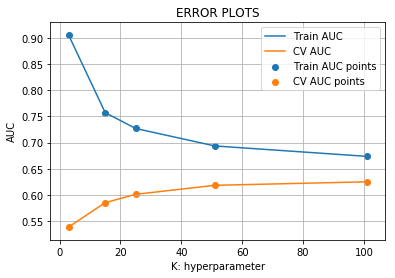

In [300]:
train5_auc = []
cv5_auc = []
K5 = [3, 15, 25, 51, 101]
for i in tqdm(K5):
    neigh5 = KNeighborsClassifier(n_neighbors=i,algorithm='brute', n_jobs=-1)
    neigh5.fit(X_train_avgw2vec_new, y_train)

    y_train_pred = batch_predict(neigh5, X_train_avgw2vec_new)    
    y_cv_pred = batch_predict(neigh5, X_cv_avgw2vec_new)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train5_auc.append(roc_auc_score(y_train,y_train_pred))
    cv5_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K5, train5_auc, label='Train AUC')
plt.plot(K5, cv5_auc, label='CV AUC')

plt.scatter(K5, train5_auc, label='Train AUC points')
plt.scatter(K5, cv5_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

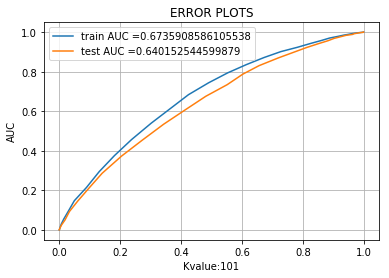

In [302]:
# Selecting the Value of Hyperparamter K as 101 since it provides the min differece in Train Auc And Cross Val AUC.
#Also during majority voting picking odd value of K gives clear winner in selcting class label
from sklearn.metrics import roc_curve, auc


neigh6 = KNeighborsClassifier(n_neighbors=101,algorithm='brute', n_jobs=-1)
neigh6.fit(X_train_avgw2vec_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred6 = batch_predict(neigh6, X_train_avgw2vec_new)    
y_test_pred6 = batch_predict(neigh6, X_test_avgw2vec_new)

train_fpr6, train_tpr6, tr_thresholds6 = roc_curve(y_train, y_train_pred6)
test_fpr6, test_tpr6, te_thresholds6 = roc_curve(y_test, y_test_pred6)

plt.plot(train_fpr6, train_tpr6, label="train AUC ="+str(auc(train_fpr6, train_tpr6)))
plt.plot(test_fpr6, test_tpr6, label="test AUC ="+str(auc(test_fpr6, test_tpr6)))
plt.legend()
plt.xlabel("Kvalue:101")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [303]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t2 = find_best_threshold(tr_thresholds6, train_fpr6, train_tpr6)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred6, best_t2)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred6, best_t2)))

the maximum value of tpr*(1-fpr) 0.393761891430695 for threshold 0.851
Train confusion matrix
[[ 2258  1665]
 [ 6500 14077]]
Test confusion matrix
[[1246 1156]
 [4082 8516]]


In [304]:
cm_avgw2vec_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred6, best_t2))
cm_avgw2vec_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred6, best_t2))

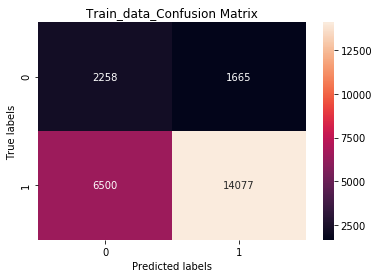

In [305]:
#Sea born heat map train confusion matrix
ax= plt.subplot()
sns.heatmap(cm_avgw2vec_train, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train_data_Confusion Matrix'); 

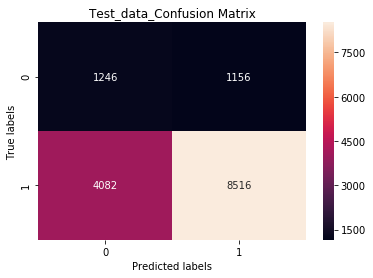

In [332]:
#Sea born heat map test confusion matrix
ax= plt.subplot()
sns.heatmap(cm_avgw2vec_test, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Test_data_Confusion Matrix'); 

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [ ]:
# Please write all the code with proper documentation

In [307]:
tfidf_model1 = TfidfVectorizer()
tfidf_model1.fit(X_train_df['Preprocessed_Project_Title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model1.get_feature_names(), list(tfidf_model1.idf_)))
tfidf_words1 = set(tfidf_model1.get_feature_names())

In [308]:
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_df['Preprocessed_Project_Title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in w2v_words) and (word in tfidf_words1):
            vec = w2v_model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))




  0%|                                                                                        | 0/24500 [00:00<?, ?it/s]


  0%|▏                                                                             | 58/24500 [00:00<00:50, 482.34it/s]


  2%|█▏                                                                           | 369/24500 [00:00<00:37, 644.69it/s]


  3%|██▋                                                                          | 844/24500 [00:00<00:27, 868.70it/s]


  5%|███▊                                                                       | 1237/24500 [00:00<00:20, 1132.59it/s]


  6%|████▊                                                                      | 1576/24500 [00:00<00:16, 1412.68it/s]


  8%|██████▏                                                                    | 2022/24500 [00:00<00:12, 1776.78it/s]


 10%|███████▎                                                                   | 2404/24500 [00:00<00:10, 2107.98it/s]


 11%|████████▍       

24500
50


In [309]:
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_df['Preprocessed_Project_Title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in w2v_words) and (word in tfidf_words1):
            vec = w2v_model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))




  0%|                                                                                        | 0/10500 [00:00<?, ?it/s]


  4%|██▉                                                                         | 406/10500 [00:00<00:02, 4030.50it/s]


  6%|████▋                                                                       | 652/10500 [00:00<00:02, 3372.48it/s]


  9%|██████▉                                                                     | 956/10500 [00:00<00:02, 3257.68it/s]


 12%|████████▊                                                                  | 1227/10500 [00:00<00:03, 3057.80it/s]


 14%|██████████▊                                                                | 1517/10500 [00:00<00:02, 3004.14it/s]


 18%|█████████████▋                                                             | 1921/10500 [00:00<00:02, 3240.78it/s]


 23%|████████████████▉                                                          | 2368/10500 [00:00<00:02, 3516.68it/s]


 26%|████████████████

10500
50


In [310]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_df['Preprocessed_Project_Title'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in w2v_words) and (word in tfidf_words1):
            vec = w2v_model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))




  0%|                                                                                        | 0/15000 [00:00<?, ?it/s]


  3%|█▉                                                                          | 389/15000 [00:00<00:03, 3861.73it/s]


  6%|████▍                                                                       | 880/15000 [00:00<00:03, 4118.41it/s]


  8%|█████▋                                                                     | 1127/15000 [00:00<00:04, 3421.01it/s]


  9%|██████▉                                                                    | 1389/15000 [00:00<00:04, 3125.29it/s]


 12%|█████████                                                                  | 1820/15000 [00:00<00:03, 3400.94it/s]


 15%|███████████                                                                | 2210/15000 [00:00<00:03, 3520.16it/s]


 17%|████████████▋                                                              | 2533/15000 [00:00<00:03, 3236.20it/s]


 19%|██████████████▎ 

15000
50


In [311]:
tfidf_model2 = TfidfVectorizer()
tfidf_model2.fit(X_train_df['Preprocessed_Essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary2 = dict(zip(tfidf_model2.get_feature_names(), list(tfidf_model2.idf_)))
tfidf_words2 = set(tfidf_model2.get_feature_names())

In [312]:
tfidf_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_df['Preprocessed_Essay'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in w2v_words1) and (word in tfidf_words2):
            vec = w2v_model1[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary2[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay.append(vector)

print(len(tfidf_w2v_vectors_essay))
print(len(tfidf_w2v_vectors_essay[0]))




  0%|                                                                                        | 0/24500 [00:00<?, ?it/s]


  0%|                                                                               | 13/24500 [00:00<04:07, 98.75it/s]


  0%|                                                                               | 20/24500 [00:00<04:52, 83.76it/s]


  0%|                                                                               | 27/24500 [00:00<05:30, 73.99it/s]


  0%|                                                                               | 33/24500 [00:00<05:59, 68.00it/s]


  0%|▏                                                                              | 42/24500 [00:00<05:35, 72.95it/s]


  0%|▏                                                                              | 51/24500 [00:00<05:30, 73.94it/s]


  0%|▏                                                                              | 58/24500 [00:00<06:18, 64.66it/s]


  0%|▏               

  2%|█▋                                                                            | 529/24500 [00:08<06:28, 61.63it/s]


  2%|█▋                                                                            | 536/24500 [00:08<06:31, 61.29it/s]


  2%|█▋                                                                            | 544/24500 [00:08<06:21, 62.78it/s]


  2%|█▊                                                                            | 554/24500 [00:08<05:48, 68.75it/s]


  2%|█▊                                                                            | 562/24500 [00:08<06:01, 66.28it/s]


  2%|█▊                                                                            | 569/24500 [00:08<06:25, 62.03it/s]


  2%|█▊                                                                            | 577/24500 [00:08<06:05, 65.50it/s]


  2%|█▊                                                                            | 585/24500 [00:08<05:48, 68.62it/s]


  2%|█▉                 

  4%|███▎                                                                         | 1041/24500 [00:16<06:40, 58.60it/s]


  4%|███▎                                                                         | 1049/24500 [00:16<06:08, 63.70it/s]


  4%|███▎                                                                         | 1056/24500 [00:16<07:00, 55.76it/s]


  4%|███▎                                                                         | 1065/24500 [00:16<06:16, 62.32it/s]


  4%|███▎                                                                         | 1073/24500 [00:16<05:56, 65.81it/s]


  4%|███▍                                                                         | 1080/24500 [00:16<05:57, 65.56it/s]


  4%|███▍                                                                         | 1088/24500 [00:16<05:39, 69.00it/s]


  4%|███▍                                                                         | 1096/24500 [00:16<05:53, 66.14it/s]


  5%|███▍               

  6%|████▊                                                                        | 1548/24500 [00:24<06:29, 58.96it/s]


  6%|████▉                                                                        | 1555/24500 [00:24<06:30, 58.74it/s]


  6%|████▉                                                                        | 1563/24500 [00:24<06:11, 61.68it/s]


  6%|████▉                                                                        | 1572/24500 [00:24<05:40, 67.30it/s]


  6%|████▉                                                                        | 1580/24500 [00:24<06:12, 61.56it/s]


  6%|████▉                                                                        | 1588/24500 [00:24<05:50, 65.44it/s]


  7%|█████                                                                        | 1596/24500 [00:25<05:47, 65.85it/s]


  7%|█████                                                                        | 1603/24500 [00:25<06:20, 60.11it/s]


  7%|█████              

  8%|██████▍                                                                      | 2034/24500 [00:32<06:57, 53.84it/s]


  8%|██████▍                                                                      | 2043/24500 [00:32<06:17, 59.50it/s]


  8%|██████▍                                                                      | 2050/24500 [00:32<07:03, 52.98it/s]


  8%|██████▍                                                                      | 2059/24500 [00:32<06:14, 59.96it/s]


  8%|██████▍                                                                      | 2066/24500 [00:32<06:03, 61.63it/s]


  8%|██████▌                                                                      | 2073/24500 [00:32<05:54, 63.27it/s]


  8%|██████▌                                                                      | 2081/24500 [00:32<05:37, 66.49it/s]


  9%|██████▌                                                                      | 2088/24500 [00:33<06:04, 61.41it/s]


  9%|██████▌            

 10%|███████▉                                                                     | 2537/24500 [00:40<06:16, 58.29it/s]


 10%|███████▉                                                                     | 2545/24500 [00:40<05:52, 62.34it/s]


 10%|████████                                                                     | 2552/24500 [00:40<06:03, 60.33it/s]


 10%|████████                                                                     | 2559/24500 [00:40<05:48, 62.89it/s]


 10%|████████                                                                     | 2566/24500 [00:40<05:43, 63.79it/s]


 11%|████████                                                                     | 2573/24500 [00:40<05:47, 63.04it/s]


 11%|████████                                                                     | 2580/24500 [00:41<05:46, 63.29it/s]


 11%|████████▏                                                                    | 2591/24500 [00:41<05:11, 70.30it/s]


 11%|████████▏          

 12%|█████████▍                                                                   | 3012/24500 [00:48<05:50, 61.33it/s]


 12%|█████████▍                                                                   | 3019/24500 [00:48<06:04, 58.89it/s]


 12%|█████████▌                                                                   | 3025/24500 [00:48<06:17, 56.85it/s]


 12%|█████████▌                                                                   | 3031/24500 [00:48<06:18, 56.76it/s]


 12%|█████████▌                                                                   | 3037/24500 [00:48<06:48, 52.59it/s]


 12%|█████████▌                                                                   | 3046/24500 [00:48<06:04, 58.80it/s]


 12%|█████████▌                                                                   | 3054/24500 [00:48<05:40, 63.06it/s]


 12%|█████████▌                                                                   | 3061/24500 [00:49<06:10, 57.86it/s]


 13%|█████████▋         

 14%|██████████▉                                                                  | 3497/24500 [00:56<06:20, 55.23it/s]


 14%|███████████                                                                  | 3503/24500 [00:56<06:36, 53.00it/s]


 14%|███████████                                                                  | 3509/24500 [00:56<06:27, 54.12it/s]


 14%|███████████                                                                  | 3515/24500 [00:56<07:02, 49.66it/s]


 14%|███████████                                                                  | 3525/24500 [00:56<06:08, 56.87it/s]


 14%|███████████                                                                  | 3533/24500 [00:56<05:48, 60.12it/s]


 14%|███████████▏                                                                 | 3540/24500 [00:56<05:38, 61.94it/s]


 14%|███████████▏                                                                 | 3547/24500 [00:57<05:48, 60.17it/s]


 15%|███████████▏       

 16%|████████████▌                                                                | 3978/24500 [01:04<04:53, 69.97it/s]


 16%|████████████▌                                                                | 3986/24500 [01:04<05:12, 65.55it/s]


 16%|████████████▌                                                                | 3995/24500 [01:04<04:54, 69.73it/s]


 16%|████████████▌                                                                | 4003/24500 [01:04<04:50, 70.64it/s]


 16%|████████████▌                                                                | 4011/24500 [01:04<04:52, 70.12it/s]


 16%|████████████▋                                                                | 4019/24500 [01:04<05:35, 61.12it/s]


 16%|████████████▋                                                                | 4027/24500 [01:05<05:24, 63.11it/s]


 16%|████████████▋                                                                | 4036/24500 [01:05<05:11, 65.69it/s]


 17%|████████████▋      

 18%|██████████████                                                               | 4473/24500 [01:12<05:30, 60.68it/s]


 18%|██████████████                                                               | 4481/24500 [01:12<05:22, 62.12it/s]


 18%|██████████████                                                               | 4488/24500 [01:12<05:29, 60.67it/s]


 18%|██████████████▏                                                              | 4495/24500 [01:12<05:34, 59.84it/s]


 18%|██████████████▏                                                              | 4502/24500 [01:13<05:26, 61.30it/s]


 18%|██████████████▏                                                              | 4509/24500 [01:13<05:29, 60.59it/s]


 18%|██████████████▏                                                              | 4516/24500 [01:13<05:31, 60.33it/s]


 18%|██████████████▏                                                              | 4523/24500 [01:13<05:22, 61.97it/s]


 18%|██████████████▏    

 20%|███████████████▌                                                             | 4969/24500 [01:20<05:25, 60.08it/s]


 20%|███████████████▋                                                             | 4976/24500 [01:20<05:44, 56.70it/s]


 20%|███████████████▋                                                             | 4983/24500 [01:20<05:32, 58.66it/s]


 20%|███████████████▋                                                             | 4991/24500 [01:20<05:09, 63.05it/s]


 20%|███████████████▋                                                             | 4998/24500 [01:21<05:14, 62.10it/s]


 20%|███████████████▋                                                             | 5005/24500 [01:21<05:20, 60.92it/s]


 20%|███████████████▊                                                             | 5012/24500 [01:21<05:07, 63.37it/s]


 20%|███████████████▊                                                             | 5019/24500 [01:21<05:15, 61.78it/s]


 21%|███████████████▊   

 22%|█████████████████▏                                                           | 5450/24500 [01:28<05:09, 61.62it/s]


 22%|█████████████████▏                                                           | 5458/24500 [01:28<04:54, 64.57it/s]


 22%|█████████████████▏                                                           | 5465/24500 [01:28<04:52, 65.14it/s]


 22%|█████████████████▏                                                           | 5472/24500 [01:28<04:49, 65.64it/s]


 22%|█████████████████▏                                                           | 5479/24500 [01:29<05:32, 57.12it/s]


 22%|█████████████████▏                                                           | 5487/24500 [01:29<05:08, 61.59it/s]


 22%|█████████████████▎                                                           | 5494/24500 [01:29<05:33, 56.99it/s]


 22%|█████████████████▎                                                           | 5501/24500 [01:29<05:21, 59.03it/s]


 22%|█████████████████▎ 

 24%|██████████████████▌                                                          | 5920/24500 [01:36<05:13, 59.31it/s]


 24%|██████████████████▋                                                          | 5927/24500 [01:36<05:27, 56.70it/s]


 24%|██████████████████▋                                                          | 5934/24500 [01:36<05:09, 59.94it/s]


 24%|██████████████████▋                                                          | 5941/24500 [01:37<04:57, 62.35it/s]


 24%|██████████████████▋                                                          | 5948/24500 [01:37<04:59, 61.91it/s]


 24%|██████████████████▋                                                          | 5955/24500 [01:37<05:18, 58.29it/s]


 24%|██████████████████▋                                                          | 5961/24500 [01:37<05:18, 58.23it/s]


 24%|██████████████████▊                                                          | 5967/24500 [01:37<05:16, 58.64it/s]


 24%|██████████████████▊

 26%|████████████████████                                                         | 6398/24500 [01:44<04:50, 62.38it/s]


 26%|████████████████████▏                                                        | 6405/24500 [01:44<04:45, 63.45it/s]


 26%|████████████████████▏                                                        | 6412/24500 [01:45<05:03, 59.58it/s]


 26%|████████████████████▏                                                        | 6419/24500 [01:45<04:57, 60.73it/s]


 26%|████████████████████▏                                                        | 6426/24500 [01:45<04:53, 61.58it/s]


 26%|████████████████████▏                                                        | 6433/24500 [01:45<05:06, 58.95it/s]


 26%|████████████████████▏                                                        | 6441/24500 [01:45<04:46, 63.06it/s]


 26%|████████████████████▎                                                        | 6448/24500 [01:45<05:14, 57.31it/s]


 26%|███████████████████

 28%|█████████████████████▋                                                       | 6903/24500 [01:52<04:50, 60.57it/s]


 28%|█████████████████████▋                                                       | 6910/24500 [01:53<05:26, 53.92it/s]


 28%|█████████████████████▋                                                       | 6917/24500 [01:53<05:12, 56.18it/s]


 28%|█████████████████████▊                                                       | 6926/24500 [01:53<04:40, 62.67it/s]


 28%|█████████████████████▊                                                       | 6933/24500 [01:53<04:46, 61.39it/s]


 28%|█████████████████████▊                                                       | 6941/24500 [01:53<04:30, 65.00it/s]


 28%|█████████████████████▊                                                       | 6948/24500 [01:53<04:50, 60.50it/s]


 28%|█████████████████████▊                                                       | 6955/24500 [01:53<04:49, 60.51it/s]


 28%|███████████████████

 30%|███████████████████████▏                                                     | 7384/24500 [02:01<04:52, 58.53it/s]


 30%|███████████████████████▏                                                     | 7391/24500 [02:01<04:41, 60.77it/s]


 30%|███████████████████████▎                                                     | 7398/24500 [02:01<04:33, 62.53it/s]


 30%|███████████████████████▎                                                     | 7405/24500 [02:01<04:46, 59.63it/s]


 30%|███████████████████████▎                                                     | 7412/24500 [02:01<04:51, 58.58it/s]


 30%|███████████████████████▎                                                     | 7419/24500 [02:01<04:37, 61.57it/s]


 30%|███████████████████████▎                                                     | 7426/24500 [02:01<04:37, 61.48it/s]


 30%|███████████████████████▎                                                     | 7434/24500 [02:01<04:18, 66.03it/s]


 30%|███████████████████

 32%|████████████████████████▊                                                    | 7877/24500 [02:09<04:11, 66.18it/s]


 32%|████████████████████████▊                                                    | 7884/24500 [02:09<04:47, 57.70it/s]


 32%|████████████████████████▊                                                    | 7891/24500 [02:09<04:37, 59.92it/s]


 32%|████████████████████████▊                                                    | 7898/24500 [02:09<04:35, 60.31it/s]


 32%|████████████████████████▊                                                    | 7905/24500 [02:09<04:41, 58.85it/s]


 32%|████████████████████████▊                                                    | 7912/24500 [02:09<04:35, 60.19it/s]


 32%|████████████████████████▉                                                    | 7919/24500 [02:09<04:26, 62.16it/s]


 32%|████████████████████████▉                                                    | 7926/24500 [02:09<04:42, 58.60it/s]


 32%|███████████████████

 34%|██████████████████████████▎                                                  | 8366/24500 [02:17<04:36, 58.43it/s]


 34%|██████████████████████████▎                                                  | 8373/24500 [02:17<04:32, 59.13it/s]


 34%|██████████████████████████▎                                                  | 8381/24500 [02:17<04:11, 64.14it/s]


 34%|██████████████████████████▎                                                  | 8388/24500 [02:17<04:07, 65.07it/s]


 34%|██████████████████████████▍                                                  | 8395/24500 [02:17<04:13, 63.56it/s]


 34%|██████████████████████████▍                                                  | 8402/24500 [02:17<04:19, 61.92it/s]


 34%|██████████████████████████▍                                                  | 8410/24500 [02:17<04:08, 64.80it/s]


 34%|██████████████████████████▍                                                  | 8419/24500 [02:17<03:54, 68.54it/s]


 34%|███████████████████

 36%|███████████████████████████▊                                                 | 8839/24500 [02:24<04:02, 64.58it/s]


 36%|███████████████████████████▊                                                 | 8846/24500 [02:25<04:20, 60.12it/s]


 36%|███████████████████████████▊                                                 | 8853/24500 [02:25<04:28, 58.29it/s]


 36%|███████████████████████████▊                                                 | 8860/24500 [02:25<04:18, 60.42it/s]


 36%|███████████████████████████▊                                                 | 8869/24500 [02:25<03:55, 66.39it/s]


 36%|███████████████████████████▉                                                 | 8876/24500 [02:25<04:04, 63.79it/s]


 36%|███████████████████████████▉                                                 | 8888/24500 [02:25<03:30, 74.21it/s]


 36%|███████████████████████████▉                                                 | 8897/24500 [02:25<03:54, 66.47it/s]


 36%|███████████████████

 38%|█████████████████████████████▎                                               | 9316/24500 [02:33<05:13, 48.51it/s]


 38%|█████████████████████████████▎                                               | 9323/24500 [02:33<04:45, 53.15it/s]


 38%|█████████████████████████████▎                                               | 9329/24500 [02:33<04:49, 52.35it/s]


 38%|█████████████████████████████▎                                               | 9336/24500 [02:33<04:52, 51.89it/s]


 38%|█████████████████████████████▎                                               | 9345/24500 [02:33<04:19, 58.32it/s]


 38%|█████████████████████████████▍                                               | 9352/24500 [02:33<04:28, 56.40it/s]


 38%|█████████████████████████████▍                                               | 9359/24500 [02:33<04:19, 58.29it/s]


 38%|█████████████████████████████▍                                               | 9366/24500 [02:33<04:18, 58.64it/s]


 38%|███████████████████

 40%|██████████████████████████████▊                                              | 9788/24500 [02:41<04:18, 56.90it/s]


 40%|██████████████████████████████▊                                              | 9794/24500 [02:41<04:28, 54.67it/s]


 40%|██████████████████████████████▊                                              | 9800/24500 [02:41<05:16, 46.42it/s]


 40%|██████████████████████████████▊                                              | 9805/24500 [02:41<05:32, 44.25it/s]


 40%|██████████████████████████████▊                                              | 9812/24500 [02:41<04:57, 49.36it/s]


 40%|██████████████████████████████▊                                              | 9822/24500 [02:41<04:19, 56.61it/s]


 40%|██████████████████████████████▉                                              | 9829/24500 [02:42<04:19, 56.57it/s]


 40%|██████████████████████████████▉                                              | 9836/24500 [02:42<04:46, 51.27it/s]


 40%|███████████████████

 42%|███████████████████████████████▊                                            | 10270/24500 [02:49<04:02, 58.61it/s]


 42%|███████████████████████████████▉                                            | 10277/24500 [02:49<03:58, 59.62it/s]


 42%|███████████████████████████████▉                                            | 10284/24500 [02:49<04:07, 57.39it/s]


 42%|███████████████████████████████▉                                            | 10291/24500 [02:49<04:02, 58.58it/s]


 42%|███████████████████████████████▉                                            | 10298/24500 [02:49<03:51, 61.31it/s]


 42%|███████████████████████████████▉                                            | 10305/24500 [02:49<03:43, 63.56it/s]


 42%|███████████████████████████████▉                                            | 10312/24500 [02:50<03:37, 65.23it/s]


 42%|████████████████████████████████                                            | 10322/24500 [02:50<03:20, 70.86it/s]


 42%|███████████████████

 44%|█████████████████████████████████▍                                          | 10776/24500 [02:57<04:17, 53.33it/s]


 44%|█████████████████████████████████▍                                          | 10785/24500 [02:57<03:56, 57.99it/s]


 44%|█████████████████████████████████▍                                          | 10792/24500 [02:57<03:47, 60.16it/s]


 44%|█████████████████████████████████▌                                          | 10800/24500 [02:57<03:32, 64.36it/s]


 44%|█████████████████████████████████▌                                          | 10807/24500 [02:58<04:06, 55.58it/s]


 44%|█████████████████████████████████▌                                          | 10813/24500 [02:58<04:10, 54.62it/s]


 44%|█████████████████████████████████▌                                          | 10821/24500 [02:58<03:51, 59.05it/s]


 44%|█████████████████████████████████▌                                          | 10828/24500 [02:58<03:44, 61.01it/s]


 44%|███████████████████

 46%|██████████████████████████████████▉                                         | 11268/24500 [03:05<03:54, 56.31it/s]


 46%|██████████████████████████████████▉                                         | 11274/24500 [03:05<04:03, 54.24it/s]


 46%|██████████████████████████████████▉                                         | 11282/24500 [03:05<03:45, 58.70it/s]


 46%|███████████████████████████████████                                         | 11289/24500 [03:06<03:39, 60.15it/s]


 46%|███████████████████████████████████                                         | 11296/24500 [03:06<03:49, 57.45it/s]


 46%|███████████████████████████████████                                         | 11307/24500 [03:06<03:19, 65.97it/s]


 46%|███████████████████████████████████                                         | 11315/24500 [03:06<03:34, 61.55it/s]


 46%|███████████████████████████████████                                         | 11322/24500 [03:06<03:43, 59.09it/s]


 46%|███████████████████

 48%|████████████████████████████████████▍                                       | 11759/24500 [03:13<03:07, 67.98it/s]


 48%|████████████████████████████████████▌                                       | 11767/24500 [03:13<02:59, 71.05it/s]


 48%|████████████████████████████████████▌                                       | 11775/24500 [03:14<03:22, 62.85it/s]


 48%|████████████████████████████████████▌                                       | 11785/24500 [03:14<03:01, 70.03it/s]


 48%|████████████████████████████████████▌                                       | 11793/24500 [03:14<03:11, 66.47it/s]


 48%|████████████████████████████████████▌                                       | 11801/24500 [03:14<03:10, 66.50it/s]


 48%|████████████████████████████████████▋                                       | 11808/24500 [03:14<03:13, 65.59it/s]


 48%|████████████████████████████████████▋                                       | 11815/24500 [03:14<03:11, 66.27it/s]


 48%|███████████████████

 50%|█████████████████████████████████████▉                                      | 12229/24500 [03:21<03:30, 58.38it/s]


 50%|█████████████████████████████████████▉                                      | 12238/24500 [03:21<03:09, 64.60it/s]


 50%|█████████████████████████████████████▉                                      | 12246/24500 [03:22<03:05, 66.23it/s]


 50%|██████████████████████████████████████                                      | 12253/24500 [03:22<03:19, 61.52it/s]


 50%|██████████████████████████████████████                                      | 12262/24500 [03:22<03:00, 67.70it/s]


 50%|██████████████████████████████████████                                      | 12270/24500 [03:22<03:06, 65.70it/s]


 50%|██████████████████████████████████████                                      | 12278/24500 [03:22<03:02, 67.01it/s]


 50%|██████████████████████████████████████                                      | 12285/24500 [03:22<03:35, 56.68it/s]


 50%|███████████████████

 52%|███████████████████████████████████████▍                                    | 12727/24500 [03:29<03:06, 62.98it/s]


 52%|███████████████████████████████████████▌                                    | 12735/24500 [03:29<02:58, 65.99it/s]


 52%|███████████████████████████████████████▌                                    | 12742/24500 [03:30<03:12, 61.22it/s]


 52%|███████████████████████████████████████▌                                    | 12750/24500 [03:30<03:02, 64.46it/s]


 52%|███████████████████████████████████████▌                                    | 12758/24500 [03:30<02:57, 66.08it/s]


 52%|███████████████████████████████████████▌                                    | 12767/24500 [03:30<02:47, 69.96it/s]


 52%|███████████████████████████████████████▋                                    | 12776/24500 [03:30<02:42, 72.05it/s]


 52%|███████████████████████████████████████▋                                    | 12784/24500 [03:30<02:55, 66.88it/s]


 52%|███████████████████

 54%|████████████████████████████████████████▉                                   | 13210/24500 [03:37<03:16, 57.31it/s]


 54%|█████████████████████████████████████████                                   | 13219/24500 [03:38<02:57, 63.54it/s]


 54%|█████████████████████████████████████████                                   | 13226/24500 [03:38<03:02, 61.78it/s]


 54%|█████████████████████████████████████████                                   | 13234/24500 [03:38<02:54, 64.70it/s]


 54%|█████████████████████████████████████████                                   | 13241/24500 [03:38<03:06, 60.34it/s]


 54%|█████████████████████████████████████████                                   | 13248/24500 [03:38<03:08, 59.79it/s]


 54%|█████████████████████████████████████████                                   | 13255/24500 [03:38<03:02, 61.53it/s]


 54%|█████████████████████████████████████████▏                                  | 13262/24500 [03:38<03:10, 59.00it/s]


 54%|███████████████████

 56%|██████████████████████████████████████████▍                                 | 13698/24500 [03:45<02:40, 67.29it/s]


 56%|██████████████████████████████████████████▌                                 | 13705/24500 [03:46<02:50, 63.37it/s]


 56%|██████████████████████████████████████████▌                                 | 13713/24500 [03:46<02:43, 65.92it/s]


 56%|██████████████████████████████████████████▌                                 | 13720/24500 [03:46<02:51, 62.75it/s]


 56%|██████████████████████████████████████████▌                                 | 13729/24500 [03:46<02:43, 65.89it/s]


 56%|██████████████████████████████████████████▌                                 | 13737/24500 [03:46<02:40, 66.89it/s]


 56%|██████████████████████████████████████████▋                                 | 13744/24500 [03:46<02:38, 67.77it/s]


 56%|██████████████████████████████████████████▋                                 | 13751/24500 [03:46<02:55, 61.21it/s]


 56%|███████████████████

 58%|████████████████████████████████████████████                                | 14196/24500 [03:54<02:48, 61.01it/s]


 58%|████████████████████████████████████████████                                | 14203/24500 [03:54<02:49, 60.75it/s]


 58%|████████████████████████████████████████████                                | 14210/24500 [03:54<02:54, 59.00it/s]


 58%|████████████████████████████████████████████                                | 14217/24500 [03:54<02:56, 58.11it/s]


 58%|████████████████████████████████████████████                                | 14224/24500 [03:54<02:55, 58.39it/s]


 58%|████████████████████████████████████████████▏                               | 14230/24500 [03:54<02:54, 58.82it/s]


 58%|████████████████████████████████████████████▏                               | 14237/24500 [03:54<02:47, 61.42it/s]


 58%|████████████████████████████████████████████▏                               | 14244/24500 [03:54<02:58, 57.46it/s]


 58%|███████████████████

 60%|█████████████████████████████████████████████▌                              | 14676/24500 [04:02<02:33, 63.90it/s]


 60%|█████████████████████████████████████████████▌                              | 14683/24500 [04:02<02:43, 60.20it/s]


 60%|█████████████████████████████████████████████▌                              | 14690/24500 [04:02<02:56, 55.43it/s]


 60%|█████████████████████████████████████████████▌                              | 14696/24500 [04:02<03:06, 52.60it/s]


 60%|█████████████████████████████████████████████▌                              | 14702/24500 [04:02<03:22, 48.45it/s]


 60%|█████████████████████████████████████████████▌                              | 14708/24500 [04:02<03:11, 51.07it/s]


 60%|█████████████████████████████████████████████▋                              | 14714/24500 [04:02<03:05, 52.65it/s]


 60%|█████████████████████████████████████████████▋                              | 14720/24500 [04:02<03:05, 52.69it/s]


 60%|███████████████████

 62%|███████████████████████████████████████████████                             | 15163/24500 [04:10<02:29, 62.50it/s]


 62%|███████████████████████████████████████████████                             | 15170/24500 [04:10<02:26, 63.57it/s]


 62%|███████████████████████████████████████████████                             | 15177/24500 [04:10<02:34, 60.25it/s]


 62%|███████████████████████████████████████████████                             | 15184/24500 [04:10<02:40, 58.17it/s]


 62%|███████████████████████████████████████████████                             | 15190/24500 [04:10<02:43, 57.11it/s]


 62%|███████████████████████████████████████████████▏                            | 15196/24500 [04:10<02:48, 55.38it/s]


 62%|███████████████████████████████████████████████▏                            | 15204/24500 [04:10<02:32, 61.01it/s]


 62%|███████████████████████████████████████████████▏                            | 15212/24500 [04:10<02:24, 64.11it/s]


 62%|███████████████████

 64%|████████████████████████████████████████████████▍                           | 15633/24500 [04:18<02:30, 59.08it/s]


 64%|████████████████████████████████████████████████▌                           | 15640/24500 [04:18<02:22, 61.96it/s]


 64%|████████████████████████████████████████████████▌                           | 15647/24500 [04:18<02:29, 59.26it/s]


 64%|████████████████████████████████████████████████▌                           | 15654/24500 [04:18<02:23, 61.45it/s]


 64%|████████████████████████████████████████████████▌                           | 15661/24500 [04:18<02:43, 54.07it/s]


 64%|████████████████████████████████████████████████▌                           | 15669/24500 [04:18<02:28, 59.37it/s]


 64%|████████████████████████████████████████████████▋                           | 15676/24500 [04:18<02:24, 61.19it/s]


 64%|████████████████████████████████████████████████▋                           | 15683/24500 [04:19<02:23, 61.23it/s]


 64%|███████████████████

 66%|██████████████████████████████████████████████████                          | 16121/24500 [04:26<02:08, 65.27it/s]


 66%|██████████████████████████████████████████████████                          | 16131/24500 [04:26<01:55, 72.59it/s]


 66%|██████████████████████████████████████████████████                          | 16140/24500 [04:26<01:52, 74.44it/s]


 66%|██████████████████████████████████████████████████                          | 16148/24500 [04:26<02:02, 68.31it/s]


 66%|██████████████████████████████████████████████████                          | 16156/24500 [04:26<01:57, 71.30it/s]


 66%|██████████████████████████████████████████████████▏                         | 16164/24500 [04:26<02:04, 66.76it/s]


 66%|██████████████████████████████████████████████████▏                         | 16171/24500 [04:26<02:10, 63.87it/s]


 66%|██████████████████████████████████████████████████▏                         | 16178/24500 [04:27<02:13, 62.32it/s]


 66%|███████████████████

 68%|███████████████████████████████████████████████████▍                        | 16567/24500 [04:34<03:25, 38.51it/s]


 68%|███████████████████████████████████████████████████▍                        | 16572/24500 [04:34<03:20, 39.62it/s]


 68%|███████████████████████████████████████████████████▍                        | 16577/24500 [04:34<03:30, 37.70it/s]


 68%|███████████████████████████████████████████████████▍                        | 16582/24500 [04:35<03:20, 39.58it/s]


 68%|███████████████████████████████████████████████████▍                        | 16588/24500 [04:35<03:03, 43.13it/s]


 68%|███████████████████████████████████████████████████▍                        | 16595/24500 [04:35<02:45, 47.62it/s]


 68%|███████████████████████████████████████████████████▍                        | 16601/24500 [04:35<02:52, 45.86it/s]


 68%|███████████████████████████████████████████████████▌                        | 16607/24500 [04:35<02:41, 49.02it/s]


 68%|███████████████████

 70%|████████████████████████████████████████████████████▊                       | 17028/24500 [04:42<02:05, 59.61it/s]


 70%|████████████████████████████████████████████████████▊                       | 17036/24500 [04:42<01:58, 62.92it/s]


 70%|████████████████████████████████████████████████████▊                       | 17043/24500 [04:42<01:55, 64.76it/s]


 70%|████████████████████████████████████████████████████▉                       | 17050/24500 [04:42<01:59, 62.57it/s]


 70%|████████████████████████████████████████████████████▉                       | 17057/24500 [04:43<02:14, 55.48it/s]


 70%|████████████████████████████████████████████████████▉                       | 17064/24500 [04:43<02:09, 57.42it/s]


 70%|████████████████████████████████████████████████████▉                       | 17070/24500 [04:43<02:11, 56.49it/s]


 70%|████████████████████████████████████████████████████▉                       | 17077/24500 [04:43<02:03, 59.94it/s]


 70%|███████████████████

 71%|██████████████████████████████████████████████████████▎                     | 17504/24500 [04:50<01:59, 58.43it/s]


 71%|██████████████████████████████████████████████████████▎                     | 17513/24500 [04:50<01:50, 63.26it/s]


 72%|██████████████████████████████████████████████████████▎                     | 17522/24500 [04:50<01:43, 67.69it/s]


 72%|██████████████████████████████████████████████████████▍                     | 17531/24500 [04:51<01:37, 71.40it/s]


 72%|██████████████████████████████████████████████████████▍                     | 17539/24500 [04:51<01:39, 69.97it/s]


 72%|██████████████████████████████████████████████████████▍                     | 17547/24500 [04:51<01:44, 66.47it/s]


 72%|██████████████████████████████████████████████████████▍                     | 17554/24500 [04:51<01:57, 58.99it/s]


 72%|██████████████████████████████████████████████████████▍                     | 17563/24500 [04:51<01:46, 64.95it/s]


 72%|███████████████████

 73%|███████████████████████████████████████████████████████▊                    | 17992/24500 [04:58<01:53, 57.20it/s]


 73%|███████████████████████████████████████████████████████▊                    | 17999/24500 [04:58<01:49, 59.64it/s]


 73%|███████████████████████████████████████████████████████▊                    | 18007/24500 [04:58<01:40, 64.52it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18014/24500 [04:59<01:40, 64.25it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18021/24500 [04:59<01:46, 60.73it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18028/24500 [04:59<01:46, 60.91it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18035/24500 [04:59<01:45, 61.11it/s]


 74%|███████████████████████████████████████████████████████▉                    | 18042/24500 [04:59<01:50, 58.63it/s]


 74%|███████████████████

 75%|█████████████████████████████████████████████████████████▎                  | 18465/24500 [05:06<01:51, 53.92it/s]


 75%|█████████████████████████████████████████████████████████▎                  | 18472/24500 [05:06<01:47, 56.27it/s]


 75%|█████████████████████████████████████████████████████████▎                  | 18482/24500 [05:06<01:33, 64.18it/s]


 75%|█████████████████████████████████████████████████████████▎                  | 18489/24500 [05:07<01:46, 56.63it/s]


 75%|█████████████████████████████████████████████████████████▍                  | 18496/24500 [05:07<01:40, 59.65it/s]


 76%|█████████████████████████████████████████████████████████▍                  | 18504/24500 [05:07<01:33, 64.27it/s]


 76%|█████████████████████████████████████████████████████████▍                  | 18511/24500 [05:07<01:33, 64.02it/s]


 76%|█████████████████████████████████████████████████████████▍                  | 18518/24500 [05:07<01:42, 58.43it/s]


 76%|███████████████████

 77%|██████████████████████████████████████████████████████████▋                 | 18910/24500 [05:14<01:43, 53.87it/s]


 77%|██████████████████████████████████████████████████████████▋                 | 18920/24500 [05:14<01:30, 61.84it/s]


 77%|██████████████████████████████████████████████████████████▋                 | 18927/24500 [05:15<01:32, 60.18it/s]


 77%|██████████████████████████████████████████████████████████▋                 | 18937/24500 [05:15<01:26, 64.40it/s]


 77%|██████████████████████████████████████████████████████████▊                 | 18945/24500 [05:15<01:22, 67.28it/s]


 77%|██████████████████████████████████████████████████████████▊                 | 18953/24500 [05:15<01:20, 68.83it/s]


 77%|██████████████████████████████████████████████████████████▊                 | 18961/24500 [05:15<01:23, 66.41it/s]


 77%|██████████████████████████████████████████████████████████▊                 | 18968/24500 [05:15<01:29, 61.48it/s]


 77%|███████████████████

 79%|████████████████████████████████████████████████████████████▏               | 19385/24500 [05:22<01:39, 51.66it/s]


 79%|████████████████████████████████████████████████████████████▏               | 19391/24500 [05:23<01:40, 51.06it/s]


 79%|████████████████████████████████████████████████████████████▏               | 19398/24500 [05:23<01:33, 54.32it/s]


 79%|████████████████████████████████████████████████████████████▏               | 19404/24500 [05:23<01:32, 55.00it/s]


 79%|████████████████████████████████████████████████████████████▏               | 19413/24500 [05:23<01:29, 57.07it/s]


 79%|████████████████████████████████████████████████████████████▎               | 19424/24500 [05:23<01:17, 65.54it/s]


 79%|████████████████████████████████████████████████████████████▎               | 19432/24500 [05:23<01:23, 60.45it/s]


 79%|████████████████████████████████████████████████████████████▎               | 19439/24500 [05:23<01:20, 62.99it/s]


 79%|███████████████████

 81%|█████████████████████████████████████████████████████████████▌              | 19863/24500 [05:30<01:11, 64.94it/s]


 81%|█████████████████████████████████████████████████████████████▋              | 19871/24500 [05:31<01:08, 67.49it/s]


 81%|█████████████████████████████████████████████████████████████▋              | 19878/24500 [05:31<01:08, 67.88it/s]


 81%|█████████████████████████████████████████████████████████████▋              | 19885/24500 [05:31<01:10, 65.48it/s]


 81%|█████████████████████████████████████████████████████████████▋              | 19892/24500 [05:31<01:12, 63.91it/s]


 81%|█████████████████████████████████████████████████████████████▋              | 19899/24500 [05:31<01:13, 62.59it/s]


 81%|█████████████████████████████████████████████████████████████▊              | 19908/24500 [05:31<01:10, 65.26it/s]


 81%|█████████████████████████████████████████████████████████████▊              | 19915/24500 [05:31<01:12, 63.67it/s]


 81%|███████████████████

 83%|███████████████████████████████████████████████████████████████▏            | 20364/24500 [05:38<01:04, 63.78it/s]


 83%|███████████████████████████████████████████████████████████████▏            | 20371/24500 [05:38<01:07, 61.39it/s]


 83%|███████████████████████████████████████████████████████████████▏            | 20378/24500 [05:39<01:11, 57.48it/s]


 83%|███████████████████████████████████████████████████████████████▏            | 20384/24500 [05:39<01:11, 57.70it/s]


 83%|███████████████████████████████████████████████████████████████▎            | 20390/24500 [05:39<01:12, 56.54it/s]


 83%|███████████████████████████████████████████████████████████████▎            | 20397/24500 [05:39<01:10, 58.03it/s]


 83%|███████████████████████████████████████████████████████████████▎            | 20403/24500 [05:39<01:15, 54.29it/s]


 83%|███████████████████████████████████████████████████████████████▎            | 20409/24500 [05:39<01:13, 55.38it/s]


 83%|███████████████████

 85%|████████████████████████████████████████████████████████████████▌           | 20818/24500 [05:46<01:06, 55.06it/s]


 85%|████████████████████████████████████████████████████████████████▌           | 20825/24500 [05:46<01:03, 57.55it/s]


 85%|████████████████████████████████████████████████████████████████▌           | 20832/24500 [05:47<01:00, 60.78it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 20840/24500 [05:47<00:58, 62.82it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 20847/24500 [05:47<01:05, 55.48it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 20853/24500 [05:47<01:06, 54.94it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 20859/24500 [05:47<01:04, 56.23it/s]


 85%|████████████████████████████████████████████████████████████████▋           | 20865/24500 [05:47<01:13, 49.74it/s]


 85%|███████████████████

 87%|██████████████████████████████████████████████████████████████████          | 21294/24500 [05:55<00:50, 63.92it/s]


 87%|██████████████████████████████████████████████████████████████████          | 21301/24500 [05:55<00:56, 56.72it/s]


 87%|██████████████████████████████████████████████████████████████████          | 21308/24500 [05:55<00:54, 58.09it/s]


 87%|██████████████████████████████████████████████████████████████████          | 21316/24500 [05:55<00:52, 60.74it/s]


 87%|██████████████████████████████████████████████████████████████████▏         | 21323/24500 [05:55<00:52, 60.51it/s]


 87%|██████████████████████████████████████████████████████████████████▏         | 21331/24500 [05:55<00:49, 64.38it/s]


 87%|██████████████████████████████████████████████████████████████████▏         | 21338/24500 [05:55<00:53, 59.17it/s]


 87%|██████████████████████████████████████████████████████████████████▏         | 21345/24500 [05:55<00:52, 60.18it/s]


 87%|███████████████████

 89%|███████████████████████████████████████████████████████████████████▌        | 21790/24500 [06:03<00:47, 56.54it/s]


 89%|███████████████████████████████████████████████████████████████████▌        | 21796/24500 [06:03<00:49, 54.13it/s]


 89%|███████████████████████████████████████████████████████████████████▋        | 21802/24500 [06:03<00:53, 50.22it/s]


 89%|███████████████████████████████████████████████████████████████████▋        | 21810/24500 [06:03<00:47, 56.50it/s]


 89%|███████████████████████████████████████████████████████████████████▋        | 21816/24500 [06:03<00:47, 56.86it/s]


 89%|███████████████████████████████████████████████████████████████████▋        | 21823/24500 [06:03<00:45, 59.37it/s]


 89%|███████████████████████████████████████████████████████████████████▋        | 21830/24500 [06:03<00:46, 57.55it/s]


 89%|███████████████████████████████████████████████████████████████████▋        | 21837/24500 [06:04<00:44, 59.29it/s]


 89%|███████████████████

 91%|█████████████████████████████████████████████████████████████████████       | 22262/24500 [06:11<00:46, 47.74it/s]


 91%|█████████████████████████████████████████████████████████████████████       | 22268/24500 [06:11<00:44, 50.25it/s]


 91%|█████████████████████████████████████████████████████████████████████       | 22275/24500 [06:11<00:41, 53.31it/s]


 91%|█████████████████████████████████████████████████████████████████████       | 22282/24500 [06:11<00:39, 56.34it/s]


 91%|█████████████████████████████████████████████████████████████████████▏      | 22290/24500 [06:11<00:35, 61.58it/s]


 91%|█████████████████████████████████████████████████████████████████████▏      | 22297/24500 [06:11<00:37, 58.21it/s]


 91%|█████████████████████████████████████████████████████████████████████▏      | 22304/24500 [06:11<00:35, 61.03it/s]


 91%|█████████████████████████████████████████████████████████████████████▏      | 22311/24500 [06:12<00:35, 61.51it/s]


 91%|███████████████████

 93%|██████████████████████████████████████████████████████████████████████▌     | 22737/24500 [06:19<00:30, 57.47it/s]


 93%|██████████████████████████████████████████████████████████████████████▌     | 22744/24500 [06:19<00:29, 60.30it/s]


 93%|██████████████████████████████████████████████████████████████████████▌     | 22751/24500 [06:19<00:32, 54.59it/s]


 93%|██████████████████████████████████████████████████████████████████████▌     | 22759/24500 [06:19<00:30, 57.39it/s]


 93%|██████████████████████████████████████████████████████████████████████▌     | 22767/24500 [06:19<00:28, 61.17it/s]


 93%|██████████████████████████████████████████████████████████████████████▋     | 22775/24500 [06:20<00:26, 64.67it/s]


 93%|██████████████████████████████████████████████████████████████████████▋     | 22782/24500 [06:20<00:26, 65.12it/s]


 93%|██████████████████████████████████████████████████████████████████████▋     | 22789/24500 [06:20<00:27, 62.34it/s]


 93%|███████████████████

 95%|███████████████████████████████████████████████████████████████████████▉    | 23210/24500 [06:27<00:23, 53.95it/s]


 95%|████████████████████████████████████████████████████████████████████████    | 23216/24500 [06:27<00:24, 53.17it/s]


 95%|████████████████████████████████████████████████████████████████████████    | 23222/24500 [06:27<00:26, 48.32it/s]


 95%|████████████████████████████████████████████████████████████████████████    | 23227/24500 [06:27<00:27, 46.28it/s]


 95%|████████████████████████████████████████████████████████████████████████    | 23235/24500 [06:27<00:24, 52.28it/s]


 95%|████████████████████████████████████████████████████████████████████████    | 23241/24500 [06:27<00:23, 52.49it/s]


 95%|████████████████████████████████████████████████████████████████████████    | 23247/24500 [06:28<00:23, 53.70it/s]


 95%|████████████████████████████████████████████████████████████████████████▏   | 23253/24500 [06:28<00:25, 48.28it/s]


 95%|███████████████████

 97%|█████████████████████████████████████████████████████████████████████████▍  | 23677/24500 [06:35<00:17, 46.63it/s]


 97%|█████████████████████████████████████████████████████████████████████████▍  | 23682/24500 [06:35<00:17, 45.55it/s]


 97%|█████████████████████████████████████████████████████████████████████████▍  | 23687/24500 [06:35<00:17, 46.13it/s]


 97%|█████████████████████████████████████████████████████████████████████████▍  | 23692/24500 [06:35<00:19, 41.10it/s]


 97%|█████████████████████████████████████████████████████████████████████████▌  | 23697/24500 [06:36<00:19, 42.03it/s]


 97%|█████████████████████████████████████████████████████████████████████████▌  | 23704/24500 [06:36<00:16, 47.20it/s]


 97%|█████████████████████████████████████████████████████████████████████████▌  | 23710/24500 [06:36<00:15, 50.00it/s]


 97%|█████████████████████████████████████████████████████████████████████████▌  | 23716/24500 [06:36<00:15, 50.00it/s]


 97%|███████████████████

 98%|██████████████████████████████████████████████████████████████████████████▊ | 24122/24500 [06:43<00:07, 49.69it/s]


 98%|██████████████████████████████████████████████████████████████████████████▊ | 24128/24500 [06:44<00:07, 50.58it/s]


 99%|██████████████████████████████████████████████████████████████████████████▊ | 24135/24500 [06:44<00:06, 52.96it/s]


 99%|██████████████████████████████████████████████████████████████████████████▉ | 24142/24500 [06:44<00:06, 55.40it/s]


 99%|██████████████████████████████████████████████████████████████████████████▉ | 24148/24500 [06:44<00:06, 51.42it/s]


 99%|██████████████████████████████████████████████████████████████████████████▉ | 24154/24500 [06:44<00:06, 51.71it/s]


 99%|██████████████████████████████████████████████████████████████████████████▉ | 24162/24500 [06:44<00:05, 57.18it/s]


 99%|██████████████████████████████████████████████████████████████████████████▉ | 24168/24500 [06:44<00:05, 57.96it/s]


 99%|███████████████████

24500
50


In [313]:
tfidf_w2v_vectors_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv_df['Preprocessed_Essay'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in w2v_words1) and (word in tfidf_words2):
            vec = w2v_model1[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary2[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_cv.append(vector)

print(len(tfidf_w2v_vectors_essay_cv))
print(len(tfidf_w2v_vectors_essay_cv[0]))




  0%|                                                                                        | 0/10500 [00:00<?, ?it/s]


  0%|                                                                                | 7/10500 [00:00<02:31, 69.14it/s]


  0%|                                                                               | 16/10500 [00:00<02:22, 73.72it/s]


  0%|▏                                                                              | 21/10500 [00:00<03:00, 57.98it/s]


  0%|▏                                                                              | 27/10500 [00:00<03:03, 57.12it/s]


  0%|▏                                                                              | 32/10500 [00:00<03:19, 52.42it/s]


  0%|▎                                                                              | 37/10500 [00:00<03:37, 48.00it/s]


  0%|▎                                                                              | 42/10500 [00:00<03:51, 45.20it/s]


  0%|▎               

  4%|███▏                                                                          | 428/10500 [00:08<03:15, 51.60it/s]


  4%|███▎                                                                          | 439/10500 [00:08<02:46, 60.36it/s]


  4%|███▎                                                                          | 446/10500 [00:08<02:56, 56.86it/s]


  4%|███▎                                                                          | 453/10500 [00:08<02:57, 56.69it/s]


  4%|███▍                                                                          | 462/10500 [00:08<02:42, 61.71it/s]


  4%|███▍                                                                          | 469/10500 [00:08<02:45, 60.59it/s]


  5%|███▌                                                                          | 477/10500 [00:08<02:34, 64.72it/s]


  5%|███▌                                                                          | 484/10500 [00:09<02:52, 57.99it/s]


  5%|███▋               

  9%|██████▊                                                                       | 910/10500 [00:16<02:25, 65.91it/s]


  9%|██████▊                                                                       | 917/10500 [00:16<02:22, 67.04it/s]


  9%|██████▊                                                                       | 924/10500 [00:16<02:38, 60.33it/s]


  9%|██████▉                                                                       | 931/10500 [00:16<02:42, 58.74it/s]


  9%|██████▉                                                                       | 939/10500 [00:16<02:33, 62.31it/s]


  9%|███████                                                                       | 947/10500 [00:16<02:23, 66.69it/s]


  9%|███████                                                                       | 955/10500 [00:16<02:17, 69.48it/s]


  9%|███████▏                                                                      | 963/10500 [00:17<02:51, 55.75it/s]


  9%|███████▏           

 13%|██████████▏                                                                  | 1392/10500 [00:24<02:47, 54.47it/s]


 13%|██████████▎                                                                  | 1400/10500 [00:24<02:33, 59.47it/s]


 13%|██████████▎                                                                  | 1408/10500 [00:24<02:24, 62.81it/s]


 13%|██████████▍                                                                  | 1415/10500 [00:24<02:38, 57.24it/s]


 14%|██████████▍                                                                  | 1422/10500 [00:24<02:39, 57.05it/s]


 14%|██████████▍                                                                  | 1428/10500 [00:25<02:38, 57.32it/s]


 14%|██████████▌                                                                  | 1435/10500 [00:25<02:39, 56.71it/s]


 14%|██████████▌                                                                  | 1441/10500 [00:25<02:37, 57.64it/s]


 14%|██████████▋        

 18%|█████████████▌                                                               | 1856/10500 [00:32<02:37, 54.93it/s]


 18%|█████████████▋                                                               | 1863/10500 [00:32<02:32, 56.50it/s]


 18%|█████████████▋                                                               | 1869/10500 [00:32<02:30, 57.45it/s]


 18%|█████████████▊                                                               | 1876/10500 [00:32<02:25, 59.18it/s]


 18%|█████████████▊                                                               | 1883/10500 [00:32<02:36, 55.05it/s]


 18%|█████████████▊                                                               | 1889/10500 [00:33<02:51, 50.26it/s]


 18%|█████████████▉                                                               | 1896/10500 [00:33<02:37, 54.68it/s]


 18%|█████████████▉                                                               | 1903/10500 [00:33<02:32, 56.45it/s]


 18%|█████████████▉     

 22%|█████████████████                                                            | 2321/10500 [00:40<02:17, 59.36it/s]


 22%|█████████████████                                                            | 2328/10500 [00:40<02:34, 53.03it/s]


 22%|█████████████████                                                            | 2335/10500 [00:40<02:25, 56.10it/s]


 22%|█████████████████▏                                                           | 2343/10500 [00:40<02:17, 59.23it/s]


 22%|█████████████████▏                                                           | 2351/10500 [00:41<02:10, 62.63it/s]


 22%|█████████████████▎                                                           | 2358/10500 [00:41<02:23, 56.58it/s]


 23%|█████████████████▎                                                           | 2364/10500 [00:41<02:25, 56.00it/s]


 23%|█████████████████▍                                                           | 2370/10500 [00:41<02:35, 52.13it/s]


 23%|█████████████████▍ 

 27%|████████████████████▌                                                        | 2811/10500 [00:48<01:57, 65.30it/s]


 27%|████████████████████▋                                                        | 2821/10500 [00:48<01:46, 71.88it/s]


 27%|████████████████████▋                                                        | 2829/10500 [00:48<01:49, 70.26it/s]


 27%|████████████████████▊                                                        | 2837/10500 [00:48<01:50, 69.16it/s]


 27%|████████████████████▊                                                        | 2845/10500 [00:48<01:53, 67.62it/s]


 27%|████████████████████▉                                                        | 2853/10500 [00:49<01:53, 67.39it/s]


 27%|████████████████████▉                                                        | 2860/10500 [00:49<01:55, 66.27it/s]


 27%|█████████████████████                                                        | 2867/10500 [00:49<01:59, 63.99it/s]


 27%|███████████████████

 31%|████████████████████████▏                                                    | 3306/10500 [00:56<01:45, 68.11it/s]


 32%|████████████████████████▎                                                    | 3314/10500 [00:56<01:42, 69.96it/s]


 32%|████████████████████████▎                                                    | 3322/10500 [00:56<01:42, 69.98it/s]


 32%|████████████████████████▍                                                    | 3330/10500 [00:56<01:48, 66.19it/s]


 32%|████████████████████████▍                                                    | 3337/10500 [00:56<01:49, 65.70it/s]


 32%|████████████████████████▌                                                    | 3344/10500 [00:57<01:52, 63.53it/s]


 32%|████████████████████████▌                                                    | 3351/10500 [00:57<01:50, 64.82it/s]


 32%|████████████████████████▋                                                    | 3358/10500 [00:57<01:52, 63.55it/s]


 32%|███████████████████

 36%|███████████████████████████▊                                                 | 3799/10500 [01:04<01:50, 60.65it/s]


 36%|███████████████████████████▉                                                 | 3806/10500 [01:04<01:59, 55.85it/s]


 36%|███████████████████████████▉                                                 | 3815/10500 [01:04<01:46, 62.97it/s]


 36%|████████████████████████████                                                 | 3822/10500 [01:04<01:44, 63.95it/s]


 36%|████████████████████████████                                                 | 3829/10500 [01:04<01:46, 62.61it/s]


 37%|████████████████████████████▏                                                | 3836/10500 [01:05<01:48, 61.31it/s]


 37%|████████████████████████████▏                                                | 3843/10500 [01:05<01:51, 59.52it/s]


 37%|████████████████████████████▏                                                | 3850/10500 [01:05<01:52, 59.05it/s]


 37%|███████████████████

 41%|███████████████████████████████▎                                             | 4268/10500 [01:12<01:56, 53.44it/s]


 41%|███████████████████████████████▎                                             | 4274/10500 [01:12<01:56, 53.24it/s]


 41%|███████████████████████████████▍                                             | 4282/10500 [01:12<01:46, 58.25it/s]


 41%|███████████████████████████████▍                                             | 4289/10500 [01:12<01:47, 58.03it/s]


 41%|███████████████████████████████▍                                             | 4295/10500 [01:12<01:49, 56.86it/s]


 41%|███████████████████████████████▌                                             | 4304/10500 [01:13<01:36, 63.89it/s]


 41%|███████████████████████████████▌                                             | 4311/10500 [01:13<01:44, 58.96it/s]


 41%|███████████████████████████████▋                                             | 4318/10500 [01:13<01:45, 58.81it/s]


 41%|███████████████████

 45%|██████████████████████████████████▉                                          | 4764/10500 [01:20<01:34, 60.47it/s]


 45%|██████████████████████████████████▉                                          | 4772/10500 [01:20<01:29, 63.69it/s]


 46%|███████████████████████████████████                                          | 4779/10500 [01:20<01:33, 61.03it/s]


 46%|███████████████████████████████████                                          | 4786/10500 [01:20<01:33, 60.79it/s]


 46%|███████████████████████████████████▏                                         | 4793/10500 [01:21<01:31, 62.52it/s]


 46%|███████████████████████████████████▏                                         | 4800/10500 [01:21<01:29, 63.76it/s]


 46%|███████████████████████████████████▎                                         | 4807/10500 [01:21<01:41, 56.10it/s]


 46%|███████████████████████████████████▎                                         | 4814/10500 [01:21<01:36, 59.16it/s]


 46%|███████████████████

 50%|██████████████████████████████████████▎                                      | 5232/10500 [01:28<01:35, 55.09it/s]


 50%|██████████████████████████████████████▍                                      | 5240/10500 [01:28<01:29, 58.62it/s]


 50%|██████████████████████████████████████▍                                      | 5247/10500 [01:28<01:29, 58.73it/s]


 50%|██████████████████████████████████████▌                                      | 5254/10500 [01:29<01:46, 49.32it/s]


 50%|██████████████████████████████████████▌                                      | 5260/10500 [01:29<01:41, 51.47it/s]


 50%|██████████████████████████████████████▌                                      | 5266/10500 [01:29<01:41, 51.46it/s]


 50%|██████████████████████████████████████▋                                      | 5276/10500 [01:29<01:27, 59.50it/s]


 50%|██████████████████████████████████████▋                                      | 5284/10500 [01:29<01:23, 62.69it/s]


 50%|███████████████████

 54%|█████████████████████████████████████████▊                                   | 5708/10500 [01:36<01:23, 57.57it/s]


 54%|█████████████████████████████████████████▉                                   | 5715/10500 [01:37<01:28, 54.13it/s]


 54%|█████████████████████████████████████████▉                                   | 5721/10500 [01:37<01:37, 49.02it/s]


 55%|█████████████████████████████████████████▉                                   | 5727/10500 [01:37<01:35, 49.73it/s]


 55%|██████████████████████████████████████████                                   | 5733/10500 [01:37<01:40, 47.59it/s]


 55%|██████████████████████████████████████████                                   | 5738/10500 [01:37<01:42, 46.34it/s]


 55%|██████████████████████████████████████████▏                                  | 5746/10500 [01:37<01:31, 51.94it/s]


 55%|██████████████████████████████████████████▏                                  | 5754/10500 [01:37<01:22, 57.28it/s]


 55%|███████████████████

 59%|█████████████████████████████████████████████▎                               | 6178/10500 [01:45<01:18, 55.37it/s]


 59%|█████████████████████████████████████████████▎                               | 6184/10500 [01:45<01:22, 52.30it/s]


 59%|█████████████████████████████████████████████▍                               | 6190/10500 [01:45<01:19, 54.22it/s]


 59%|█████████████████████████████████████████████▍                               | 6197/10500 [01:45<01:17, 55.42it/s]


 59%|█████████████████████████████████████████████▍                               | 6203/10500 [01:45<01:21, 52.82it/s]


 59%|█████████████████████████████████████████████▌                               | 6209/10500 [01:45<01:19, 54.21it/s]


 59%|█████████████████████████████████████████████▌                               | 6215/10500 [01:45<01:16, 55.80it/s]


 59%|█████████████████████████████████████████████▋                               | 6223/10500 [01:45<01:11, 60.02it/s]


 59%|███████████████████

 63%|████████████████████████████████████████████████▊                            | 6658/10500 [01:53<01:02, 61.92it/s]


 63%|████████████████████████████████████████████████▉                            | 6665/10500 [01:53<01:00, 63.15it/s]


 64%|████████████████████████████████████████████████▉                            | 6672/10500 [01:53<00:59, 64.38it/s]


 64%|████████████████████████████████████████████████▉                            | 6679/10500 [01:53<01:01, 62.43it/s]


 64%|█████████████████████████████████████████████████                            | 6686/10500 [01:53<01:00, 62.75it/s]


 64%|█████████████████████████████████████████████████                            | 6694/10500 [01:53<00:58, 65.43it/s]


 64%|█████████████████████████████████████████████████▏                           | 6701/10500 [01:53<01:02, 60.51it/s]


 64%|█████████████████████████████████████████████████▏                           | 6709/10500 [01:53<00:58, 64.48it/s]


 64%|███████████████████

 68%|████████████████████████████████████████████████████▍                        | 7145/10500 [02:01<00:53, 63.13it/s]


 68%|████████████████████████████████████████████████████▍                        | 7152/10500 [02:01<00:54, 61.61it/s]


 68%|████████████████████████████████████████████████████▌                        | 7163/10500 [02:01<00:47, 69.76it/s]


 68%|████████████████████████████████████████████████████▌                        | 7171/10500 [02:01<00:50, 65.39it/s]


 68%|████████████████████████████████████████████████████▋                        | 7181/10500 [02:01<00:46, 71.34it/s]


 68%|████████████████████████████████████████████████████▋                        | 7190/10500 [02:01<00:44, 74.14it/s]


 69%|████████████████████████████████████████████████████▊                        | 7198/10500 [02:01<00:47, 69.83it/s]


 69%|████████████████████████████████████████████████████▊                        | 7206/10500 [02:02<00:49, 66.37it/s]


 69%|███████████████████

 73%|███████████████████████████████████████████████████████▉                     | 7634/10500 [02:09<00:51, 55.50it/s]


 73%|████████████████████████████████████████████████████████                     | 7640/10500 [02:09<00:50, 56.08it/s]


 73%|████████████████████████████████████████████████████████                     | 7648/10500 [02:09<00:47, 60.22it/s]


 73%|████████████████████████████████████████████████████████▏                    | 7655/10500 [02:09<00:49, 57.34it/s]


 73%|████████████████████████████████████████████████████████▏                    | 7661/10500 [02:09<00:54, 52.03it/s]


 73%|████████████████████████████████████████████████████████▏                    | 7668/10500 [02:09<00:51, 55.06it/s]


 73%|████████████████████████████████████████████████████████▎                    | 7674/10500 [02:09<00:53, 52.92it/s]


 73%|████████████████████████████████████████████████████████▎                    | 7680/10500 [02:10<00:54, 52.04it/s]


 73%|███████████████████

 77%|███████████████████████████████████████████████████████████▌                 | 8122/10500 [02:17<00:36, 65.57it/s]


 77%|███████████████████████████████████████████████████████████▌                 | 8129/10500 [02:17<00:35, 65.95it/s]


 78%|███████████████████████████████████████████████████████████▋                 | 8138/10500 [02:17<00:33, 69.59it/s]


 78%|███████████████████████████████████████████████████████████▋                 | 8146/10500 [02:17<00:33, 69.45it/s]


 78%|███████████████████████████████████████████████████████████▊                 | 8154/10500 [02:17<00:36, 64.35it/s]


 78%|███████████████████████████████████████████████████████████▊                 | 8161/10500 [02:17<00:38, 61.49it/s]


 78%|███████████████████████████████████████████████████████████▉                 | 8168/10500 [02:18<00:38, 60.00it/s]


 78%|███████████████████████████████████████████████████████████▉                 | 8175/10500 [02:18<00:37, 61.65it/s]


 78%|███████████████████

 82%|███████████████████████████████████████████████████████████████▏             | 8623/10500 [02:25<00:32, 57.06it/s]


 82%|███████████████████████████████████████████████████████████████▎             | 8629/10500 [02:25<00:32, 57.13it/s]


 82%|███████████████████████████████████████████████████████████████▎             | 8635/10500 [02:25<00:32, 57.51it/s]


 82%|███████████████████████████████████████████████████████████████▍             | 8644/10500 [02:25<00:28, 64.39it/s]


 82%|███████████████████████████████████████████████████████████████▍             | 8651/10500 [02:25<00:30, 60.99it/s]


 82%|███████████████████████████████████████████████████████████████▌             | 8660/10500 [02:26<00:27, 67.40it/s]


 83%|███████████████████████████████████████████████████████████████▌             | 8668/10500 [02:26<00:26, 68.61it/s]


 83%|███████████████████████████████████████████████████████████████▌             | 8676/10500 [02:26<00:26, 68.53it/s]


 83%|███████████████████

 87%|██████████████████████████████████████████████████████████████████▋          | 9097/10500 [02:33<00:24, 57.13it/s]


 87%|██████████████████████████████████████████████████████████████████▊          | 9103/10500 [02:33<00:24, 56.25it/s]


 87%|██████████████████████████████████████████████████████████████████▊          | 9109/10500 [02:33<00:24, 56.27it/s]


 87%|██████████████████████████████████████████████████████████████████▊          | 9116/10500 [02:33<00:23, 58.58it/s]


 87%|██████████████████████████████████████████████████████████████████▉          | 9123/10500 [02:33<00:22, 60.80it/s]


 87%|██████████████████████████████████████████████████████████████████▉          | 9130/10500 [02:34<00:25, 54.41it/s]


 87%|███████████████████████████████████████████████████████████████████          | 9138/10500 [02:34<00:23, 58.02it/s]


 87%|███████████████████████████████████████████████████████████████████          | 9144/10500 [02:34<00:23, 58.07it/s]


 87%|███████████████████

 91%|██████████████████████████████████████████████████████████████████████       | 9558/10500 [02:41<00:17, 54.92it/s]


 91%|██████████████████████████████████████████████████████████████████████▏      | 9566/10500 [02:41<00:15, 59.38it/s]


 91%|██████████████████████████████████████████████████████████████████████▏      | 9573/10500 [02:41<00:17, 54.04it/s]


 91%|██████████████████████████████████████████████████████████████████████▎      | 9580/10500 [02:41<00:15, 57.99it/s]


 91%|██████████████████████████████████████████████████████████████████████▎      | 9588/10500 [02:41<00:14, 62.58it/s]


 91%|██████████████████████████████████████████████████████████████████████▎      | 9595/10500 [02:42<00:15, 56.97it/s]


 91%|██████████████████████████████████████████████████████████████████████▍      | 9601/10500 [02:42<00:15, 57.56it/s]


 91%|██████████████████████████████████████████████████████████████████████▍      | 9607/10500 [02:42<00:15, 56.03it/s]


 92%|███████████████████

 96%|████████████████████████████████████████████████████████████████████████▋   | 10046/10500 [02:49<00:07, 63.64it/s]


 96%|████████████████████████████████████████████████████████████████████████▊   | 10053/10500 [02:49<00:07, 62.16it/s]


 96%|████████████████████████████████████████████████████████████████████████▊   | 10060/10500 [02:49<00:07, 61.66it/s]


 96%|████████████████████████████████████████████████████████████████████████▊   | 10067/10500 [02:49<00:06, 61.96it/s]


 96%|████████████████████████████████████████████████████████████████████████▉   | 10074/10500 [02:49<00:06, 62.33it/s]


 96%|████████████████████████████████████████████████████████████████████████▉   | 10081/10500 [02:50<00:07, 57.80it/s]


 96%|█████████████████████████████████████████████████████████████████████████   | 10088/10500 [02:50<00:06, 59.94it/s]


 96%|█████████████████████████████████████████████████████████████████████████   | 10095/10500 [02:50<00:06, 62.02it/s]


 96%|███████████████████

10500
50


In [314]:
tfidf_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_df['Preprocessed_Essay'].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in w2v_words1) and (word in tfidf_words2):
            vec = w2v_model1[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary2[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_test.append(vector)

print(len(tfidf_w2v_vectors_essay_test))
print(len(tfidf_w2v_vectors_essay_test[0]))




  0%|                                                                                        | 0/15000 [00:00<?, ?it/s]


  0%|                                                                                | 9/15000 [00:00<03:07, 79.86it/s]


  0%|                                                                               | 14/15000 [00:00<03:58, 62.95it/s]


  0%|                                                                               | 17/15000 [00:00<05:17, 47.18it/s]


  0%|                                                                               | 23/15000 [00:00<05:08, 48.49it/s]


  0%|▏                                                                              | 30/15000 [00:00<05:11, 48.07it/s]


  0%|▏                                                                              | 36/15000 [00:00<04:59, 50.00it/s]


  0%|▏                                                                              | 43/15000 [00:00<04:46, 52.18it/s]


  0%|▎               

  3%|██▍                                                                           | 470/15000 [00:08<03:54, 61.85it/s]


  3%|██▍                                                                           | 477/15000 [00:08<04:05, 59.21it/s]


  3%|██▌                                                                           | 484/15000 [00:08<04:16, 56.67it/s]


  3%|██▌                                                                           | 492/15000 [00:08<03:59, 60.68it/s]


  3%|██▌                                                                           | 499/15000 [00:08<04:01, 59.95it/s]


  3%|██▋                                                                           | 506/15000 [00:08<04:21, 55.49it/s]


  3%|██▋                                                                           | 514/15000 [00:08<04:01, 59.91it/s]


  3%|██▋                                                                           | 521/15000 [00:09<04:10, 57.71it/s]


  4%|██▋                

  6%|████▉                                                                         | 942/15000 [00:16<04:20, 53.91it/s]


  6%|████▉                                                                         | 950/15000 [00:16<04:05, 57.15it/s]


  6%|████▉                                                                         | 958/15000 [00:16<03:46, 61.92it/s]


  6%|█████                                                                         | 967/15000 [00:16<03:37, 64.55it/s]


  6%|█████                                                                         | 974/15000 [00:16<04:02, 57.89it/s]


  7%|█████                                                                         | 982/15000 [00:16<03:47, 61.69it/s]


  7%|█████▏                                                                        | 991/15000 [00:16<03:27, 67.50it/s]


  7%|█████▏                                                                        | 999/15000 [00:17<03:33, 65.53it/s]


  7%|█████▏             

 10%|███████▎                                                                     | 1427/15000 [00:24<03:44, 60.54it/s]


 10%|███████▎                                                                     | 1435/15000 [00:24<03:31, 64.09it/s]


 10%|███████▍                                                                     | 1442/15000 [00:24<03:28, 64.93it/s]


 10%|███████▍                                                                     | 1449/15000 [00:24<03:45, 60.12it/s]


 10%|███████▍                                                                     | 1456/15000 [00:24<03:43, 60.61it/s]


 10%|███████▌                                                                     | 1465/15000 [00:24<03:24, 66.23it/s]


 10%|███████▌                                                                     | 1472/15000 [00:25<03:46, 59.70it/s]


 10%|███████▌                                                                     | 1479/15000 [00:25<03:36, 62.44it/s]


 10%|███████▋           

 13%|█████████▋                                                                   | 1883/15000 [00:32<04:16, 51.06it/s]


 13%|█████████▋                                                                   | 1890/15000 [00:32<03:56, 55.47it/s]


 13%|█████████▋                                                                   | 1896/15000 [00:32<04:10, 52.21it/s]


 13%|█████████▊                                                                   | 1902/15000 [00:32<04:05, 53.36it/s]


 13%|█████████▊                                                                   | 1908/15000 [00:32<03:58, 54.97it/s]


 13%|█████████▊                                                                   | 1917/15000 [00:32<03:34, 60.85it/s]


 13%|█████████▉                                                                   | 1927/15000 [00:33<03:13, 67.61it/s]


 13%|█████████▉                                                                   | 1935/15000 [00:33<03:16, 66.36it/s]


 13%|█████████▉         

 16%|████████████                                                                 | 2341/15000 [00:40<03:50, 54.87it/s]


 16%|████████████                                                                 | 2347/15000 [00:40<03:46, 55.88it/s]


 16%|████████████                                                                 | 2354/15000 [00:40<03:39, 57.58it/s]


 16%|████████████                                                                 | 2362/15000 [00:40<03:23, 62.00it/s]


 16%|████████████▏                                                                | 2369/15000 [00:40<03:27, 60.85it/s]


 16%|████████████▏                                                                | 2377/15000 [00:41<03:21, 62.55it/s]


 16%|████████████▏                                                                | 2384/15000 [00:41<03:31, 59.63it/s]


 16%|████████████▎                                                                | 2391/15000 [00:41<03:22, 62.38it/s]


 16%|████████████▎      

 19%|██████████████▍                                                              | 2810/15000 [00:48<03:15, 62.50it/s]


 19%|██████████████▍                                                              | 2819/15000 [00:48<02:58, 68.08it/s]


 19%|██████████████▌                                                              | 2827/15000 [00:48<03:09, 64.39it/s]


 19%|██████████████▌                                                              | 2835/15000 [00:48<03:01, 66.89it/s]


 19%|██████████████▌                                                              | 2842/15000 [00:48<03:08, 64.50it/s]


 19%|██████████████▌                                                              | 2849/15000 [00:49<03:19, 60.84it/s]


 19%|██████████████▋                                                              | 2856/15000 [00:49<03:32, 57.14it/s]


 19%|██████████████▋                                                              | 2862/15000 [00:49<03:35, 56.38it/s]


 19%|██████████████▋    

 22%|████████████████▊                                                            | 3285/15000 [00:56<03:18, 59.16it/s]


 22%|████████████████▉                                                            | 3294/15000 [00:56<02:58, 65.42it/s]


 22%|████████████████▉                                                            | 3301/15000 [00:56<02:58, 65.53it/s]


 22%|████████████████▉                                                            | 3308/15000 [00:56<03:02, 64.22it/s]


 22%|█████████████████                                                            | 3315/15000 [00:56<03:10, 61.38it/s]


 22%|█████████████████                                                            | 3322/15000 [00:57<03:15, 59.76it/s]


 22%|█████████████████                                                            | 3330/15000 [00:57<03:07, 62.30it/s]


 22%|█████████████████▏                                                           | 3337/15000 [00:57<03:20, 58.17it/s]


 22%|█████████████████▏ 

 25%|███████████████████▍                                                         | 3782/15000 [01:04<02:59, 62.35it/s]


 25%|███████████████████▍                                                         | 3789/15000 [01:04<02:54, 64.28it/s]


 25%|███████████████████▍                                                         | 3796/15000 [01:04<03:01, 61.78it/s]


 25%|███████████████████▌                                                         | 3803/15000 [01:05<02:55, 63.97it/s]


 25%|███████████████████▌                                                         | 3810/15000 [01:05<02:53, 64.59it/s]


 25%|███████████████████▌                                                         | 3817/15000 [01:05<02:58, 62.56it/s]


 26%|███████████████████▋                                                         | 3825/15000 [01:05<02:46, 66.92it/s]


 26%|███████████████████▋                                                         | 3832/15000 [01:05<02:51, 65.14it/s]


 26%|███████████████████

 28%|█████████████████████▊                                                       | 4244/15000 [01:12<03:17, 54.39it/s]


 28%|█████████████████████▊                                                       | 4250/15000 [01:13<03:20, 53.61it/s]


 28%|█████████████████████▊                                                       | 4259/15000 [01:13<02:59, 59.71it/s]


 28%|█████████████████████▉                                                       | 4266/15000 [01:13<02:54, 61.68it/s]


 28%|█████████████████████▉                                                       | 4273/15000 [01:13<02:48, 63.66it/s]


 29%|█████████████████████▉                                                       | 4280/15000 [01:13<02:58, 59.95it/s]


 29%|██████████████████████                                                       | 4287/15000 [01:13<02:57, 60.27it/s]


 29%|██████████████████████                                                       | 4294/15000 [01:13<02:51, 62.27it/s]


 29%|███████████████████

 31%|████████████████████████▏                                                    | 4719/15000 [01:20<02:45, 62.29it/s]


 32%|████████████████████████▎                                                    | 4729/15000 [01:20<02:29, 68.81it/s]


 32%|████████████████████████▎                                                    | 4737/15000 [01:21<02:32, 67.15it/s]


 32%|████████████████████████▎                                                    | 4745/15000 [01:21<02:25, 70.50it/s]


 32%|████████████████████████▍                                                    | 4753/15000 [01:21<02:31, 67.52it/s]


 32%|████████████████████████▍                                                    | 4760/15000 [01:21<02:47, 61.13it/s]


 32%|████████████████████████▍                                                    | 4767/15000 [01:21<02:51, 59.62it/s]


 32%|████████████████████████▌                                                    | 4774/15000 [01:21<03:02, 56.16it/s]


 32%|███████████████████

 35%|██████████████████████████▊                                                  | 5218/15000 [01:28<02:28, 66.06it/s]


 35%|██████████████████████████▊                                                  | 5225/15000 [01:29<02:42, 60.24it/s]


 35%|██████████████████████████▊                                                  | 5232/15000 [01:29<02:43, 59.64it/s]


 35%|██████████████████████████▉                                                  | 5239/15000 [01:29<02:44, 59.27it/s]


 35%|██████████████████████████▉                                                  | 5248/15000 [01:29<02:35, 62.76it/s]


 35%|██████████████████████████▉                                                  | 5255/15000 [01:29<02:38, 61.50it/s]


 35%|███████████████████████████                                                  | 5262/15000 [01:29<02:40, 60.51it/s]


 35%|███████████████████████████                                                  | 5270/15000 [01:29<02:31, 64.14it/s]


 35%|███████████████████

 38%|█████████████████████████████▏                                               | 5680/15000 [01:36<02:41, 57.80it/s]


 38%|█████████████████████████████▏                                               | 5688/15000 [01:37<02:31, 61.64it/s]


 38%|█████████████████████████████▏                                               | 5695/15000 [01:37<02:33, 60.66it/s]


 38%|█████████████████████████████▎                                               | 5703/15000 [01:37<02:23, 64.97it/s]


 38%|█████████████████████████████▎                                               | 5710/15000 [01:37<02:32, 60.98it/s]


 38%|█████████████████████████████▎                                               | 5717/15000 [01:37<02:27, 62.80it/s]


 38%|█████████████████████████████▍                                               | 5724/15000 [01:37<02:31, 61.28it/s]


 38%|█████████████████████████████▍                                               | 5732/15000 [01:37<02:21, 65.38it/s]


 38%|███████████████████

 41%|███████████████████████████████▌                                             | 6147/15000 [01:44<02:29, 59.04it/s]


 41%|███████████████████████████████▌                                             | 6155/15000 [01:44<02:21, 62.47it/s]


 41%|███████████████████████████████▋                                             | 6162/15000 [01:45<02:31, 58.17it/s]


 41%|███████████████████████████████▋                                             | 6169/15000 [01:45<02:24, 61.16it/s]


 41%|███████████████████████████████▋                                             | 6176/15000 [01:45<02:42, 54.31it/s]


 41%|███████████████████████████████▋                                             | 6184/15000 [01:45<02:27, 59.60it/s]


 41%|███████████████████████████████▊                                             | 6193/15000 [01:45<02:15, 65.07it/s]


 41%|███████████████████████████████▊                                             | 6200/15000 [01:45<02:15, 65.04it/s]


 41%|███████████████████

 44%|██████████████████████████████████                                           | 6639/15000 [01:53<02:16, 61.36it/s]


 44%|██████████████████████████████████                                           | 6646/15000 [01:53<02:16, 61.28it/s]


 44%|██████████████████████████████████▏                                          | 6654/15000 [01:53<02:08, 65.01it/s]


 44%|██████████████████████████████████▏                                          | 6661/15000 [01:53<02:21, 59.06it/s]


 44%|██████████████████████████████████▏                                          | 6668/15000 [01:53<02:23, 57.93it/s]


 45%|██████████████████████████████████▎                                          | 6676/15000 [01:53<02:14, 61.68it/s]


 45%|██████████████████████████████████▎                                          | 6685/15000 [01:53<02:05, 66.04it/s]


 45%|██████████████████████████████████▎                                          | 6692/15000 [01:53<02:13, 62.26it/s]


 45%|███████████████████

 47%|████████████████████████████████████▌                                        | 7124/15000 [02:01<02:26, 53.73it/s]


 48%|████████████████████████████████████▌                                        | 7130/15000 [02:01<02:21, 55.47it/s]


 48%|████████████████████████████████████▋                                        | 7138/15000 [02:01<02:12, 59.17it/s]


 48%|████████████████████████████████████▋                                        | 7145/15000 [02:01<02:13, 59.02it/s]


 48%|████████████████████████████████████▋                                        | 7152/15000 [02:01<02:08, 60.88it/s]


 48%|████████████████████████████████████▋                                        | 7159/15000 [02:01<02:20, 55.80it/s]


 48%|████████████████████████████████████▊                                        | 7165/15000 [02:01<02:26, 53.38it/s]


 48%|████████████████████████████████████▊                                        | 7173/15000 [02:01<02:12, 58.94it/s]


 48%|███████████████████

 51%|███████████████████████████████████████                                      | 7600/15000 [02:09<02:05, 58.94it/s]


 51%|███████████████████████████████████████                                      | 7610/15000 [02:09<01:49, 67.22it/s]


 51%|███████████████████████████████████████                                      | 7618/15000 [02:09<02:01, 60.82it/s]


 51%|███████████████████████████████████████▏                                     | 7625/15000 [02:09<01:57, 62.68it/s]


 51%|███████████████████████████████████████▏                                     | 7632/15000 [02:09<02:14, 54.64it/s]


 51%|███████████████████████████████████████▏                                     | 7640/15000 [02:09<02:02, 59.85it/s]


 51%|███████████████████████████████████████▎                                     | 7647/15000 [02:10<02:08, 57.04it/s]


 51%|███████████████████████████████████████▎                                     | 7654/15000 [02:10<02:15, 54.30it/s]


 51%|███████████████████

 54%|█████████████████████████████████████████▌                                   | 8090/15000 [02:17<01:58, 58.28it/s]


 54%|█████████████████████████████████████████▌                                   | 8099/15000 [02:17<01:48, 63.33it/s]


 54%|█████████████████████████████████████████▌                                   | 8106/15000 [02:17<01:50, 62.36it/s]


 54%|█████████████████████████████████████████▋                                   | 8114/15000 [02:17<01:48, 63.55it/s]


 54%|█████████████████████████████████████████▋                                   | 8121/15000 [02:17<01:49, 62.93it/s]


 54%|█████████████████████████████████████████▋                                   | 8128/15000 [02:17<01:45, 64.83it/s]


 54%|█████████████████████████████████████████▊                                   | 8135/15000 [02:18<01:51, 61.77it/s]


 54%|█████████████████████████████████████████▊                                   | 8143/15000 [02:18<01:47, 64.03it/s]


 54%|███████████████████

 57%|████████████████████████████████████████████                                 | 8580/15000 [02:25<01:40, 64.10it/s]


 57%|████████████████████████████████████████████                                 | 8587/15000 [02:25<01:43, 61.97it/s]


 57%|████████████████████████████████████████████                                 | 8595/15000 [02:25<01:36, 66.18it/s]


 57%|████████████████████████████████████████████▏                                | 8603/15000 [02:25<01:34, 67.38it/s]


 57%|████████████████████████████████████████████▏                                | 8611/15000 [02:25<01:35, 67.18it/s]


 57%|████████████████████████████████████████████▏                                | 8618/15000 [02:26<01:47, 59.37it/s]


 58%|████████████████████████████████████████████▎                                | 8626/15000 [02:26<01:39, 63.95it/s]


 58%|████████████████████████████████████████████▎                                | 8634/15000 [02:26<01:33, 67.99it/s]


 58%|███████████████████

 61%|██████████████████████████████████████████████▌                              | 9076/15000 [02:33<01:37, 60.92it/s]


 61%|██████████████████████████████████████████████▋                              | 9084/15000 [02:33<01:30, 65.48it/s]


 61%|██████████████████████████████████████████████▋                              | 9091/15000 [02:33<01:38, 60.19it/s]


 61%|██████████████████████████████████████████████▋                              | 9099/15000 [02:33<01:31, 64.38it/s]


 61%|██████████████████████████████████████████████▋                              | 9106/15000 [02:33<01:31, 64.76it/s]


 61%|██████████████████████████████████████████████▊                              | 9113/15000 [02:34<01:38, 59.94it/s]


 61%|██████████████████████████████████████████████▊                              | 9120/15000 [02:34<01:44, 56.02it/s]


 61%|██████████████████████████████████████████████▊                              | 9126/15000 [02:34<01:42, 57.15it/s]


 61%|███████████████████

 64%|████████████████████████████████████████████████▉                            | 9537/15000 [02:41<01:43, 52.86it/s]


 64%|████████████████████████████████████████████████▉                            | 9545/15000 [02:41<01:35, 57.10it/s]


 64%|█████████████████████████████████████████████████                            | 9552/15000 [02:41<01:33, 58.02it/s]


 64%|█████████████████████████████████████████████████                            | 9558/15000 [02:41<01:36, 56.33it/s]


 64%|█████████████████████████████████████████████████                            | 9565/15000 [02:41<01:30, 59.78it/s]


 64%|█████████████████████████████████████████████████▏                           | 9572/15000 [02:42<01:34, 57.17it/s]


 64%|█████████████████████████████████████████████████▏                           | 9579/15000 [02:42<01:32, 58.39it/s]


 64%|█████████████████████████████████████████████████▏                           | 9588/15000 [02:42<01:24, 64.33it/s]


 64%|███████████████████

 67%|██████████████████████████████████████████████████▊                         | 10025/15000 [02:49<01:35, 52.14it/s]


 67%|██████████████████████████████████████████████████▊                         | 10031/15000 [02:49<01:37, 51.07it/s]


 67%|██████████████████████████████████████████████████▊                         | 10037/15000 [02:49<01:32, 53.42it/s]


 67%|██████████████████████████████████████████████████▉                         | 10043/15000 [02:50<01:34, 52.32it/s]


 67%|██████████████████████████████████████████████████▉                         | 10051/15000 [02:50<01:24, 58.37it/s]


 67%|██████████████████████████████████████████████████▉                         | 10058/15000 [02:50<01:25, 57.79it/s]


 67%|██████████████████████████████████████████████████▉                         | 10065/15000 [02:50<01:22, 59.47it/s]


 67%|███████████████████████████████████████████████████                         | 10072/15000 [02:50<01:33, 52.93it/s]


 67%|███████████████████

 70%|█████████████████████████████████████████████████████                       | 10485/15000 [02:57<01:16, 59.06it/s]


 70%|█████████████████████████████████████████████████████▏                      | 10491/15000 [02:58<01:23, 54.30it/s]


 70%|█████████████████████████████████████████████████████▏                      | 10498/15000 [02:58<01:19, 56.33it/s]


 70%|█████████████████████████████████████████████████████▏                      | 10506/15000 [02:58<01:12, 61.75it/s]


 70%|█████████████████████████████████████████████████████▎                      | 10513/15000 [02:58<01:15, 59.78it/s]


 70%|█████████████████████████████████████████████████████▎                      | 10520/15000 [02:58<01:14, 60.26it/s]


 70%|█████████████████████████████████████████████████████▎                      | 10527/15000 [02:58<01:14, 59.70it/s]


 70%|█████████████████████████████████████████████████████▎                      | 10534/15000 [02:58<01:21, 54.99it/s]


 70%|███████████████████

 73%|███████████████████████████████████████████████████████▌                    | 10971/15000 [03:06<01:04, 62.40it/s]


 73%|███████████████████████████████████████████████████████▌                    | 10978/15000 [03:06<01:05, 61.32it/s]


 73%|███████████████████████████████████████████████████████▋                    | 10986/15000 [03:06<01:01, 65.25it/s]


 73%|███████████████████████████████████████████████████████▋                    | 10993/15000 [03:06<01:09, 57.31it/s]


 73%|███████████████████████████████████████████████████████▋                    | 11000/15000 [03:06<01:10, 57.04it/s]


 73%|███████████████████████████████████████████████████████▊                    | 11006/15000 [03:06<01:13, 53.99it/s]


 73%|███████████████████████████████████████████████████████▊                    | 11015/15000 [03:06<01:06, 59.92it/s]


 73%|███████████████████████████████████████████████████████▊                    | 11022/15000 [03:06<01:04, 62.00it/s]


 74%|███████████████████

 76%|█████████████████████████████████████████████████████████▉                  | 11437/15000 [03:14<00:56, 62.78it/s]


 76%|█████████████████████████████████████████████████████████▉                  | 11444/15000 [03:14<00:56, 62.42it/s]


 76%|██████████████████████████████████████████████████████████                  | 11451/15000 [03:14<00:58, 61.07it/s]


 76%|██████████████████████████████████████████████████████████                  | 11458/15000 [03:14<00:56, 62.48it/s]


 76%|██████████████████████████████████████████████████████████                  | 11465/15000 [03:14<00:55, 63.88it/s]


 76%|██████████████████████████████████████████████████████████▏                 | 11473/15000 [03:14<00:52, 67.00it/s]


 77%|██████████████████████████████████████████████████████████▏                 | 11480/15000 [03:14<00:54, 64.72it/s]


 77%|██████████████████████████████████████████████████████████▏                 | 11487/15000 [03:14<00:59, 58.78it/s]


 77%|███████████████████

 80%|████████████████████████████████████████████████████████████▍               | 11928/15000 [03:22<00:51, 59.26it/s]


 80%|████████████████████████████████████████████████████████████▍               | 11936/15000 [03:22<00:47, 64.25it/s]


 80%|████████████████████████████████████████████████████████████▌               | 11944/15000 [03:22<00:46, 65.78it/s]


 80%|████████████████████████████████████████████████████████████▌               | 11951/15000 [03:22<00:45, 66.85it/s]


 80%|████████████████████████████████████████████████████████████▌               | 11958/15000 [03:22<00:48, 62.29it/s]


 80%|████████████████████████████████████████████████████████████▋               | 11966/15000 [03:22<00:48, 62.34it/s]


 80%|████████████████████████████████████████████████████████████▋               | 11973/15000 [03:22<00:48, 62.36it/s]


 80%|████████████████████████████████████████████████████████████▋               | 11980/15000 [03:22<00:49, 61.10it/s]


 80%|███████████████████

 83%|██████████████████████████████████████████████████████████████▉             | 12423/15000 [03:30<00:42, 60.34it/s]


 83%|██████████████████████████████████████████████████████████████▉             | 12431/15000 [03:30<00:41, 62.14it/s]


 83%|███████████████████████████████████████████████████████████████             | 12438/15000 [03:30<00:40, 63.69it/s]


 83%|███████████████████████████████████████████████████████████████             | 12445/15000 [03:30<00:39, 64.25it/s]


 83%|███████████████████████████████████████████████████████████████             | 12452/15000 [03:30<00:41, 61.44it/s]


 83%|███████████████████████████████████████████████████████████████▏            | 12459/15000 [03:30<00:40, 62.13it/s]


 83%|███████████████████████████████████████████████████████████████▏            | 12466/15000 [03:31<00:41, 60.83it/s]


 83%|███████████████████████████████████████████████████████████████▏            | 12474/15000 [03:31<00:39, 64.33it/s]


 83%|███████████████████

 86%|█████████████████████████████████████████████████████████████████▎          | 12900/15000 [03:38<00:37, 56.05it/s]


 86%|█████████████████████████████████████████████████████████████████▍          | 12909/15000 [03:38<00:33, 62.75it/s]


 86%|█████████████████████████████████████████████████████████████████▍          | 12916/15000 [03:38<00:32, 63.61it/s]


 86%|█████████████████████████████████████████████████████████████████▍          | 12923/15000 [03:38<00:33, 62.00it/s]


 86%|█████████████████████████████████████████████████████████████████▌          | 12932/15000 [03:38<00:31, 66.22it/s]


 86%|█████████████████████████████████████████████████████████████████▌          | 12939/15000 [03:38<00:32, 63.01it/s]


 86%|█████████████████████████████████████████████████████████████████▌          | 12946/15000 [03:39<00:32, 62.91it/s]


 86%|█████████████████████████████████████████████████████████████████▋          | 12954/15000 [03:39<00:30, 67.09it/s]


 86%|███████████████████

 89%|███████████████████████████████████████████████████████████████████▉        | 13400/15000 [03:46<00:25, 62.32it/s]


 89%|███████████████████████████████████████████████████████████████████▉        | 13408/15000 [03:46<00:24, 65.16it/s]


 89%|███████████████████████████████████████████████████████████████████▉        | 13415/15000 [03:46<00:23, 66.50it/s]


 89%|████████████████████████████████████████████████████████████████████        | 13422/15000 [03:46<00:25, 62.11it/s]


 90%|████████████████████████████████████████████████████████████████████        | 13429/15000 [03:47<00:25, 60.94it/s]


 90%|████████████████████████████████████████████████████████████████████        | 13438/15000 [03:47<00:23, 66.02it/s]


 90%|████████████████████████████████████████████████████████████████████        | 13445/15000 [03:47<00:24, 64.54it/s]


 90%|████████████████████████████████████████████████████████████████████▏       | 13452/15000 [03:47<00:23, 65.03it/s]


 90%|███████████████████

 93%|██████████████████████████████████████████████████████████████████████▍     | 13898/15000 [03:54<00:17, 61.37it/s]


 93%|██████████████████████████████████████████████████████████████████████▍     | 13906/15000 [03:54<00:17, 62.89it/s]


 93%|██████████████████████████████████████████████████████████████████████▍     | 13913/15000 [03:54<00:17, 61.46it/s]


 93%|██████████████████████████████████████████████████████████████████████▌     | 13920/15000 [03:54<00:18, 58.92it/s]


 93%|██████████████████████████████████████████████████████████████████████▌     | 13927/15000 [03:55<00:17, 61.31it/s]


 93%|██████████████████████████████████████████████████████████████████████▌     | 13934/15000 [03:55<00:18, 56.52it/s]


 93%|██████████████████████████████████████████████████████████████████████▋     | 13941/15000 [03:55<00:18, 56.52it/s]


 93%|██████████████████████████████████████████████████████████████████████▋     | 13947/15000 [03:55<00:21, 49.53it/s]


 93%|███████████████████

 96%|████████████████████████████████████████████████████████████████████████▊   | 14377/15000 [04:02<00:10, 61.60it/s]


 96%|████████████████████████████████████████████████████████████████████████▉   | 14384/15000 [04:02<00:11, 55.24it/s]


 96%|████████████████████████████████████████████████████████████████████████▉   | 14390/15000 [04:02<00:11, 50.84it/s]


 96%|████████████████████████████████████████████████████████████████████████▉   | 14396/15000 [04:02<00:11, 53.27it/s]


 96%|████████████████████████████████████████████████████████████████████████▉   | 14406/15000 [04:03<00:09, 60.84it/s]


 96%|█████████████████████████████████████████████████████████████████████████   | 14413/15000 [04:03<00:09, 62.55it/s]


 96%|█████████████████████████████████████████████████████████████████████████   | 14420/15000 [04:03<00:09, 60.34it/s]


 96%|█████████████████████████████████████████████████████████████████████████   | 14427/15000 [04:03<00:09, 61.27it/s]


 96%|███████████████████

 99%|███████████████████████████████████████████████████████████████████████████▏| 14850/15000 [04:10<00:02, 52.76it/s]


 99%|███████████████████████████████████████████████████████████████████████████▎| 14857/15000 [04:10<00:02, 55.10it/s]


 99%|███████████████████████████████████████████████████████████████████████████▎| 14869/15000 [04:10<00:02, 64.80it/s]


 99%|███████████████████████████████████████████████████████████████████████████▍| 14877/15000 [04:10<00:01, 67.74it/s]


 99%|███████████████████████████████████████████████████████████████████████████▍| 14885/15000 [04:11<00:01, 61.04it/s]


 99%|███████████████████████████████████████████████████████████████████████████▍| 14895/15000 [04:11<00:01, 67.17it/s]


 99%|███████████████████████████████████████████████████████████████████████████▌| 14903/15000 [04:11<00:01, 66.00it/s]


 99%|███████████████████████████████████████████████████████████████████████████▌| 14911/15000 [04:11<00:01, 69.64it/s]


 99%|███████████████████

15000
50


In [315]:
Set1_tfidfw2vec_Xtrain = hstack((categories_one_hot,subcategories_one_hot,state_one_hot,grade_one_hot,teacher_one_hot,normalized_price_Xtrain,normalized_teacherspost_Xtrain,normalized_qty_Xtrain,tfidf_w2v_vectors_essay,tfidf_w2v_vectors))
Set1_tfidfw2vec_Xcv = hstack((categories_one_hot_Xcv,subcategories_one_hot_Xcv,state_one_hot_Xcv,grade_one_hot_Xcv,teacher_one_hot_Xcv,normalized_price_Xcv,normalized_teacherspost_Xcv,normalized_qty_Xcv,tfidf_w2v_vectors_essay_cv,tfidf_w2v_vectors_cv))
Set1_tfidfw2vec_Xtest = hstack((categories_one_hot_Xtest,subcategories_one_hot_Xtest,state_one_hot_Xtest,grade_one_hot_Xtest,teacher_one_hot_Xtest,normalized_price_Xtest,normalized_teacherspost_Xtest,normalized_qty_Xtest,tfidf_w2v_vectors_essay_test,tfidf_w2v_vectors_test))

In [316]:
X_train_tfidfw2vec_new = Set1_tfidfw2vec_Xtrain.toarray()
X_cv_tfidfw2vec_new = Set1_tfidfw2vec_Xcv.toarray()
X_test_tfidfw2vec_new = Set1_tfidfw2vec_Xtest.toarray()

In [317]:
print(X_train_tfidfw2vec_new.shape)
print(X_cv_tfidfw2vec_new.shape)
print(X_test_tfidfw2vec_new.shape)

(24500, 203)
(10500, 203)
(15000, 203)


In [ ]:
#Training to find best value of K for Tfidfw2vec model




  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


 20%|████████████████▌                                                                  | 1/5 [02:28<09:53, 148.48s/it]


 40%|█████████████████████████████████▏                                                 | 2/5 [05:05<07:33, 151.06s/it]


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [07:43<05:06, 153.14s/it]


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [10:20<02:34, 154.16s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [12:58<00:00, 155.33s/it]




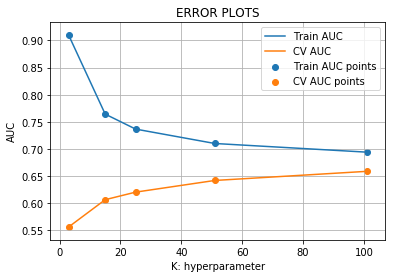

In [318]:
train7_auc = []
cv7_auc = []
K7 = [3, 15, 25, 51, 101]
for i in tqdm(K7):
    neigh7 = KNeighborsClassifier(n_neighbors=i,algorithm='brute', n_jobs=-1)
    neigh7.fit(X_train_tfidfw2vec_new, y_train)

    y_train_pred = batch_predict(neigh7, X_train_tfidfw2vec_new)    
    y_cv_pred = batch_predict(neigh7, X_cv_tfidfw2vec_new)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train7_auc.append(roc_auc_score(y_train,y_train_pred))
    cv7_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K7, train7_auc, label='Train AUC')
plt.plot(K7, cv7_auc, label='CV AUC')

plt.scatter(K7, train7_auc, label='Train AUC points')
plt.scatter(K7, cv7_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

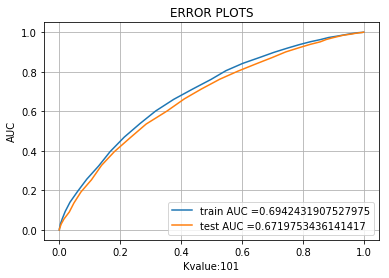

In [319]:
# Selecting the Value of Hyperparamter K as 101 since it provides the min differece in Train Auc And Cross Val AUC.
#Also during majority voting picking odd value of K gives clear winner in selcting class label
from sklearn.metrics import roc_curve, auc


neigh8 = KNeighborsClassifier(n_neighbors=101,algorithm='brute', n_jobs=-1)
neigh8.fit(X_train_tfidfw2vec_new, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred8 = batch_predict(neigh8, X_train_tfidfw2vec_new)    
y_test_pred8 = batch_predict(neigh8, X_test_tfidfw2vec_new)

train_fpr8, train_tpr8, tr_thresholds8 = roc_curve(y_train, y_train_pred8)
test_fpr8, test_tpr8, te_thresholds8 = roc_curve(y_test, y_test_pred8)

plt.plot(train_fpr8, train_tpr8, label="train AUC ="+str(auc(train_fpr8, train_tpr8)))
plt.plot(test_fpr8, test_tpr8, label="test AUC ="+str(auc(test_fpr8, test_tpr8)))
plt.legend()
plt.xlabel("Kvalue:101")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [320]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t3 = find_best_threshold(tr_thresholds8, train_fpr8, train_tpr8)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred8, best_t3)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred8, best_t3)))

the maximum value of tpr*(1-fpr) 0.41221744265996363 for threshold 0.851
Train confusion matrix
[[ 2448  1475]
 [ 6984 13593]]
Test confusion matrix
[[1414  988]
 [4240 8358]]


In [321]:
cm_tfidfw2vec_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred8, best_t3))
cm_tfidfw2vec_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred8, best_t3))

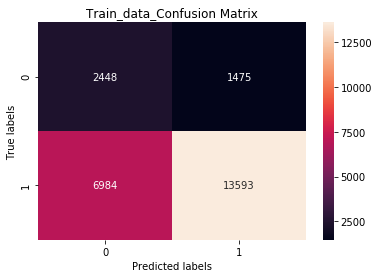

In [322]:
#Sea born heat map train confusion matrix
ax= plt.subplot()
sns.heatmap(cm_tfidfw2vec_train, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train_data_Confusion Matrix'); 

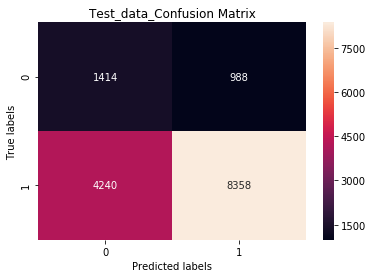

In [333]:
#Sea born heat map test confusion matrix
ax= plt.subplot()
sns.heatmap(cm_tfidfw2vec_test, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Test_data_Confusion Matrix'); 

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [324]:
print(X_train_tfidf_new.shape)

(24500, 10436)


In [325]:
#https://machinelearningmastery.com/feature-selection-machine-learning-python/
from sklearn.feature_selection import SelectKBest, chi2
# feature extraction using selectkbest to get top 2000 feautures
test = SelectKBest(chi2, k=2000)
test.fit(X_train_tfidf_new, y_train)

Xtrain_filterd = test.transform(X_train_tfidf_new)
Xcv_filterd = test.transform(X_cv_tfidf_new)
Xtest_filterd = test.transform(X_test_tfidf_new)
print(Xtrain_filterd.shape)
print(Xcv_filterd.shape)
print(Xtest_filterd.shape)
# summarize scores
#np.set_printoptions(precision=3)
#Xtrain_filter = fit


(24500, 2000)
(10500, 2000)
(15000, 2000)


In [ ]:
#Training to find value of K for TFIDF model with top 2000 features




  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


 20%|████████████████▌                                                                  | 1/5 [05:34<22:18, 334.55s/it]


 40%|█████████████████████████████████▏                                                 | 2/5 [10:57<16:33, 331.12s/it]


 60%|█████████████████████████████████████████████████▊                                 | 3/5 [15:58<10:43, 321.95s/it]


 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [20:57<05:15, 315.04s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [25:52<00:00, 309.19s/it]




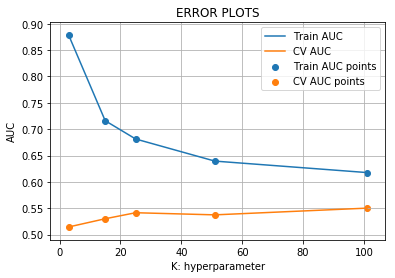

In [326]:
train9_auc = []
cv9_auc = []
K9 = [3, 15, 25, 51, 101]
for i in tqdm(K9):
    neigh9 = KNeighborsClassifier(n_neighbors=i,algorithm='brute', n_jobs=-1)
    neigh9.fit(Xtrain_filterd, y_train)

    y_train_pred = batch_predict(neigh9, Xtrain_filterd)    
    y_cv_pred = batch_predict(neigh9, Xcv_filterd)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train9_auc.append(roc_auc_score(y_train,y_train_pred))
    cv9_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K9, train9_auc, label='Train AUC')
plt.plot(K9, cv9_auc, label='CV AUC')

plt.scatter(K9, train9_auc, label='Train AUC points')
plt.scatter(K9, cv9_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

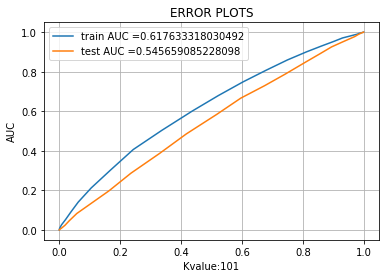

In [327]:
# Selecting the Value of Hyperparamter K as 101 since it provides the min differece in Train Auc And Cross Val AUC.
#Also during majority voting picking odd value of K gives clear winner in selcting class label
from sklearn.metrics import roc_curve, auc


neigh10 = KNeighborsClassifier(n_neighbors=101,algorithm='brute', n_jobs=-1)
neigh10.fit(Xtrain_filterd, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred10 = batch_predict(neigh10, Xtrain_filterd)    
y_test_pred10 = batch_predict(neigh10, Xtest_filterd)

train_fpr10, train_tpr10, tr_thresholds10 = roc_curve(y_train, y_train_pred10)
test_fpr10, test_tpr10, te_thresholds10 = roc_curve(y_test, y_test_pred10)

plt.plot(train_fpr10, train_tpr10, label="train AUC ="+str(auc(train_fpr10, train_tpr10)))
plt.plot(test_fpr10, test_tpr10, label="test AUC ="+str(auc(test_fpr10, test_tpr10)))
plt.legend()
plt.xlabel("Kvalue:101")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [328]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t4 = find_best_threshold(tr_thresholds10, train_fpr10, train_tpr10)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred10, best_t4)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred10, best_t4)))

the maximum value of tpr*(1-fpr) 0.3386582092608366 for threshold 0.842
Train confusion matrix
[[ 2210  1713]
 [ 8207 12370]]
Test confusion matrix
[[1159 1243]
 [5232 7366]]


In [329]:
cm_tfidf2k_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred10, best_t4))
cm_tfidf2k_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred10, best_t4))

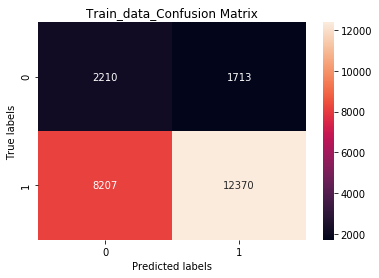

In [330]:
#Sea born heat map train confusion matrix
ax= plt.subplot()
sns.heatmap(cm_tfidf2k_train, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Train_data_Confusion Matrix');

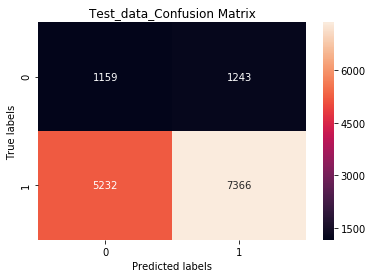

In [331]:
#Sea born heat map train confusion matrix
ax= plt.subplot()
sns.heatmap(cm_tfidf2k_test, annot=True, ax = ax,fmt ='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Test_data_Confusion Matrix');

In [339]:
##http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

In [340]:
x.field_names = ["Vectorizer", "Model", "Hyperparameter", "Test_AUC"]
x.add_row(["BOW", "neigh1", 101, 64.207])
x.add_row(["TFIDF", "neigh4", 101, 57.801])
x.add_row(["AvgW2vec", "neigh6", 101, 64.015])
x.add_row(["TFIDFW2vec", "neigh8", 101, 67.19])
x.add_row(["TFIDF_KBest", "neigh10", 101, 54.565])


In [341]:
print(x)

+-------------+---------+----------------+----------+
|  Vectorizer |  Model  | Hyperparameter | Test_AUC |
+-------------+---------+----------------+----------+
|     BOW     |  neigh1 |      101       |  64.207  |
|    TFIDF    |  neigh4 |      101       |  57.801  |
|   AvgW2vec  |  neigh6 |      101       |  64.015  |
|  TFIDFW2vec |  neigh8 |      101       |  67.19   |
| TFIDF_KBest | neigh10 |      101       |  54.565  |
+-------------+---------+----------------+----------+


<h1>3. Conclusions</h1>

* From the table above we can conclude that TFIDFW2vec provides the best performance .Since it provides better generalization.
* When Comparing TFIDF and TFIDF_Kbest,both gives more or less same performance since AUC are 57.801 and 54.565.But TFIDF_Kbest model will consume less memory since lesser no of feautures are present.So instead of going for TFIDF ,we can use TFIDF_Kbest instead of TFIDF